In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
#Custom figures
import matplotlib 
matplotlib.rc('xtick', labelsize=8) 
matplotlib.rc('ytick', labelsize=8) 
matplotlib.rc('font', size=18)

## 1. Import study data

In [3]:
ADNIMERGE = pd.read_csv("ADNIMERGE.csv",low_memory=False)
ADNIMERGE = ADNIMERGE[ADNIMERGE['VISCODE']=='bl']
#ADNIMERGE.head()

In [4]:
ADNIMERGE['DX'].unique()

array(['CN', 'Dementia', 'MCI', nan], dtype=object)

In [5]:
print("Number of rows: ", ADNIMERGE.shape[0])
print("Number of columns: ", ADNIMERGE.shape[1])

Number of rows:  2428
Number of columns:  116


## 2. EDA (Study Data)

### 2.1. Age distribution by diagnostic status in baseline

Diagnostic codes (in baseline):

- **CN**: controls
- **AD**: alzheimer's disease (dementia diagnostic)
- **LMCI**: late mild cognitive impairment
- **EMCI**: early mild cognitive impairment
- **SMC**: subjective memory concerns (it is considered cognitive normal)

In [6]:
ADNIMERGE['DX_bl'] = ADNIMERGE['DX_bl'].replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})
ADNIMERGE['DX_bl'].unique()

array(['CN', 'AD', 'MCI', nan], dtype=object)

In [7]:
#Keep only the MCI subjects that evolve towards dementia
ADNIMERGE_aux = pd.read_csv("ADNIMERGE.csv",low_memory=False)
ADNIMERGE_aux['DX_bl'] = ADNIMERGE_aux['DX_bl'].replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})
ADNIMERGE_MCI = ADNIMERGE_aux[ADNIMERGE_aux['DX_bl']=='MCI']
#Get MCI patients that evolve to dementia
ADNIMERGE_MCI_AD = ADNIMERGE_MCI.loc[(ADNIMERGE_MCI['VISCODE'] != 'bl') & (ADNIMERGE_MCI['DX'] == 'Dementia')]
ADNIMERGE_MCI_AD = ADNIMERGE_MCI_AD['RID'].unique()
#Filter original table to keep only this MCI patients
ADNIMERGE_CN_AD = ADNIMERGE[ADNIMERGE['DX_bl']!='MCI'].copy() #dataframe with CN and AD info
ADNIMERGE_MCI = ADNIMERGE[(ADNIMERGE['DX_bl'] == 'MCI') & (ADNIMERGE['RID'].isin(ADNIMERGE_MCI_AD))]
ADNIMERGE = pd.concat([ADNIMERGE_CN_AD, ADNIMERGE_MCI])

## 3. Neurocognitive test batteries data inspection

First we are going to find how many patients -in baseline- have been administered with the three batteries (ADAS-cog, MMSE, MoCA).

### 3.1. Data import

#### ADAS-cog

In [8]:
#ADAS-cog (ADNIGO,2,3)
ADAS = pd.read_csv("Neuropsychological/ADAS_ADNIGO23.csv")
ADAS = ADAS[ADAS['VISCODE2']=='bl']
#ADAS.head()

In [9]:
print("Number of subjects: ", len(ADAS['RID'].unique()))

Number of subjects:  1606


Count missing data

In [10]:
ADAS_columns = ["Q1SCORE","Q2SCORE","Q3SCORE","Q4SCORE","Q5SCORE","Q6SCORE","Q7SCORE",
          "Q8SCORE","Q9SCORE","Q10SCORE","Q11SCORE","Q12SCORE","Q13SCORE"]

for column in ADAS_columns:
    NullSum = ADAS[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")
    
print("Number of rows with missing values: ", ADAS[ADAS_columns].isna().any(axis=1).sum())
    
print("Total number of tests: ", len(ADAS_columns) )

Q1SCORE: 3
Q2SCORE: 3
Q3SCORE: 3
Q4SCORE: 3
Q5SCORE: 5
Q6SCORE: 3
Q7SCORE: 4
Q8SCORE: 5
Q9SCORE: 4
Q10SCORE: 3
Q11SCORE: 3
Q12SCORE: 3
Q13SCORE: 8
Number of rows with missing values:  13
Total number of tests:  13


There are only 13 subjects that have missing data in any test. 

In [11]:
#Drop NaN
ADAS = ADAS.dropna(subset=ADAS_columns)
print("Number of subjects that have completed all tests: ", ADAS.shape[0])

Number of subjects that have completed all tests:  1593


#### MMSE

In [12]:
#MMSE (ADNI1,GO,2,3)
MMSE = pd.read_csv("Neuropsychological/MMSE.csv",low_memory=False)
MMSE = MMSE[MMSE['VISCODE2']=='sc']
#MMSE.head()

In [13]:
print("Number of subjects: ", len(MMSE['RID'].unique()))

Number of subjects:  3470


In [14]:
#Count missing data
MMSE_columns = ["MMDATE","MMYEAR","MMMONTH","MMDAY","MMSEASON","MMHOSPIT","MMFLOOR",
          "MMCITY","MMAREA","MMSTATE","MMBALL","MMFLAG","MMTREE","MMD",
               "MML","MMR","MMO","MMW","MMBALLDL","MMFLAGDL","MMTREEDL","MMWATCH",
               "MMPENCIL","MMREPEAT","MMHAND","MMFOLD","MMONFLR","MMREAD","MMWRITE",
               "MMDRAW"]

for column in MMSE_columns:
    NullSum = MMSE[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")

print("Number of rows with missing values: ", MMSE[MMSE_columns].isna().any(axis=1).sum())

print("Total number of tests: ", len(MMSE_columns) )

MMDATE: 5
MMYEAR: 5
MMMONTH: 5
MMDAY: 5
MMSEASON: 5
MMHOSPIT: 5
MMFLOOR: 5
MMCITY: 5
MMAREA: 5
MMSTATE: 5
MMBALL: 1065
MMFLAG: 1065
MMTREE: 1065
MMD: 1065
MML: 1065
MMR: 1065
MMO: 1065
MMW: 1065
MMBALLDL: 1065
MMFLAGDL: 1065
MMTREEDL: 1065
MMWATCH: 5
MMPENCIL: 5
MMREPEAT: 5
MMHAND: 5
MMFOLD: 5
MMONFLR: 6
MMREAD: 5
MMWRITE: 5
MMDRAW: 5
Number of rows with missing values:  1065
Total number of tests:  30


There are 1605 patients that have missing data so maybe deleting all these rows is not the best strategy to deal with missing values. 

In [15]:
#Drop NaN
MMSE = MMSE.dropna(subset=MMSE_columns)
print("Number of subjects that have completed all tests: ", MMSE.shape[0])

Number of subjects that have completed all tests:  2405


#### MoCA

In [16]:
#MoCA (ADNIGO,2,3)
MOCA = pd.read_csv("Neuropsychological/MOCA.csv")
MOCA = MOCA[MOCA['VISCODE2']=='bl']
#MOCA.head()

In [17]:
print("Number of subjects: ", len(MOCA['RID'].unique()))

Number of subjects:  1606


In [18]:
#Count missing data
MOCA_columns = MOCA.columns[8:-4].tolist()

for column in MOCA_columns:
    NullSum = MOCA[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")
    
print("Number of rows with missing values: ", MOCA[MOCA_columns].isna().any(axis=1).sum())
    
print("Total number of tests: ", len(MOCA_columns) )

TRAILS: 5
CUBE: 6
CLOCKCON: 7
CLOCKNO: 8
CLOCKHAN: 9
LION: 6
RHINO: 6
CAMEL: 6
IMMT1W1: 8
IMMT1W2: 7
IMMT1W3: 11
IMMT1W4: 9
IMMT1W5: 8
IMMT2W1: 15
IMMT2W2: 11
IMMT2W3: 13
IMMT2W4: 13
IMMT2W5: 12
DIGFOR: 4
DIGBACK: 4
LETTERS: 8
SERIAL1: 7
SERIAL2: 7
SERIAL3: 9
SERIAL4: 10
SERIAL5: 11
REPEAT1: 4
REPEAT2: 5
FFLUENCY: 5
ABSTRAN: 6
ABSMEAS: 7
DELW1: 9
DELW2: 8
DELW3: 9
DELW4: 9
DELW5: 9
DATE: 4
MONTH: 4
YEAR: 4
DAY: 5
PLACE: 4
CITY: 5
Number of rows with missing values:  51
Total number of tests:  42


In [19]:
#Drop NaN
MOCA = MOCA.dropna(subset=MOCA_columns)
print("Number of subjects that have completed all tests: ", MOCA.shape[0])

Number of subjects that have completed all tests:  1555


There are 50 subjects that have missing data. 

#### Merged batteries

Merge the three test batteries (ADAS-cog, MMSE and MoCA).

In [20]:
df = pd.merge(pd.merge(ADAS,MMSE,on='RID'),MOCA,on='RID')
#df.head()

In [21]:
print("Number of subjects with data for all batteries: ", df.shape[0])

Number of subjects with data for all batteries:  898


If we do not discard the rows that have missing values, the total number of patients in the merged table would be 1605. All of them will be patients with information for the 3 batteries -although not necessarily all test completed-.

#### Merged batteries (ADAS+MOCA)

Merge only the ADAS-cog and MoCA batteries.

In [22]:
ADASMOCA = pd.merge(ADAS,MOCA,on='RID')
#ADASMOCA.head()

In [23]:
print("Number of subjects with data for all batteries: ", ADASMOCA.shape[0])

Number of subjects with data for all batteries:  1544


#### NEUROBAT

In [24]:
#NEUROBAT-cog (ADNIGO,2,3)
NEUROBAT = pd.read_csv("Neuropsychological/NEUROBAT.csv")
NEUROBAT = NEUROBAT[NEUROBAT['VISCODE2']=='bl']
#NEUROBAT.head()

C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\3654230170.py:2: DtypeWarning: Columns (8,80) have mixed types. Specify dtype option on import or set low_memory=False.
  NEUROBAT = pd.read_csv("Neuropsychological/NEUROBAT.csv")


In [25]:
print("Number of subjects: ", len(NEUROBAT['RID'].unique()))

Number of subjects:  2426


Count missing data

In [26]:
#Count missing data
NEUROBAT_columns = ["AVTOT1","AVTOT2","AVTOT3","AVTOT4","AVTOT5","CATANIMSC","CATVEGESC",
          "CATANPERS","CATANINTR","CATVGPERS","CATVGINTR","BNTSPONT","BNTCSTIM","BNTCPHON",
               "CLOCKSCOR","COPYSCOR","DSPANFOR","DSPANBAC","TRAASCOR",
               "TRABSCOR","DIGITSCOR","ANARTERR", "AVDEL30MIN","AVDELTOT"]

for column in NEUROBAT_columns:
    NullSum = NEUROBAT[column].isnull().sum(axis = 0)
    print(f"{column}: {NullSum}")
    
print("Number of rows with missing values: ", NEUROBAT[NEUROBAT_columns].isna().any(axis=1).sum())
    
print("Total number of tests: ", len(NEUROBAT_columns) )

AVTOT1: 3
AVTOT2: 3
AVTOT3: 3
AVTOT4: 3
AVTOT5: 4
CATANIMSC: 3
CATVEGESC: 1607
CATANPERS: 3
CATANINTR: 3
CATVGPERS: 1607
CATVGINTR: 1607
BNTSPONT: 694
BNTCSTIM: 696
BNTCPHON: 696
CLOCKSCOR: 5
COPYSCOR: 7
DSPANFOR: 1607
DSPANBAC: 1607
TRAASCOR: 9
TRABSCOR: 44
DIGITSCOR: 1607
ANARTERR: 54
AVDEL30MIN: 4
AVDELTOT: 8
Number of rows with missing values:  1612
Total number of tests:  24


There are only 13 subjects that have missing data in any test. 

In [27]:
#Drop NaN
NEUROBAT = NEUROBAT.dropna(subset=NEUROBAT_columns)
print("Number of subjects that have completed all tests: ", NEUROBAT.shape[0])

Number of subjects that have completed all tests:  814


## 4. DATA PREPROCESSING

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
def group_by_test(metadata, df):
    """Function to group the scores measuring the same functions"""

    test_ls = metadata['Label'].unique()
    
    #Iterate each test
    for test in test_ls:
        variable_ls = metadata[metadata['Label']==test]['ADNI column'].tolist()
        df[test] = df[variable_ls].sum(axis=1)
        
    return df

In [30]:
def group_by_domain(X, metadata):
    """Function to group the scores measuring the same functions"""

    metadata = metadata[['Label', 'Cognitive Domain']]
    domain_dict = dict(zip(metadata['Label'], metadata['Cognitive Domain']))
    domains = np.unique(list(domain_dict.values()))
    
    X = X.groupby(domain_dict, axis=1).mean()
        
    return X

#### Plot z-scores by cognitive domain

1. Compute averages of each test
2. Group by NC domain
3. Compute the average of each domain

In [31]:
def zscores_means(X, dx):
    """Function to generate a table with the means by cognitive domain """
    #Compute the test means
    means_df = X.mean(axis=0).to_frame()
    means_df.columns = ["Mean"]
    means_df['Cognitive Domain'] = means_df.index

    #Add diagnostic group
    means_df["Diagnostic"] = dx
    
    return(means_df)

#### Plot z-scores distribution by cognitive domain and cognitive domain

In [32]:
def plot_zscore_distribution(X, Y, battery_name):
    """Function to plot the z-score distribution by cognitive domain and diagnostic group"""

    X = pd.merge(X, Y, left_index=True, right_index=True)
    X = X.melt(id_vars=['DX_bl'], var_name='Cognitive Domain', value_name="z-score")
    
    plt.figure(figsize=(12,6))
    
    sns.boxplot(x="Cognitive Domain", y="z-score",
            hue="DX_bl", data=X, hue_order=['CN', 'MCI', 'AD'])
    
    plt.title("Z-scores distribution (" + battery_name + ")")
    plt.savefig("./Results_domains/Figures/ZScores/" + battery_name + ".svg", format='svg')
    plt.show()

### 4.1. ADAS-Cog

In [33]:
#group variables by cognitive test
metadata_path = "./NC_Tests/ADAS_Metadata.csv"
ADAS_metadata = pd.read_csv(metadata_path, sep=";")
ADAS = group_by_test(ADAS_metadata, ADAS)
#get test results for the controls
ADAS_CN = ADAS[ADAS.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", ADAS_CN.shape[0])

Number of controls:  660


In [34]:
#filter table to show only tests results
ADAS_columns = ADAS_metadata['Label'].unique()
ADAS_CN = ADAS_CN[ADAS_columns]
ADAS_CN.head()

,Q1_WR,Q2_Comm,Q3_CP,Q4_DWR,Q5_NT,Q6_IP,Q7_O,Q8_WRT,Q9_RTI,Q10_Comp,Q11_WFD,Q12_SL,Q13_NC
484,2.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
489,4.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0
494,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
507,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
508,5.0,0.0,0.0,6.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0


In [35]:
#Control statistics
ADAS_CN.describe()

,Q1_WR,Q2_Comm,Q3_CP,Q4_DWR,Q5_NT,Q6_IP,Q7_O,Q8_WRT,Q9_RTI,Q10_Comp,Q11_WFD,Q12_SL,Q13_NC
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,2.842364,0.080303,0.404545,2.722727,0.056061,0.057576,0.118182,1.831818,0.010606,0.013636,0.057576,0.018182,0.375758
std,1.313077,0.350036,0.554997,1.865858,0.236713,0.251889,0.362887,1.802179,0.116380,0.116064,0.274932,0.154752,0.645766
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.000000,5.000000,3.000000,10.000000,2.000000,2.000000,3.000000,12.000000,2.000000,1.000000,3.000000,2.000000,5.000000


#### Fit the scaler with the controls data

In [36]:
scaler = StandardScaler()
scaler.fit(ADAS_CN)

StandardScaler()

#### Transform data

In [37]:
ADAS_DX = pd.merge(ADAS,ADNIMERGE,on='RID')

X_ADAS = ADAS_DX[ADAS_columns] #tests scores
Y_ADAS = pd.DataFrame(ADAS_DX["DX_bl"]) #diagnosis

#scale data
X_ADAS = scaler.transform(X_ADAS)

#Convert into pandas dataframe
X_ADAS = pd.DataFrame(X_ADAS,columns=ADAS_columns)
X_ADAS.head()

,Q1_WR,Q2_Comm,Q3_CP,Q4_DWR,Q5_NT,Q6_IP,Q7_O,Q8_WRT,Q9_RTI,Q10_Comp,Q11_WFD,Q12_SL,Q13_NC
0,0.120142,-0.229588,1.073710,-0.387637,-0.237009,-0.22875,-0.325918,0.648697,-0.091202,-0.117579,-0.209577,-0.117579,-0.582320
1,0.882290,-0.229588,-0.729467,1.221422,-0.237009,-0.22875,5.189616,0.093392,-0.091202,-0.117579,-0.209577,-0.117579,0.967403
2,0.882290,2.629431,-0.729467,1.221422,3.990721,-0.22875,-0.325918,0.093392,-0.091202,-0.117579,-0.209577,-0.117579,2.517126
3,1.644437,-0.229588,1.073710,2.294128,-0.237009,-0.22875,2.431849,1.204002,-0.091202,-0.117579,-0.209577,-0.117579,2.517126
4,0.882290,-0.229588,1.073710,0.148716,-0.237009,-0.22875,-0.325918,-0.461913,-0.091202,-0.117579,-0.209577,-0.117579,-0.582320


#### Group tests by cognitive domain

In [38]:
X_ADAS = group_by_domain(X_ADAS, ADAS_metadata)
X_ADAS.head()

,Attention,Language,Memory,Orientation,Visuospatial
0,-0.582320,-0.182267,0.072500,-0.325918,0.422480
1,0.967403,-0.182267,0.526476,5.189616,-0.479109
2,2.517126,1.235083,0.526476,-0.325918,-0.479109
3,2.517126,-0.182267,1.262841,2.431849,0.422480
4,-0.582320,-0.182267,0.119473,-0.325918,0.422480


#### Divide data by diagnostic group

In [39]:
#Get indexes of subjects belonging to each group
ADAS_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_ADAS = Y_ADAS.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    ADAS_indexes[dx] = Y_ADAS.index[Y_ADAS['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_ADAS_CN = X_ADAS.iloc[ADAS_indexes["CN"]]
X_ADAS_MCI = X_ADAS.iloc[ADAS_indexes["MCI"]]
X_ADAS_AD = X_ADAS.iloc[ADAS_indexes["AD"]]


print("Number of instances CN: ", X_ADAS_CN.shape[0])
print("Number of instances MCI: ", X_ADAS_MCI.shape[0])
print("Number of instances AD: ", X_ADAS_AD.shape[0])

Number of instances CN:  660
Number of instances MCI:  161
Number of instances AD:  219


#### Plot mean z-scores by domain

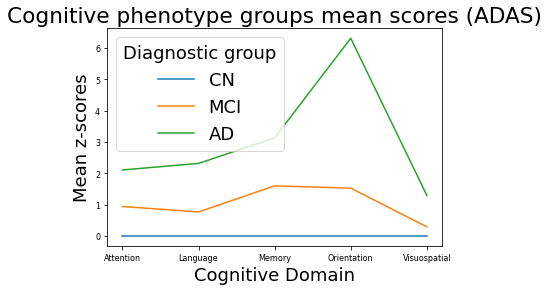

In [40]:
#Compute zscores means for each cognitive domain by diagnostic group
ADAS_means_CN = zscores_means(X_ADAS_CN, "CN")
ADAS_means_MCI = zscores_means(X_ADAS_MCI, "MCI")
ADAS_means_AD = zscores_means(X_ADAS_AD, "AD")

#Concanetate all dataframes
ADAS_means_df = pd.concat([ADAS_means_CN, ADAS_means_MCI, ADAS_means_AD])
ADAS_means_df.index = range(len(ADAS_means_df))

#plot dataframe
sns.lineplot(data=ADAS_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (ADAS)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

#### z-score distribution

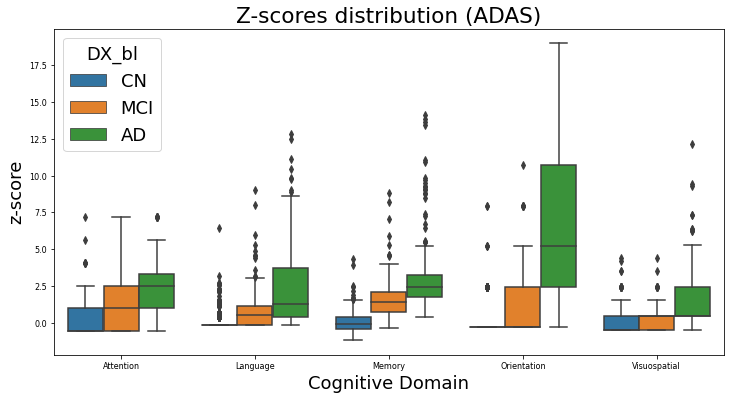

In [41]:
plot_zscore_distribution(X_ADAS, Y_ADAS, 'ADAS')

### 4.2. MMSE

In [42]:
#group variables by cognitive test
metadata_path = "./NC_Tests/MMSE_Metadata.csv"
MMSE_metadata = pd.read_csv(metadata_path, sep=";")
MMSE = group_by_test(MMSE_metadata, MMSE)
#get test results for the controls
MMSE_CN = MMSE[MMSE.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", MMSE_CN.shape[0])

Number of controls:  523


In [43]:
#filter table to show only tests results
MMSE_columns = MMSE_metadata['Label'].unique()
MMSE_CN = MMSE_CN[MMSE_columns]
MMSE_CN.head()

,MM1_OT,MM2_OP,MM3_Reg,MM4_SB,MM5_RR,MM6_NCO,MM7_Rep,MM8_CI,MM9_Read,MM10_Write,MM11_Draw
0,5.0,5.0,3.0,5.0,5.0,2.0,1.0,3.0,1.0,1.0,1.0
4,5.0,5.0,3.0,5.0,3.0,2.0,1.0,4.0,1.0,1.0,1.0
7,5.0,5.0,3.0,5.0,5.0,2.0,1.0,3.0,1.0,1.0,1.0
10,5.0,5.0,3.0,5.0,4.0,2.0,1.0,3.0,1.0,1.0,1.0
11,6.0,5.0,3.0,5.0,4.0,2.0,1.0,3.0,1.0,1.0,1.0


In [44]:
#Control summary statistics
MMSE_CN.describe()

,MM1_OT,MM2_OP,MM3_Reg,MM4_SB,MM5_RR,MM6_NCO,MM7_Rep,MM8_CI,MM9_Read,MM10_Write,MM11_Draw
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,5.105163,5.139579,3.003824,5.164436,3.284895,2.001912,1.093690,3.068834,1.001912,1.005736,1.068834
std,0.313233,0.363072,0.061780,0.586989,0.537039,0.043727,0.291676,0.260864,0.043727,0.075592,0.253413
min,5.000000,5.000000,3.000000,5.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,5.000000,5.000000,3.000000,5.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,5.000000,5.000000,3.000000,5.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,5.000000,5.000000,3.000000,5.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
max,7.000000,7.000000,4.000000,9.000000,6.000000,3.000000,2.000000,5.000000,2.000000,2.000000,2.000000


#### Fit the scaler with the controls data

In [45]:
scaler = StandardScaler()

scaler.fit(MMSE_CN)

StandardScaler()

#### Transform data

In [46]:
MMSE_DX = pd.merge(MMSE,ADNIMERGE,on='RID')

X_MMSE = MMSE_DX[MMSE_columns] #tests scores
Y_MMSE = pd.DataFrame(MMSE_DX["DX_bl"]) #diagnosis

#scale data
X_MMSE = scaler.transform(X_MMSE)


#Convert into pandas dataframe
X_MMSE = pd.DataFrame(X_MMSE,columns=MMSE_columns)
X_MMSE.head()

,MM1_OT,MM2_OP,MM3_Reg,MM4_SB,MM5_RR,MM6_NCO,MM7_Rep,MM8_CI,MM9_Read,MM10_Write,MM11_Draw
0,-0.336054,-0.384808,-0.061958,-0.280403,3.196688,-0.043769,-0.321521,-0.264121,-0.043769,-0.075955,-0.271886
1,12.446209,2.372104,-0.061958,3.130076,5.060532,-0.043769,-0.321521,-0.264121,-0.043769,-0.075955,-0.271886
2,-0.336054,-0.384808,-0.061958,-0.280403,-0.530999,-0.043769,-0.321521,3.572971,-0.043769,-0.075955,-0.271886
3,6.055078,2.372104,-0.061958,4.835315,5.060532,-0.043769,-0.321521,-0.264121,-0.043769,-0.075955,3.678013
4,-0.336054,-0.384808,-0.061958,-0.280403,3.196688,-0.043769,-0.321521,-0.264121,-0.043769,-0.075955,-0.271886


#### Group tests by cognitive domain

In [47]:
X_MMSE = group_by_domain(X_MMSE, MMSE_metadata)
X_MMSE.head()

,Attention,Language,Memory,Orientation,Visuospatial
0,-0.280403,-0.149827,1.567365,-0.360431,-0.271886
1,3.130076,-0.149827,2.499287,7.409156,-0.271886
2,-0.280403,0.617591,-0.296479,-0.360431,-0.271886
3,4.835315,-0.149827,2.499287,4.213591,3.678013
4,-0.280403,-0.149827,1.567365,-0.360431,-0.271886


#### Divide data by diagnostic group

In [48]:
#Get indexes of subjects belonging to each group
MMSE_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MMSE = Y_MMSE.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MMSE_indexes[dx] = Y_MMSE.index[Y_MMSE['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MMSE_CN = X_MMSE.iloc[MMSE_indexes["CN"]]
X_MMSE_MCI = X_MMSE.iloc[MMSE_indexes["MCI"]]
X_MMSE_AD = X_MMSE.iloc[MMSE_indexes["AD"]]

print("Number of instances CN: ", X_MMSE_CN.shape[0])
print("Number of instances MCI: ", X_MMSE_MCI.shape[0])
print("Number of instances AD: ", X_MMSE_AD.shape[0])

Number of instances CN:  523
Number of instances MCI:  356
Number of instances AD:  339


#### Plot z-scores by domain

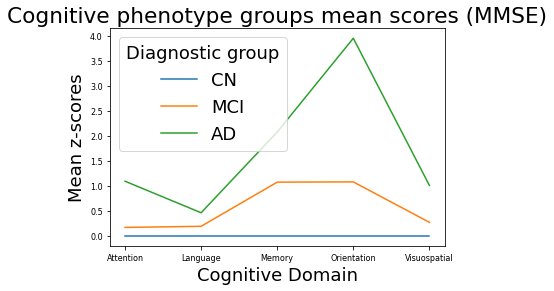

In [49]:
MMSE_means_CN = zscores_means(X_MMSE_CN, "CN")
MMSE_means_MCI = zscores_means(X_MMSE_MCI, "MCI")
MMSE_means_AD = zscores_means(X_MMSE_AD, "AD")

#Concanetate all dataframes
MMSE_means_df = pd.concat([MMSE_means_CN, MMSE_means_MCI, MMSE_means_AD])
MMSE_means_df.index = range(len(MMSE_means_df))

#plot dataframe
sns.lineplot(data=MMSE_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (MMSE)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

#### z-score distribution

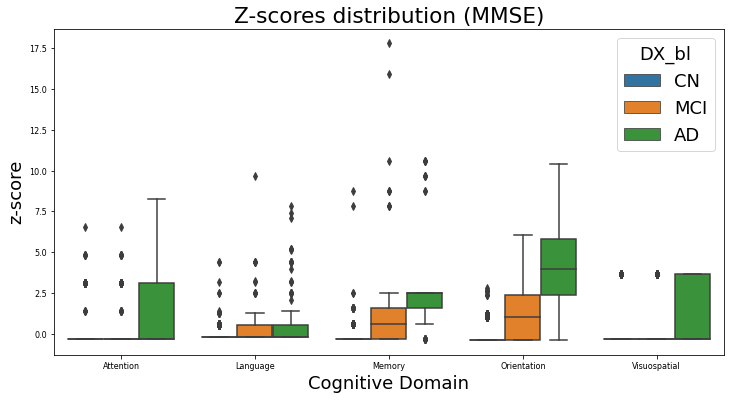

In [50]:
plot_zscore_distribution(X_MMSE, Y_MMSE, 'MMSE')

### 4.3. MOCA

In [51]:
#group variables by cognitive test
metadata_path = "./NC_Tests/MOCA_Metadata.csv"
MOCA_metadata = pd.read_csv(metadata_path, sep=";")
MOCA = group_by_test(MOCA_metadata, MOCA)
#get test results for the controls
MOCA_CN = MOCA[MOCA.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", MOCA_CN.shape[0])

Number of controls:  646


In [52]:
#filter table to show only tests results
MOCA_columns = MOCA_metadata['Label'].unique()
MOCA_CN = MOCA_CN[MOCA_columns]
MOCA_CN.head()

,Mo1_TMT,Mo2_CC,Mo3_CDT,Mo4_NT,Mo5_WRT1,Mo6_WRT2,Mo7_DSF,Mo8_DSB,Mo9_SelA,Mo10_SST,Mo11_Rep,Mo12_VF,Mo13_Abs,Mo14_DWR,Mo15_OT,Mo16_OP
484,1.0,0.0,2.0,2.0,4.0,5.0,1.0,1.0,0.0,2.0,2.0,17.0,1.0,5.0,4.0,2.0
489,1.0,1.0,3.0,3.0,5.0,5.0,1.0,0.0,0.0,5.0,2.0,15.0,2.0,14.0,4.0,2.0
494,1.0,1.0,3.0,3.0,5.0,5.0,1.0,1.0,0.0,5.0,2.0,22.0,2.0,11.0,4.0,2.0
507,1.0,1.0,3.0,3.0,5.0,5.0,1.0,1.0,0.0,5.0,1.0,20.0,2.0,5.0,4.0,2.0
508,1.0,1.0,3.0,3.0,4.0,4.0,0.0,1.0,0.0,5.0,2.0,13.0,2.0,15.0,4.0,2.0


In [53]:
#Control summary statistics
MOCA_CN.describe()

,Mo1_TMT,Mo2_CC,Mo3_CDT,Mo4_NT,Mo5_WRT1,Mo6_WRT2,Mo7_DSF,Mo8_DSB,Mo9_SelA,Mo10_SST,Mo11_Rep,Mo12_VF,Mo13_Abs,Mo14_DWR,Mo15_OT,Mo16_OP
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,0.919505,0.699690,2.756966,2.902477,4.710526,4.899381,0.961300,0.950464,0.261610,4.532508,1.732198,14.623839,1.851393,7.591331,3.941176,1.978328
std,0.272269,0.458748,0.480380,0.312172,0.603438,0.382687,0.193028,0.217152,0.927435,0.905468,0.514398,4.662500,0.404881,2.593406,0.235476,0.145722
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000
25%,1.000000,0.000000,3.000000,3.000000,5.000000,5.000000,1.000000,1.000000,0.000000,4.000000,2.000000,12.000000,2.000000,5.000000,4.000000,2.000000
50%,1.000000,1.000000,3.000000,3.000000,5.000000,5.000000,1.000000,1.000000,0.000000,5.000000,2.000000,15.000000,2.000000,7.000000,4.000000,2.000000
75%,1.000000,1.000000,3.000000,3.000000,5.000000,5.000000,1.000000,1.000000,0.000000,5.000000,2.000000,18.000000,2.000000,9.000000,4.000000,2.000000
max,1.000000,1.000000,3.000000,3.000000,5.000000,5.000000,1.000000,1.000000,15.000000,5.000000,2.000000,28.000000,2.000000,15.000000,4.000000,2.000000


#### Fit the scaler with the controls data

In [54]:
scaler = StandardScaler()

scaler.fit(MOCA_CN)

StandardScaler()

#### Transform data

In [55]:
MOCA_DX = pd.merge(MOCA,ADNIMERGE,on='RID')

X_MOCA = MOCA_DX[MOCA_columns] #tests scores
Y_MOCA = pd.DataFrame(MOCA_DX["DX_bl"]) #diagnosis

#scale data
X_MOCA = scaler.transform(X_MOCA)

#Convert into pandas dataframe
X_MOCA = pd.DataFrame(X_MOCA,columns=MOCA_columns)
X_MOCA.head()

,Mo1_TMT,Mo2_CC,Mo3_CDT,Mo4_NT,Mo5_WRT1,Mo6_WRT2,Mo7_DSF,Mo8_DSB,Mo9_SelA,Mo10_SST,Mo11_Rep,Mo12_VF,Mo13_Abs,Mo14_DWR,Mo15_OT,Mo16_OP
0,0.295875,-1.526400,0.506312,0.312644,0.480079,0.263132,0.200643,0.228292,0.796780,0.516699,0.521016,1.153958,-2.104455,-0.999974,0.25,0.148835
1,-3.379804,0.655136,0.506312,0.312644,0.480079,0.263132,0.200643,0.228292,-0.282297,-1.693815,0.521016,-0.563190,0.367323,-2.929435,0.25,0.148835
2,0.295875,0.655136,0.506312,0.312644,0.480079,0.263132,0.200643,0.228292,-0.282297,0.516699,0.521016,1.797888,0.367323,0.929486,0.25,0.148835
3,0.295875,-1.526400,0.506312,0.312644,0.480079,-2.351995,0.200643,-4.380354,-0.282297,0.516699,-1.424511,-1.636407,-2.104455,0.157702,-4.00,0.148835
4,0.295875,-1.526400,0.506312,0.312644,0.480079,0.263132,0.200643,0.228292,0.796780,0.516699,0.521016,1.368601,-4.576233,-0.999974,0.25,0.148835


#### Group tests by cognitive domain

In [56]:
X_MOCA = group_by_domain(X_MOCA, MOCA_metadata)
X_MOCA.head()

,Attention,Executive,Language,Memory,Orientation,Visuospatial
0,0.796780,-0.172589,0.662539,-0.085588,0.199418,-0.510044
1,-0.282297,-0.855472,0.090157,-0.728741,0.199418,0.580724
2,-0.282297,0.321767,0.877183,0.557566,0.199418,0.580724
3,-0.282297,-1.094318,-0.916091,-0.571405,-1.925582,-0.510044
4,0.796780,-0.666945,0.734087,-0.085588,0.199418,-0.510044


#### Divide data by diagnostic group

In [57]:
#Get indexes of subjects belonging to each group
MOCA_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MOCA = Y_MOCA.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MOCA_indexes[dx] = Y_MOCA.index[Y_MOCA['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MOCA_CN = X_MOCA.iloc[MOCA_indexes["CN"]]
X_MOCA_MCI = X_MOCA.iloc[MOCA_indexes["MCI"]]
X_MOCA_AD = X_MOCA.iloc[MOCA_indexes["AD"]]

print("Number of instances CN: ", X_MOCA_CN.shape[0])
print("Number of instances MCI: ", X_MOCA_MCI.shape[0])
print("Number of instances AD: ", X_MOCA_AD.shape[0])

Number of instances CN:  646
Number of instances MCI:  158
Number of instances AD:  212


#### Plot z-scores by domain

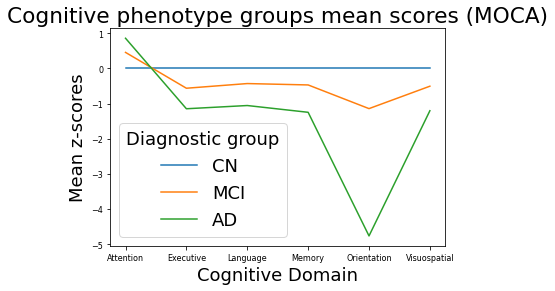

In [58]:
#Compute zscores means for each cognitive domain by diagnostic group
MOCA_means_CN = zscores_means(X_MOCA_CN, "CN")
MOCA_means_MCI = zscores_means(X_MOCA_MCI, "MCI")
MOCA_means_AD = zscores_means(X_MOCA_AD, "AD")

#Concanetate all dataframes
MOCA_means_df = pd.concat([MOCA_means_CN, MOCA_means_MCI, MOCA_means_AD])
MOCA_means_df.index = range(len(MOCA_means_df))

#plot dataframe
sns.lineplot(data=MOCA_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (MOCA)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

#### z-score distribution

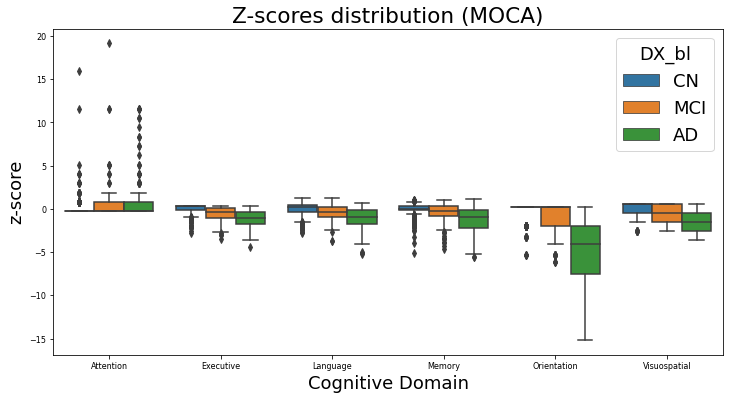

In [59]:
plot_zscore_distribution(X_MOCA, Y_MOCA, 'MOCA')

### 4.4. Merged data

In [60]:
#group variables by cognitive test
metadata_path = "./NC_Tests/merged_Metadata.csv"
merged_metadata = pd.read_csv(metadata_path, sep=";")
merged = group_by_test(merged_metadata, df)
#get test results for the controls
merged_CN = merged[merged.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", merged_CN.shape[0])

Number of controls:  288


In [61]:
#filter table to show only tests results
merged_columns = merged_metadata['Label'].unique()
merged_CN = merged_CN[merged_columns]
merged_CN.head()

,Q1_WR,Q2_Comm,Q3_CP,Q4_DWR,Q5_NT,Q6_IP,Q7_O,Q8_WRT,Q9_RTI,Q10_Comp,Q11_WFD,Q12_SL,Q13_NC,MM1_OT,MM2_OP,MM3_Reg,MM4_SB,MM5_RR,MM6_NCO,MM7_Rep,MM8_CI,MM9_Read,MM10_Write,MM11_Draw,Mo1_TMK,Mo2_CC,Mo3_Drawing,Mo4_Naming,Mo5_WRT1,Mo6_WRT2,Mo7_DSF,Mo8_DSB,Mo9_SA,Mo10_Serial,Mo11_Rep,Mo12_VF,Mo13_Abs,Mo14_DWR,Mo15_OT,Mo16_OP
127,2.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,3.0,5.0,3.0,2.0,1.0,4.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,4.0,5.0,1.0,1.0,0.0,2.0,2.0,17.0,1.0,5.0,4.0,2.0
129,4.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,5.0,5.0,3.0,5.0,3.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,5.0,5.0,1.0,0.0,0.0,5.0,2.0,15.0,2.0,14.0,4.0,2.0
131,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,3.0,5.0,4.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,5.0,5.0,1.0,1.0,0.0,5.0,2.0,22.0,2.0,11.0,4.0,2.0
137,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,5.0,3.0,5.0,3.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,5.0,5.0,1.0,1.0,0.0,5.0,1.0,20.0,2.0,5.0,4.0,2.0
138,5.0,0.0,0.0,6.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,5.0,6.0,3.0,5.0,3.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,4.0,4.0,0.0,1.0,0.0,5.0,2.0,13.0,2.0,15.0,4.0,2.0


#### Fit the scaler with the controls data

In [62]:
scaler = StandardScaler()

merged_CN.iloc[:,:13] = merged_CN.iloc[:,:13]*-1

scaler.fit(merged_CN)

StandardScaler()

#### Transform data

In [63]:
merged_DX = pd.merge(merged,ADNIMERGE,on='RID')

X_merged = merged_DX[merged_columns] #tests scores
X_merged.iloc[:,:13] = X_merged.iloc[:,:13]*-1
Y_merged = pd.DataFrame(merged_DX["DX_bl"]) #diagnosis

#scale data
X_merged = scaler.transform(X_merged)

#Convert into pandas dataframe
X_merged = pd.DataFrame(X_merged,columns=merged_columns)
X_merged.head()

C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\3293779534.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'VISCODE_x', 'update_stamp_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_DX = pd.merge(merged,ADNIMERGE,on='RID')
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\3293779534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_merged.iloc[:,:13] = X_merged.iloc[:,:13]*-1


,Q1_WR,Q2_Comm,Q3_CP,Q4_DWR,Q5_NT,Q6_IP,Q7_O,Q8_WRT,Q9_RTI,Q10_Comp,Q11_WFD,Q12_SL,Q13_NC,MM1_OT,MM2_OP,MM3_Reg,MM4_SB,MM5_RR,MM6_NCO,MM7_Rep,MM8_CI,MM9_Read,MM10_Write,MM11_Draw,Mo1_TMK,Mo2_CC,Mo3_Drawing,Mo4_Naming,Mo5_WRT1,Mo6_WRT2,Mo7_DSF,Mo8_DSB,Mo9_SA,Mo10_Serial,Mo11_Rep,Mo12_VF,Mo13_Abs,Mo14_DWR,Mo15_OT,Mo16_OP
0,-0.041950,0.225097,-1.164499,0.464113,0.265767,0.247841,0.333976,-0.628683,0.112056,0.13292,0.256585,0.159475,0.630412,-0.353553,-0.409311,0.0,-0.306971,-0.505977,-0.059028,-0.347308,3.764252,-0.059028,-0.059028,-0.250461,0.321634,-1.48324,0.554028,0.334618,0.524984,0.280892,0.179605,0.258199,0.794651,0.501982,0.524994,1.227844,-1.909154,-1.037051,0.217423,0.118678
1,-0.797047,0.225097,0.730279,-1.114602,0.265767,0.247841,-5.323970,-0.064631,0.112056,0.13292,0.256585,0.159475,-0.908221,-0.353553,-0.409311,0.0,-0.306971,3.278994,-0.059028,-0.347308,3.764252,-0.059028,-0.059028,-0.250461,-3.109126,0.67420,0.554028,0.334618,0.524984,0.280892,0.179605,0.258199,-0.321737,-1.848764,0.524994,-0.542464,0.372325,-2.873895,0.217423,0.118678
2,-0.797047,0.225097,-1.164499,-0.062125,0.265767,0.247841,0.333976,0.499421,0.112056,0.13292,0.256585,0.159475,0.630412,-0.353553,-0.409311,0.0,-0.306971,-0.505977,-0.059028,-0.347308,-0.236134,-0.059028,-0.059028,-0.250461,0.321634,0.67420,0.554028,0.334618,0.524984,0.280892,0.179605,0.258199,-0.321737,0.501982,0.524994,1.891709,0.372325,0.799792,0.217423,0.118678
3,-0.797047,0.225097,-1.164499,-0.062125,0.265767,0.247841,0.333976,-0.064631,0.112056,0.13292,0.256585,0.159475,-0.908221,-0.353553,-0.409311,0.0,-0.306971,-0.505977,-0.059028,-0.347308,-0.236134,-0.059028,-0.059028,-0.250461,0.321634,-1.48324,0.554028,0.334618,0.524984,-1.905511,0.179605,-3.872983,-0.321737,0.501982,-1.518227,-1.648907,-1.909154,0.065055,-4.599331,0.118678
4,-2.307241,-2.368024,0.730279,-2.167079,0.265767,0.247841,0.333976,-2.320841,0.112056,0.13292,0.256585,0.159475,0.630412,-0.353553,-0.409311,0.0,-0.306971,-0.505977,-0.059028,-0.347308,-0.236134,-0.059028,-0.059028,3.992640,0.321634,-1.48324,0.554028,0.334618,0.524984,0.280892,0.179605,0.258199,0.794651,0.501982,0.524994,1.449132,-4.190633,-1.037051,0.217423,0.118678


#### Group tests by cognitive domain

In [64]:
X_merged = group_by_domain(X_merged, merged_metadata)
X_merged.head()

,Attention,Executive,Language,Memory,Orientation,Visuospatial
0,0.342980,-0.941937,0.489782,-0.092402,-0.018557,-0.214510
1,-0.491315,0.450148,0.353604,-0.072583,-1.150147,-0.532840
2,0.156915,-0.181444,0.233126,0.094666,-0.018557,0.324850
3,-0.788054,-0.941937,-0.196400,-0.292577,-0.981908,-0.214510
4,0.342980,-1.070838,-0.000389,-0.824473,-0.018557,0.846266


#### Divide data by diagnostic group

In [65]:
#Get indexes of subjects belonging to each group
merged_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_merged = Y_merged.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    merged_indexes[dx] = Y_merged.index[Y_merged['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_merged_CN = X_merged.iloc[merged_indexes["CN"]]
X_merged_MCI = X_merged.iloc[merged_indexes["MCI"]]
X_merged_AD = X_merged.iloc[merged_indexes["AD"]]

print("Number of instances CN: ", X_merged_CN.shape[0])
print("Number of instances MCI: ", X_merged_MCI.shape[0])
print("Number of instances AD: ", X_merged_AD.shape[0])

Number of instances CN:  288
Number of instances MCI:  135
Number of instances AD:  142


#### Plot z-scores by domain

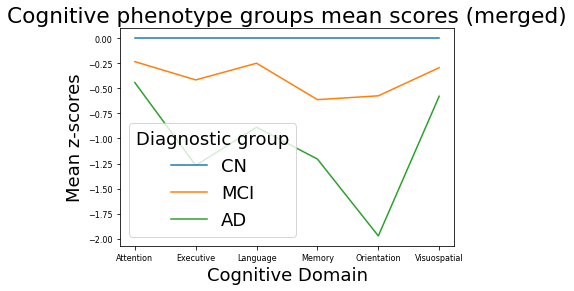

In [66]:
#Compute zscores means for each cognitive domain by diagnostic group
merged_means_CN = zscores_means(X_merged_CN, "CN")
merged_means_MCI = zscores_means(X_merged_MCI, "MCI")
merged_means_AD = zscores_means(X_merged_AD, "AD")

#Concanetate all dataframes
merged_means_df = pd.concat([merged_means_CN, merged_means_MCI, merged_means_AD])
merged_means_df.index = range(len(merged_means_df))

#plot dataframe
sns.lineplot(data=merged_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (merged)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

#### z-score distribution

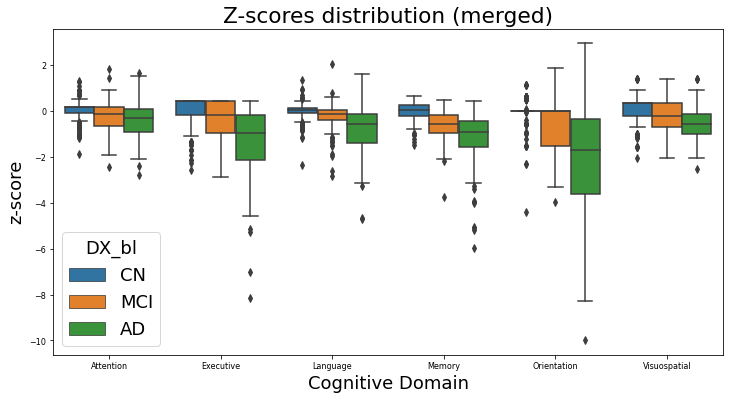

In [67]:
plot_zscore_distribution(X_merged, Y_merged, 'merged')

### 4.5. Merged data (ADAS and MoCA)

In [68]:
#group variables by cognitive test
metadata_path = "./NC_Tests/ADASMOCA_Metadata.csv"
ADASMOCA_metadata = pd.read_csv(metadata_path, sep=";")
ADASMOCA = group_by_test(ADASMOCA_metadata, ADASMOCA)
#get test results for the controls
ADASMOCA_CN = ADASMOCA[ADASMOCA.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", ADASMOCA_CN.shape[0])

Number of controls:  642


In [69]:
#filter table to show only tests results
ADASMOCA_columns = ADASMOCA_metadata['Label'].unique()
ADASMOCA_CN = ADASMOCA_CN[ADASMOCA_columns]
ADASMOCA_CN.head()

,Q1_WR,Q2_Comm,Q3_CP,Q4_DWR,Q5_NT,Q6_IP,Q7_O,Q8_WRT,Q9_RTI,Q10_Comp,Q11_WFD,Q12_SL,Q13_NC,Mo1_TMK,Mo2_CC,Mo3_Drawing,Mo4_Naming,Mo5_WRT1,Mo6_WRT2,Mo7_DSF,Mo8_DSB,Mo9_SA,Mo10_Serial,Mo11_Rep,Mo12_VF,Mo13_Abs,Mo14_DWR,Mo15_OT,Mo16_OP
127,2.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,4.0,5.0,1.0,1.0,0.0,2.0,2.0,17.0,1.0,5.0,4.0,2.0
129,4.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,5.0,5.0,1.0,0.0,0.0,5.0,2.0,15.0,2.0,14.0,4.0,2.0
131,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,5.0,5.0,1.0,1.0,0.0,5.0,2.0,22.0,2.0,11.0,4.0,2.0
137,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,5.0,5.0,1.0,1.0,0.0,5.0,1.0,20.0,2.0,5.0,4.0,2.0
138,5.0,0.0,0.0,6.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,3.0,4.0,4.0,0.0,1.0,0.0,5.0,2.0,13.0,2.0,15.0,4.0,2.0


#### Fit the scaler with the controls data

In [70]:
scaler = StandardScaler()
ADASMOCA_CN.iloc[:,:13] = ADASMOCA_CN.iloc[:,:13]*-1
scaler.fit(ADASMOCA_CN)

StandardScaler()

#### Transform data

In [71]:
ADASMOCA_DX = pd.merge(ADASMOCA,ADNIMERGE,on='RID')

X_ADASMOCA = ADASMOCA_DX[ADASMOCA_columns] #tests scores
X_ADASMOCA.iloc[:,:13] = X_ADASMOCA.iloc[:,:13]*-1
Y_ADASMOCA = pd.DataFrame(ADASMOCA_DX["DX_bl"]) #diagnosis

#scale data
X_ADASMOCA = scaler.transform(X_ADASMOCA)

#Convert into pandas dataframe
X_ADASMOCA = pd.DataFrame(X_ADASMOCA,columns=ADASMOCA_columns)
X_ADASMOCA.head()

C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\972150520.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_ADASMOCA.iloc[:,:13] = X_ADASMOCA.iloc[:,:13]*-1


,Q1_WR,Q2_Comm,Q3_CP,Q4_DWR,Q5_NT,Q6_IP,Q7_O,Q8_WRT,Q9_RTI,Q10_Comp,Q11_WFD,Q12_SL,Q13_NC,Mo1_TMK,Mo2_CC,Mo3_Drawing,Mo4_Naming,Mo5_WRT1,Mo6_WRT2,Mo7_DSF,Mo8_DSB,Mo9_SA,Mo10_Serial,Mo11_Rep,Mo12_VF,Mo13_Abs,Mo14_DWR,Mo15_OT,Mo16_OP
0,-0.115732,0.223285,-1.074952,0.381921,0.236863,0.232105,0.322507,-0.644908,0.092482,0.112331,0.205116,0.119239,0.582607,0.296876,-1.530931,0.503563,0.313712,0.47977,0.264007,0.197066,0.229039,0.792753,0.514654,0.516129,1.151573,-2.161872,-0.998573,0.250826,0.149308
1,-0.876142,0.223285,0.731643,-1.241876,0.236863,0.232105,-5.198810,-0.090650,0.092482,0.112331,0.205116,0.119239,-0.969400,-3.368405,0.653197,0.503563,0.313712,0.47977,0.264007,0.197066,0.229039,-0.283246,-1.695433,0.516129,-0.562272,0.361622,-2.931877,0.250826,0.149308
2,-0.876142,0.223285,-1.074952,-0.159345,0.236863,0.232105,0.322507,0.463609,0.092482,0.112331,0.205116,0.119239,0.582607,0.296876,0.653197,0.503563,0.313712,0.47977,0.264007,0.197066,0.229039,-0.283246,0.514654,0.516129,1.794265,0.361622,0.934732,0.250826,0.149308
3,-0.876142,0.223285,-1.074952,-0.159345,0.236863,0.232105,0.322507,-0.090650,0.092482,0.112331,0.205116,0.119239,-0.969400,0.296876,-1.530931,0.503563,0.313712,0.47977,-2.343574,0.197066,-4.366062,-0.283246,0.514654,-1.433016,-1.633425,-2.161872,0.161410,-3.986820,0.149308
4,-2.396963,-2.643700,0.731643,-2.324408,0.236863,0.232105,0.322507,-2.307684,0.092482,0.112331,0.205116,0.119239,0.582607,0.296876,-1.530931,0.503563,0.313712,0.47977,0.264007,0.197066,0.229039,0.792753,0.514654,0.516129,1.365803,-4.685367,-0.998573,0.250826,0.149308


#### Group tests by cognitive domain

In [72]:
X_ADASMOCA = group_by_domain(X_ADASMOCA, ADASMOCA_metadata)
X_ADASMOCA.head()

,Attention,Executive,Language,Memory,Orientation,Visuospatial
0,0.463224,-1.001573,0.359781,-0.077290,0.240881,-0.243497
1,-0.504395,0.441790,0.145550,-0.614898,-1.599558,-0.737215
2,0.248024,-0.160408,0.440118,0.171302,0.240881,0.484545
3,-0.981398,-1.001573,-0.231987,-0.390864,-1.171668,-0.243497
4,0.463224,-1.240540,0.028187,-1.027338,0.240881,-0.243497


#### Divide data by diagnostic group

In [73]:
#Get indexes of subjects belonging to each group
ADASMOCA_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_ADASMOCA = Y_ADASMOCA.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    ADASMOCA_indexes[dx] = Y_ADASMOCA.index[Y_ADASMOCA['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_ADASMOCA_CN = X_ADASMOCA.iloc[ADASMOCA_indexes["CN"]]
X_ADASMOCA_MCI = X_ADASMOCA.iloc[ADASMOCA_indexes["MCI"]]
X_ADASMOCA_AD = X_ADASMOCA.iloc[ADASMOCA_indexes["AD"]]

print("Number of instances CN: ", X_ADASMOCA_CN.shape[0])
print("Number of instances MCI: ", X_ADASMOCA_MCI.shape[0])
print("Number of instances AD: ", X_ADASMOCA_AD.shape[0])

Number of instances CN:  642
Number of instances MCI:  158
Number of instances AD:  208


#### Plot z-scores by domain

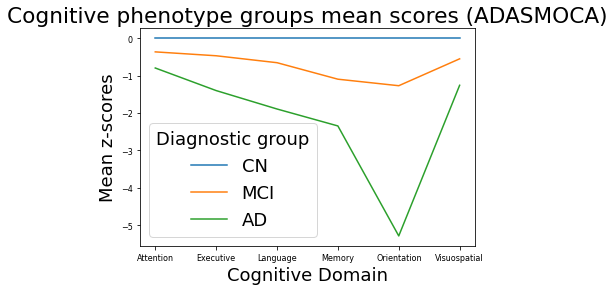

In [74]:
#Compute zscores means for each cognitive domain by diagnostic group
ADASMOCA_means_CN = zscores_means(X_ADASMOCA_CN, "CN")
ADASMOCA_means_MCI = zscores_means(X_ADASMOCA_MCI, "MCI")
ADASMOCA_means_AD = zscores_means(X_ADASMOCA_AD, "AD")

#Concanetate all dataframes
ADASMOCA_means_df = pd.concat([ADASMOCA_means_CN, ADASMOCA_means_MCI, ADASMOCA_means_AD])
ADASMOCA_means_df.index = range(len(ADASMOCA_means_df))

#plot dataframe
sns.lineplot(data=ADASMOCA_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (ADASMOCA)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

#### z-score distribution

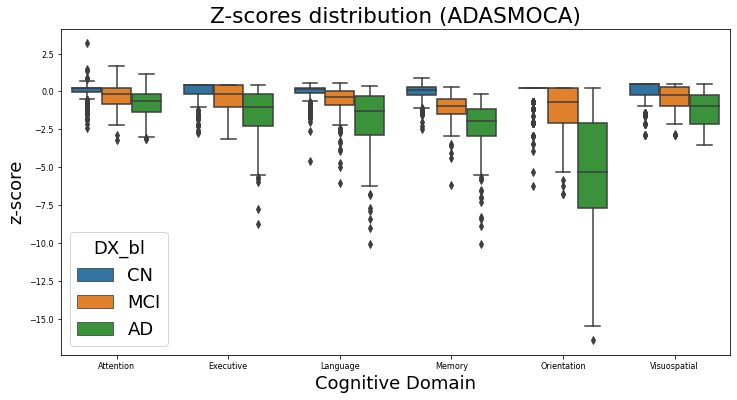

In [75]:
plot_zscore_distribution(X_ADASMOCA, Y_ADASMOCA, 'ADASMOCA')

### 4.6. NEUROBAT

In [76]:
#group variables by cognitive test
metadata_path = "./NC_Tests/NEUROBAT_Metadata.csv"
NEUROBAT_metadata = pd.read_csv(metadata_path, sep=";")
NEUROBAT = group_by_test(NEUROBAT_metadata, NEUROBAT)

Currently higher values on TMTA (time), TMTB (time) and Read (number of errors) signify worse performance, whereas higher values on the majority of other variables signify better performance. Accordingly, the former variables will be re-scored so higher scores will signify better performance in order to make the signs (i.e. positive or negative) of the partial correlation coefficients (edge weights) in the network models easier to interpret.

In [77]:
#NEUROBAT['TMTA'] = NEUROBAT['TMTA'] * -1
#NEUROBAT['TMTB'] = NEUROBAT['TMTB'] * -1
NEUROBAT['NB12_ANART'] = NEUROBAT['NB12_ANART'] * -1

In [78]:
#get test results for the controls
NEUROBAT_CN = NEUROBAT[NEUROBAT.RID.isin(ADNIMERGE[ADNIMERGE["DX_bl"]=='CN'].RID)]
print("Number of controls: ", NEUROBAT_CN.shape[0])
#filter table to show only tests results
NEUROBAT_columns = NEUROBAT_metadata['Label'].unique()
NEUROBAT_CN = NEUROBAT_CN[NEUROBAT_columns]
NEUROBAT_CN.head()

Number of controls:  229


,NB1_RAVLTD,NB2_RAVLTR,NB3_RAVLTI,NB4_CAT_FLU,NB5_BNT,NB6_CDT,NB7_CCT,NB8_DSF,NB9_DSB,NB10_TMTA,NB11_TMTB,NB12_ANART
9,5.0,6.0,44.0,23.0,29.0,4.0,5.0,10.0,8.0,29.0,112.0,-16.0
10,5.0,15.0,37.0,30.0,27.0,5.0,5.0,10.0,8.0,50.0,90.0,-5.0
20,9.0,13.0,51.0,38.0,27.0,3.0,4.0,7.0,4.0,31.0,51.0,-8.0
35,6.0,14.0,40.0,29.0,27.0,5.0,4.0,7.0,5.0,29.0,79.0,-25.0
40,9.0,13.0,50.0,34.0,29.0,5.0,5.0,8.0,7.0,27.0,49.0,-7.0


In [79]:
#Control statistics
NEUROBAT_CN.describe()

,NB1_RAVLTD,NB2_RAVLTR,NB3_RAVLTI,NB4_CAT_FLU,NB5_BNT,NB6_CDT,NB7_CCT,NB8_DSF,NB9_DSB,NB10_TMTA,NB11_TMTB,NB12_ANART
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,7.388646,12.820961,42.982533,34.633188,27.296943,4.681223,4.838428,8.777293,7.213974,36.445415,89.213974,-9.104803
std,3.724275,2.673505,9.818067,8.061493,3.247001,0.661369,0.573623,1.993016,2.164826,13.192330,44.255464,7.954775
min,-1.000000,-1.000000,-5.000000,17.000000,-1.000000,1.000000,-1.000000,4.000000,2.000000,17.000000,34.000000,-41.000000
25%,5.000000,12.000000,37.000000,29.000000,26.000000,5.000000,5.000000,7.000000,6.000000,28.000000,61.000000,-13.000000
50%,7.000000,14.000000,43.000000,34.000000,28.000000,5.000000,5.000000,9.000000,7.000000,33.000000,79.000000,-7.000000
75%,10.000000,15.000000,50.000000,39.000000,29.000000,5.000000,5.000000,10.000000,9.000000,42.000000,100.000000,-3.000000
max,15.000000,15.000000,69.000000,63.000000,30.000000,5.000000,5.000000,12.000000,12.000000,102.000000,300.000000,-0.000000


#### Fit the scaler with the controls data

In [80]:
scaler = StandardScaler()
scaler.fit(NEUROBAT_CN)

StandardScaler()

#### Transform data

In [81]:
NEUROBAT_DX = pd.merge(NEUROBAT,ADNIMERGE,on='RID')

X_NEUROBAT = NEUROBAT_DX[NEUROBAT_columns] #tests scores
Y_NEUROBAT = pd.DataFrame(NEUROBAT_DX["DX_bl"]) #diagnosis

#scale data
X_NEUROBAT = scaler.transform(X_NEUROBAT)

#Convert into pandas dataframe
X_NEUROBAT = pd.DataFrame(X_NEUROBAT,columns=NEUROBAT_columns)
X_NEUROBAT.head()

,NB1_RAVLTD,NB2_RAVLTR,NB3_RAVLTI,NB4_CAT_FLU,NB5_BNT,NB6_CDT,NB7_CCT,NB8_DSF,NB9_DSB,NB10_TMTA,NB11_TMTB,NB12_ANART
0,-0.642777,-2.556907,0.103859,-1.446217,0.525650,-1.032275,0.282287,0.614840,0.363885,-0.565611,0.516003,-0.868699
1,-0.642777,0.816835,-0.610674,-0.575990,-0.091652,0.483052,0.282287,0.614840,0.363885,1.029710,0.017800,0.517148
2,-1.988261,-4.431208,-2.141816,-2.440763,-3.178163,-4.062930,-1.464838,0.614840,-1.024943,1.561484,1.331244,-0.238768
3,0.433610,0.067115,0.818392,0.418556,-0.091652,-2.547603,-1.464838,-0.893714,-1.487886,-0.413675,-0.865378,0.139190
4,-0.373680,0.441975,-0.304446,-0.700308,-0.091652,0.483052,-1.464838,-0.893714,-1.024943,-0.565611,-0.231301,-2.002573


#### Group tests by cognitive domain

In [82]:
X_NEUROBAT = group_by_domain(X_NEUROBAT, NEUROBAT_metadata)
X_NEUROBAT.head()

,Executive,Language,Memory,Visuospatial
0,0.232279,-0.596422,-1.031942,-0.374994
1,0.506559,-0.050165,-0.145539,0.382669
2,0.620656,-1.952565,-2.853762,-2.763884
3,-0.915163,0.155365,0.439706,-2.006220
4,-0.678892,-0.931511,-0.078717,-0.490893


#### Divide data by diagnostic group

In [83]:
#Get indexes of subjects belonging to each group
NEUROBAT_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_NEUROBAT = Y_NEUROBAT.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    NEUROBAT_indexes[dx] = Y_NEUROBAT.index[Y_NEUROBAT['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_NEUROBAT_CN = X_NEUROBAT.iloc[NEUROBAT_indexes["CN"]]
X_NEUROBAT_MCI = X_NEUROBAT.iloc[NEUROBAT_indexes["MCI"]]
X_NEUROBAT_AD = X_NEUROBAT.iloc[NEUROBAT_indexes["AD"]]


print("Number of instances CN: ", X_NEUROBAT_CN.shape[0])
print("Number of instances MCI: ", X_NEUROBAT_MCI.shape[0])
print("Number of instances AD: ", X_NEUROBAT_AD.shape[0])

Number of instances CN:  229
Number of instances MCI:  219
Number of instances AD:  185


#### Plot mean z-scores by domain

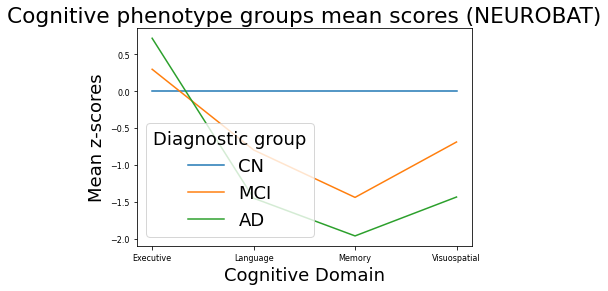

In [84]:
#Compute zscores means for each cognitive domain by diagnostic group
NEUROBAT_means_CN = zscores_means(X_NEUROBAT_CN, "CN")
NEUROBAT_means_MCI = zscores_means(X_NEUROBAT_MCI, "MCI")
NEUROBAT_means_AD = zscores_means(X_NEUROBAT_AD, "AD")

#Concanetate all dataframes
NEUROBAT_means_df = pd.concat([NEUROBAT_means_CN, NEUROBAT_means_MCI, NEUROBAT_means_AD])
NEUROBAT_means_df.index = range(len(NEUROBAT_means_df))

#plot dataframe
sns.lineplot(data=NEUROBAT_means_df, x='Cognitive Domain', y='Mean', hue='Diagnostic')
plt.title("Cognitive phenotype groups mean scores (NEUROBAT)")
plt.ylabel("Mean z-scores")
plt.legend(title="Diagnostic group")
plt.show()

#### z-score distribution

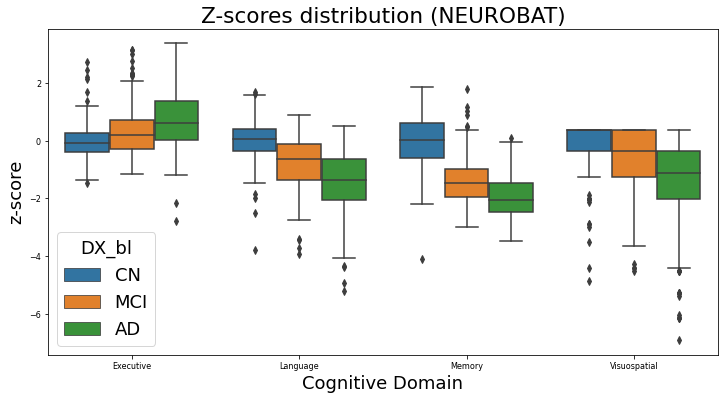

In [85]:
plot_zscore_distribution(X_NEUROBAT, Y_NEUROBAT, 'NEUROBAT')

## 5. ADJACENCY MATRIX

Simple correlation (a.k.a. Pearson correlation coefficient) may not give a complete picture while trying to understand the relationship between two variables (A and B) especially when there exist other influencing variables that affect A (and/or) B.
In fact, simple correlation mainly focuses on finding the influence of each variable on the other.

Whereas **partial correlation** is used to find the refined relationship between two variables with the effect of the other influencing variables being excluded/controlled.

#### Import required packages

In [86]:
#!pip install pingouin

In [87]:
from pingouin import partial_corr

#### Create partial correlation function

In [88]:
def par_corr(data_df):
    """
    Compute partial pairwise correlation of columns. 
    When a pair of columns are picked, then all other columns are treated as control variables. 
    
    @param data_df DataFrame
    @return DataFrame, whose data is a symmetric matrix
    """ 
    
    n = data_df.shape[1] #total number of tests
    mat = np.empty((n, n)) #empty matrix to store results 
    np.fill_diagonal(mat, 1) #diagonal elements have correlation equal to 1.0
    count_neg = 0 #count negative correlations
    
    for i in range(n):
        for j in range(i + 1, n):
            #get columns names
            x = data_df.columns[i]
            y = data_df.columns[j]
            xy_colnames = [data_df.columns[index] for index in [i,j]]
            covar = [ var for var in data_df.columns if var not in xy_colnames]
            
            #partial correlation
            corr_df = partial_corr(data=data_df, x=x, y=y, covar=covar, method='spearman') #partial correlation stats
            p_value = corr_df.iloc[0]['p-val']
            corr = corr_df.iloc[0]['r'] #get partial correlation value
            #if p_value < 0.05:
            #    corr = corr_df.iloc[0]['r'] #get partial correlation value
            #else:
            #    corr = 0

            #store results
            mat[i, j] = corr
            mat[j, i] = corr
            
            if corr < 0:
                count_neg += 1
                #print(x, "-", y, ": ", round(corr,3))
                
    print("Total number of negative correlations: ", count_neg)
            
    return pd.DataFrame(mat, index=data_df.columns, columns=data_df.columns)

In [89]:
def plot_adjacency_mx(CN_mx, MCI_mx, AD_mx, battery_name):
    
    fig, axes = plt.subplots(1,3, figsize=(20,6))

    sns.heatmap(ax=axes[0],data=CN_mx, annot=False, cmap="Spectral_r", vmin=-1, vmax=1)
    sns.heatmap(ax=axes[1],data=MCI_mx, annot=False, cmap="Spectral_r", vmin=-1, vmax=1)
    sns.heatmap(ax=axes[2],data=AD_mx, annot=False, cmap="Spectral_r", vmin=-1, vmax=1)

    #add titles to subfigures
    fig.suptitle('Adjacency matrixes (' + battery_name + ')')
    axes[0].title.set_text("Controls")
    axes[1].title.set_text("MCI")
    axes[2].title.set_text("AD")
    
    filename = "./Results_domains/Figures/Matrix/matrix_" + battery_name + ".svg"
    
    plt.savefig(filename, format="svg")

    plt.show()

In [90]:
def high_corr_pairs(mx, threshold):
    """Function to find out which test pairs have a great correlation between them"""
    
    for i in range(mx.shape[0]):
        for j in range(i+1):
            if abs(mx.iloc[i,j]) > threshold and abs(mx.iloc[i,j]) != 1.0:
                print(mx.index[i], "-", mx.columns[j], ": ", mx.iloc[i,j])

### ADAS-Cog

#### Divide data by diagnostic group

In [91]:
#Get indexes of subjects belonging to each group
ADAS_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_ADAS = Y_ADAS.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    ADAS_indexes[dx] = Y_ADAS.index[Y_ADAS['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_ADAS_CN = X_ADAS.iloc[ADAS_indexes["CN"]]
X_ADAS_MCI = X_ADAS.iloc[ADAS_indexes["MCI"]]
X_ADAS_AD = X_ADAS.iloc[ADAS_indexes["AD"]]

print("Number of instances CN: ", X_ADAS_CN.shape[0])
print("Number of instances MCI: ", X_ADAS_MCI.shape[0])
print("Number of instances AD: ", X_ADAS_AD.shape[0])

Number of instances CN:  660
Number of instances MCI:  161
Number of instances AD:  219


#### Compute adjacency matrixes

In [92]:
print("CONTROLS---------------")
ADAS_CN_mx = par_corr(X_ADAS_CN)
print("MCI--------------------")
ADAS_MCI_mx = par_corr(X_ADAS_MCI)
print("AD---------------------")
ADAS_AD_mx = par_corr(X_ADAS_AD)

CONTROLS---------------
Total number of negative correlations:  2
MCI--------------------
Total number of negative correlations:  2
AD---------------------
Total number of negative correlations:  2


#### Plot correlation matrixes as heatmaps

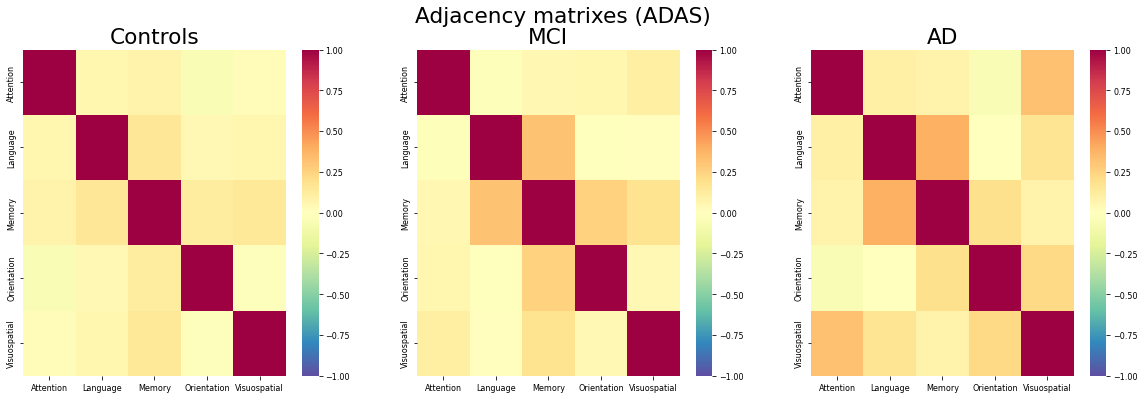

In [93]:
plot_adjacency_mx(ADAS_CN_mx, ADAS_MCI_mx, ADAS_AD_mx, 'ADAS')

#### Print the highest correlated pairs

In [94]:
threshold = 0.1
print("CN-----------------------")
high_corr_pairs(ADAS_CN_mx, threshold)
print("MCI----------------------")
high_corr_pairs(ADAS_MCI_mx, threshold)
print("AD-----------------------")
high_corr_pairs(ADAS_AD_mx, threshold)

CN-----------------------
Memory - Language :  0.15011257201134173
Orientation - Memory :  0.12029980314933962
Visuospatial - Memory :  0.14505535014898815
MCI----------------------
Memory - Language :  0.31923699660188304
Orientation - Memory :  0.2518093560876021
Visuospatial - Attention :  0.10290861005736195
Visuospatial - Memory :  0.17425449192478457
AD-----------------------
Language - Attention :  0.10143463037857708
Memory - Language :  0.3861406687745689
Orientation - Memory :  0.1899325717876747
Visuospatial - Attention :  0.3271049609910529
Visuospatial - Language :  0.16925031032334506
Visuospatial - Orientation :  0.22625298579927972


### MMSE

#### Divide data by diagnostic group

In [95]:
#Get indexes of subjects belonging to each group
MMSE_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MMSE = Y_MMSE.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MMSE_indexes[dx] = Y_MMSE.index[Y_MMSE['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MMSE_CN = X_MMSE.iloc[MMSE_indexes["CN"]]
X_MMSE_MCI = X_MMSE.iloc[MMSE_indexes["MCI"]]
X_MMSE_AD = X_MMSE.iloc[MMSE_indexes["AD"]]

print("Number of instances CN: ", X_MMSE_CN.shape[0])
print("Number of instances MCI: ", X_MMSE_MCI.shape[0])
print("Number of instances AD: ", X_MMSE_AD.shape[0])

Number of instances CN:  523
Number of instances MCI:  356
Number of instances AD:  339


#### Compute adjacency matrixes

In [96]:
MMSE_CN_mx = par_corr(X_MMSE_CN)
MMSE_MCI_mx = par_corr(X_MMSE_MCI)
MMSE_AD_mx = par_corr(X_MMSE_AD)

Total number of negative correlations:  2
Total number of negative correlations:  5
Total number of negative correlations:  7


#### Plot correlation matrixes as heatmaps

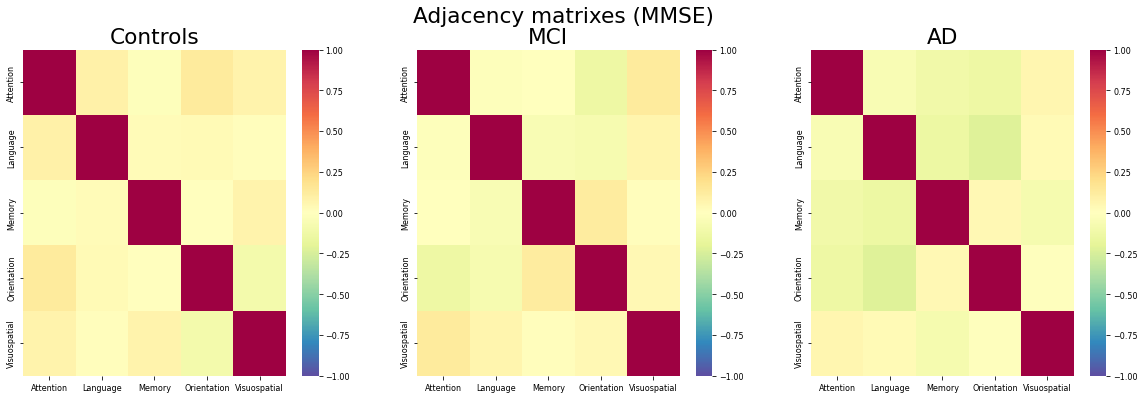

In [97]:
plot_adjacency_mx(MMSE_CN_mx, MMSE_MCI_mx, MMSE_AD_mx, 'MMSE')

Blank variables are those that are constant in the controls. Thus, the standard deviation is 0 (and the mean) is 0 and when computing the partial correlation matrixes it will raise an error. 

#### Find out the highest correlated pairs

In [98]:
threshold = 0.1
print("CN-----------------------")
high_corr_pairs(MMSE_CN_mx, threshold)
print("MCI----------------------")
high_corr_pairs(MMSE_MCI_mx, threshold)
print("AD-----------------------")
high_corr_pairs(MMSE_AD_mx, threshold)

CN-----------------------
Orientation - Attention :  0.12833912572772327
MCI----------------------
Orientation - Attention :  -0.13407202049785305
Orientation - Memory :  0.12256825565420446
Visuospatial - Attention :  0.1265739784983091
AD-----------------------
Memory - Attention :  -0.11322161303993339
Memory - Language :  -0.1410064150891466
Orientation - Attention :  -0.1360520966444233
Orientation - Language :  -0.22164540676190614


### MOCA

#### Divide data by diagnostic group

In [99]:
#Get indexes of subjects belonging to each group
MOCA_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_MOCA = Y_MOCA.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    MOCA_indexes[dx] = Y_MOCA.index[Y_MOCA['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_MOCA_CN = X_MOCA.iloc[MOCA_indexes["CN"]]
X_MOCA_MCI = X_MOCA.iloc[MOCA_indexes["MCI"]]
X_MOCA_AD = X_MOCA.iloc[MOCA_indexes["AD"]]

print("Number of instances CN: ", X_MOCA_CN.shape[0])
print("Number of instances MCI: ", X_MOCA_MCI.shape[0])
print("Number of instances AD: ", X_MOCA_AD.shape[0])

Number of instances CN:  646
Number of instances MCI:  158
Number of instances AD:  212


#### Compute adjacency matrixes

In [100]:
MOCA_CN_mx = par_corr(X_MOCA_CN)
MOCA_MCI_mx = par_corr(X_MOCA_MCI)
MOCA_AD_mx = par_corr(X_MOCA_AD)

Total number of negative correlations:  6
Total number of negative correlations:  3
Total number of negative correlations:  5


#### Plot correlation matrixes as heatmaps

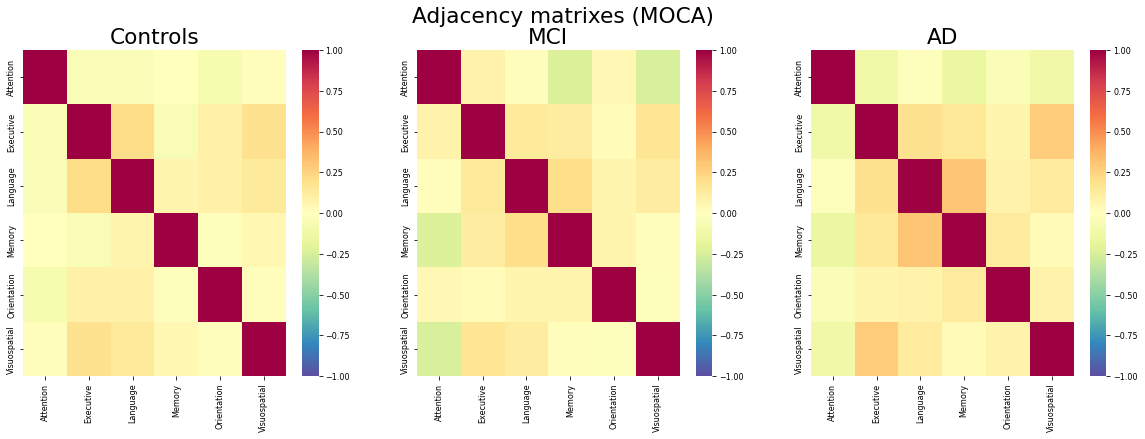

In [101]:
plot_adjacency_mx(MOCA_CN_mx, MOCA_MCI_mx, MOCA_AD_mx, 'MOCA')

#### Find out the highest correlated pairs

In [102]:
threshold = 0.1
print("CN-----------------------")
high_corr_pairs(MOCA_CN_mx, threshold)
print("MCI----------------------")
high_corr_pairs(MOCA_MCI_mx, threshold)
print("AD-----------------------")
high_corr_pairs(MOCA_AD_mx, threshold)

CN-----------------------
Language - Executive :  0.21079707617038085
Visuospatial - Executive :  0.18009038099289523
Visuospatial - Language :  0.13918071315860878
MCI----------------------
Language - Executive :  0.13555396506858863
Memory - Attention :  -0.2320635697486283
Memory - Executive :  0.11131975077979941
Memory - Language :  0.19679140187392427
Visuospatial - Attention :  -0.24841450092765463
Visuospatial - Executive :  0.16247914229368937
Visuospatial - Language :  0.1142772381108998
AD-----------------------
Executive - Attention :  -0.12010195304456159
Language - Executive :  0.18211578372445902
Memory - Attention :  -0.1485985098975316
Memory - Executive :  0.14804407759479957
Memory - Language :  0.30822260094628595
Orientation - Memory :  0.12848212455821742
Visuospatial - Attention :  -0.11138584167253114
Visuospatial - Executive :  0.2802583459430469
Visuospatial - Language :  0.12758767766385107


### NEUROBAT

#### Divide data by diagnostic group

In [103]:
#Get indexes of subjects belonging to each group
NEUROBAT_indexes = {} #Create empty dictionary
dx_groups = ["CN","MCI", "AD"] #diagnostic groups list

Y_NEUROBAT = Y_NEUROBAT.replace({'EMCI':'MCI', 'LMCI':'MCI',"SMC":"CN"})

for dx in dx_groups:
    NEUROBAT_indexes[dx] = Y_NEUROBAT.index[Y_NEUROBAT['DX_bl'] == dx].tolist()
    
#Filter results table by diagnostic group
X_NEUROBAT_CN = X_NEUROBAT.iloc[NEUROBAT_indexes["CN"]]
X_NEUROBAT_MCI = X_NEUROBAT.iloc[NEUROBAT_indexes["MCI"]]
X_NEUROBAT_AD = X_NEUROBAT.iloc[NEUROBAT_indexes["AD"]]

print("Number of instances CN: ", X_NEUROBAT_CN.shape[0])
print("Number of instances MCI: ", X_NEUROBAT_MCI.shape[0])
print("Number of instances AD: ", X_NEUROBAT_AD.shape[0])

Number of instances CN:  229
Number of instances MCI:  219
Number of instances AD:  185


#### Compute adjacency matrixes

In [104]:
print("CONTROLS---------------")
NEUROBAT_CN_mx = par_corr(X_NEUROBAT_CN)
print("MCI--------------------")
NEUROBAT_MCI_mx = par_corr(X_NEUROBAT_MCI)
print("AD---------------------")
NEUROBAT_AD_mx = par_corr(X_NEUROBAT_AD)

CONTROLS---------------
Total number of negative correlations:  2
MCI--------------------
Total number of negative correlations:  3
AD---------------------
Total number of negative correlations:  3


#### Plot correlation matrixes as heatmaps

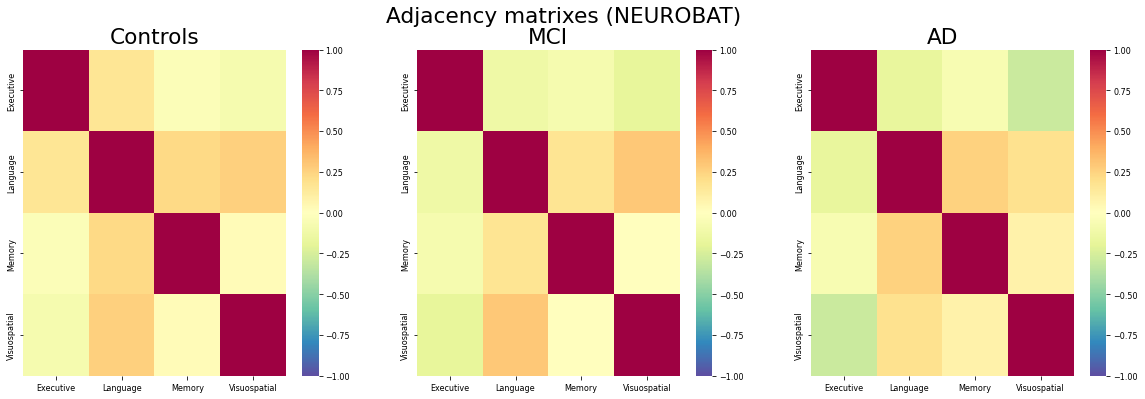

In [105]:
plot_adjacency_mx(NEUROBAT_CN_mx, NEUROBAT_MCI_mx, NEUROBAT_AD_mx, 'NEUROBAT')

#### Print the highest correlated pairs

In [106]:
threshold = 0.1
print("CN-----------------------")
high_corr_pairs(NEUROBAT_CN_mx, threshold)
print("MCI----------------------")
high_corr_pairs(NEUROBAT_MCI_mx, threshold)
print("AD-----------------------")
high_corr_pairs(NEUROBAT_AD_mx, threshold)

CN-----------------------
Language - Executive :  0.15875595814714732
Memory - Language :  0.22280811424681726
Visuospatial - Language :  0.2643722186800676
MCI----------------------
Language - Executive :  -0.1311185409643495
Memory - Language :  0.17041802162696712
Visuospatial - Executive :  -0.18589904329223378
Visuospatial - Language :  0.29049712469130057
AD-----------------------
Language - Executive :  -0.1749363758592563
Memory - Language :  0.251135043353053
Visuospatial - Executive :  -0.2907265934333316
Visuospatial - Language :  0.18734996271973117


In [107]:
df = pd.DataFrame({'column_name': ['value3', 'value2', 'value3', 'value1', 'value2']})
df['column_name'].value_counts()

value3    2
value2    2
value1    1
Name: column_name, dtype: int64

## 6. GRAPH CONSTRUCTION

The number of nodes ($V$) is equivalent to the number of tests included in the neurocognitive battery, whereas the number of possible edges in an undirected graph is $\frac{V·(V-1)}{2}$

In [108]:
import networkx as nx

In [109]:
def cognitive_network(mx, threshold):
    """Function to remove diagonal elements and convert scores into absolute values. It returns a networkx graph"""
    
    for i in range(mx.shape[1]): #iterate matrix columns
        colname = mx.columns[i]
        #Remove diagonal elements
        mx[colname] =np.where((mx[colname]==1.0) | (mx[colname].isnull()),0, mx[colname]) 
        #Convert negative correlations in positive ones
        mx[colname] = np.where((mx[colname]<0),-1*mx[colname], mx[colname])
        
        #discard all correlations below threshold
        if threshold is None:
            next
        else:
            mx[colname] = np.where((mx[colname]<threshold),0, mx[colname])
    
    #Create graph from adjacency matrix
    g = nx.from_numpy_array(mx.to_numpy())
    
    return g

In [110]:
def node_attributes(graphs_ls, X_ls, metadata_path): 
    """Function to add attributes to the nodes of the graph"""
    
    attribute_ls = ['Cognitive Domain', 'nTests']
    
    metadata_df = pd.DataFrame()
    metadata_df['Cognitive Domain'] = X_ls[0].columns
    metadata_df['Node'] = metadata_df.index
    
    domains_metadata = pd.read_csv(metadata_path, sep=";")
    test_counts = domains_metadata['Cognitive Domain'].value_counts()
    count_df = pd.DataFrame({'Cognitive Domain': test_counts.index, 'nTests': test_counts.values})
    metadata_df = pd.merge(metadata_df, count_df, on='Cognitive Domain')
    
    #Add attributes
    for graph in graphs_ls:
        for attribute in attribute_ls:
            nx.set_node_attributes(graph, dict(zip(metadata_df.Node, metadata_df[attribute])), name=attribute)
        
    #add mean z-score to each node
    for dx in range(len(X_ls)): 
        means = X_ls[dx].mean(axis=0).tolist()
        nx.set_node_attributes(graphs_ls[dx], dict(zip(metadata_df.Node, means)), name='Zscore mean')

In [340]:
import matplotlib.lines as mlines

def draw_graph(graphs_ls, test_labels, pos, battery_name):
    
    #Color by NC domain
    ATTRIBUTE_NAME = 'Cognitive Domain'
    mapping = {'Attention':0, 'Executive':1, 'Language':2, 'Memory':3, 'Orientation':4, 'Visuospatial':5}
    colorCodes_dict = {0:"#9999FF", 1:"#CC99FF", 2:"#F8766D", 3:"#00BFC4", 4:"#66CC99", 5:"#FFCC99"}
    
    colors=[]
    for node in list(graphs_ls[0].nodes()): #iterate each node
        domain = graphs_ls[0].nodes[node][ATTRIBUTE_NAME]
        color = mapping[domain]
        colors.append(colorCodes_dict[color])

    #Plot
    fig, axes = plt.subplots(1,3, figsize=(28,7))
    fig.subplots_adjust(wspace=0.05)
    
    # create combined legend for all subgraphs
    handles = []
    labels = []
    
    for i in range(len(graphs_ls)):
        
        graph = graphs_ls[i]

        #get edges weights
        weights = list(nx.get_edge_attributes(graph,'weight').values())
        
        if test_labels is not None: 
            nx.draw(ax=axes[i], G=graph, pos=pos, labels=test_labels, with_labels=True, font_size=12, node_color=colors, 
                    edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
        
        else:
            nx.draw(ax=axes[i], G=graph, pos=pos, with_labels=True, node_color=colors, 
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
            
    #Add legend labels
    edge_labels = {tuple(edge): float(weight) for edge, weight in nx.get_edge_attributes(graph,'weight').items()}

    # add labels and handles to combined legend
    for edge, weight in edge_labels.items():
        if edge not in labels:
            handles.append(mlines.Line2D([], [], color='grey', linewidth=10*weight, label=weight))
            labels.append(edge)

    # create colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Greys, norm=plt.Normalize(vmin=min(weights), vmax=max(weights)))
    plt.colorbar(sm, ax=axes)

    # set label of colorbar
    axes[2].get_figure().axes[-1].set_ylabel('Edge Weight')
    
    
    #add title to subfigures
    axes[0].title.set_text("Controls")
    axes[1].title.set_text("MCI")
    axes[2].title.set_text("AD")
    
    figure_path = "./Results/Figures/Graphs/"+ battery_name + ".svg"

    plt.savefig(figure_path, format="svg")
    plt.show()

### ADAS-Cog

#### 6.1 Compute graph

In [374]:
import networkx as nx

#convert adjacency matrix into graph
ADAS_CN_graph = cognitive_network(ADAS_CN_mx, threshold=None)
ADAS_MCI_graph = cognitive_network(ADAS_MCI_mx, threshold=None)
ADAS_AD_graph = cognitive_network(ADAS_AD_mx, threshold=None)

In [375]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", ADAS_CN_graph.number_of_nodes())
print("- Number of edges: ", ADAS_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", ADAS_MCI_graph.number_of_nodes())
print("- Number of edges: ", ADAS_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", ADAS_AD_graph.number_of_nodes())
print("- Number of edges: ", ADAS_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  5
- Number of edges:  10

MCI-------------------------
- Number of nodes:  5
- Number of edges:  10

AD-------------------------
- Number of nodes:  5
- Number of edges:  10


#### 6.2. Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [376]:
metadata_path = "./NC_Tests/ADAS_Metadata.csv"
graphs_ls = [ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph]
X_ls = [X_ADAS_CN, X_ADAS_MCI, X_ADAS_AD]

node_attributes(graphs_ls, X_ls, metadata_path)

#### 6.3. Draw graph

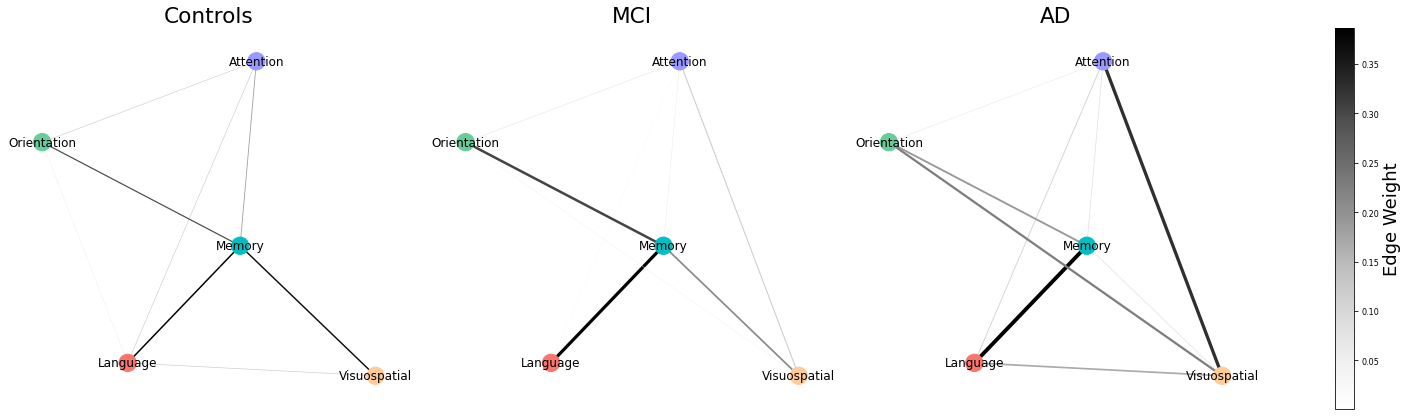

In [377]:
#Node labels
ADAS_labels = {} #create empty dictionary

for i in range(ADAS_CN_mx.shape[1]):
    ADAS_labels[i] = ADAS_CN_mx.columns[i]


#fix position
pos_ADAS=nx.spring_layout(ADAS_CN_graph, weight='weight', seed=0)

draw_graph(graphs_ls, ADAS_labels, pos_ADAS, 'ADAS')

#### Edges weights

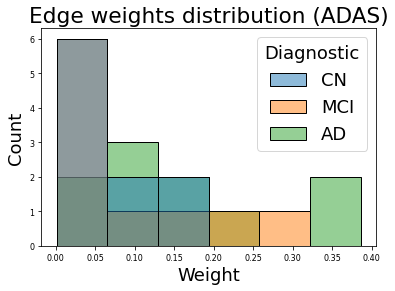

In [378]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(list(nx.get_edge_attributes(ADAS_CN_graph,'weight').values()), columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(list(nx.get_edge_attributes(ADAS_MCI_graph,'weight').values()), columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(list(nx.get_edge_attributes(ADAS_AD_graph,'weight').values()), columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution (ADAS)")
plt.savefig("./Results_domains/Figures/Weights/ADAS_weights.svg", format="svg")
plt.show()

### MMSE

#### 6.1 Compute graph

In [379]:
import networkx as nx

#convert adjacency matrix into graph
MMSE_CN_graph = cognitive_network(MMSE_CN_mx, threshold=None)
MMSE_MCI_graph = cognitive_network(MMSE_MCI_mx, threshold=None)
MMSE_AD_graph = cognitive_network(MMSE_AD_mx, threshold=None)

In [380]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", MMSE_CN_graph.number_of_nodes())
print("- Number of edges: ", MMSE_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", MMSE_MCI_graph.number_of_nodes())
print("- Number of edges: ", MMSE_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", MMSE_AD_graph.number_of_nodes())
print("- Number of edges: ", MMSE_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  5
- Number of edges:  10

MCI-------------------------
- Number of nodes:  5
- Number of edges:  10

AD-------------------------
- Number of nodes:  5
- Number of edges:  10


#### 6.2. Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [381]:
metadata_path = "./NC_Tests/MMSE_Metadata.csv"
graphs_ls = [MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph]
X_ls = [X_MMSE_CN, X_MMSE_MCI, X_MMSE_AD]

node_attributes(graphs_ls, X_ls, metadata_path)

#### 6.3. Draw graph

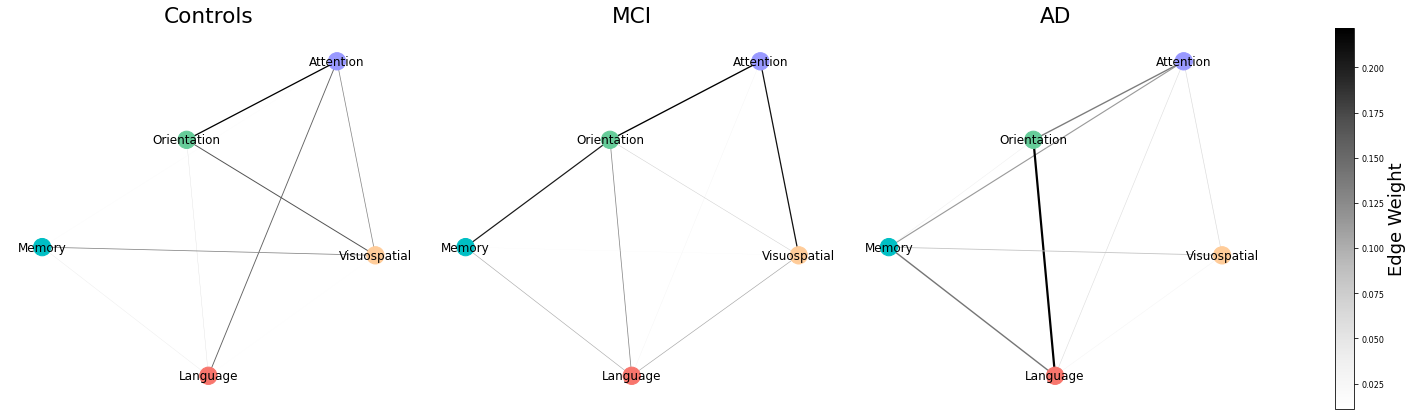

In [382]:
#Node labels
MMSE_labels = {} #create empty dictionary

for i in range(MMSE_CN_mx.shape[1]):
    MMSE_labels[i] = MMSE_CN_mx.columns[i]


#fix position
pos_MMSE=nx.spring_layout(MMSE_MCI_graph, weight='weight', seed=0)

draw_graph(graphs_ls, MMSE_labels, pos_MMSE, 'MMSE')

#### Edges weights

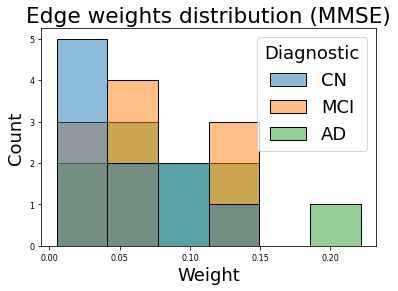

In [383]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(list(nx.get_edge_attributes(MMSE_CN_graph,'weight').values()), columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(list(nx.get_edge_attributes(MMSE_MCI_graph,'weight').values()), columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(list(nx.get_edge_attributes(MMSE_AD_graph,'weight').values()), columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution (MMSE)")
plt.savefig("./Results_domains/Figures/Weights/MMSE_weights.svg", format="svg")
plt.show()

### MOCA

#### 6.1 Compute graph

In [384]:
import networkx as nx

#convert adjacency matrix into graph
MOCA_CN_graph = cognitive_network(MOCA_CN_mx, threshold=None)
MOCA_MCI_graph = cognitive_network(MOCA_MCI_mx, threshold=None)
MOCA_AD_graph = cognitive_network(MOCA_AD_mx, threshold=None)

In [385]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", MOCA_CN_graph.number_of_nodes())
print("- Number of edges: ", MOCA_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", MOCA_MCI_graph.number_of_nodes())
print("- Number of edges: ", MOCA_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", MOCA_AD_graph.number_of_nodes())
print("- Number of edges: ", MOCA_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  6
- Number of edges:  15

MCI-------------------------
- Number of nodes:  6
- Number of edges:  15

AD-------------------------
- Number of nodes:  6
- Number of edges:  15


#### 6.2. Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [386]:
metadata_path = "./NC_Tests/MOCA_Metadata.csv"
graphs_ls = [MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph]
X_ls = [X_MOCA_CN, X_MOCA_MCI, X_MOCA_AD]

node_attributes(graphs_ls, X_ls, metadata_path)

#### 6.3. Draw graph

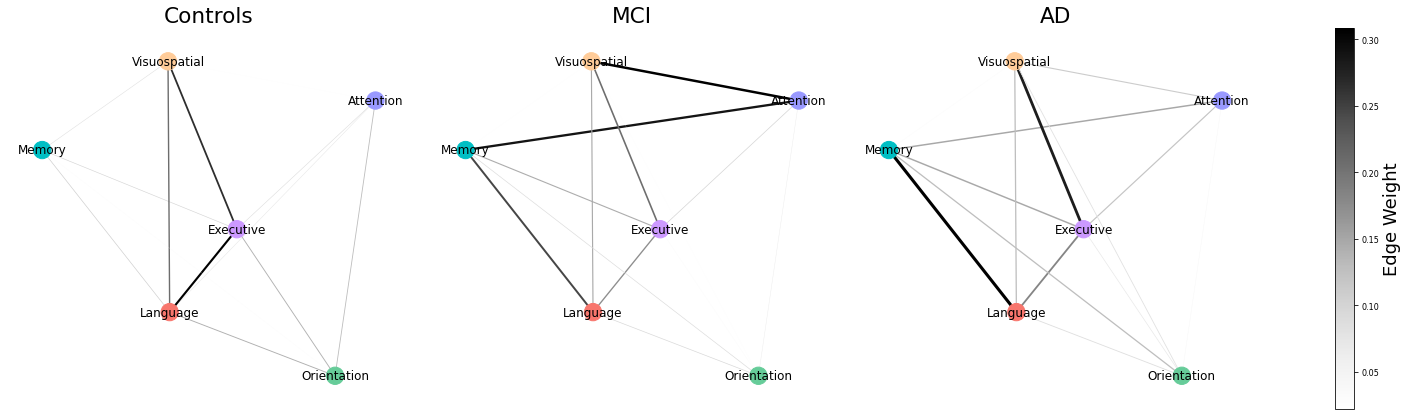

In [387]:
#Node labels
MOCA_labels = {} #create empty dictionary

for i in range(MOCA_CN_mx.shape[1]):
    MOCA_labels[i] = MOCA_CN_mx.columns[i]

#fix position
pos_MOCA=nx.spring_layout(MOCA_CN_graph, weight='weight', seed=0)

draw_graph(graphs_ls, MOCA_labels, pos_MOCA, 'MOCA')

#### Edges weights

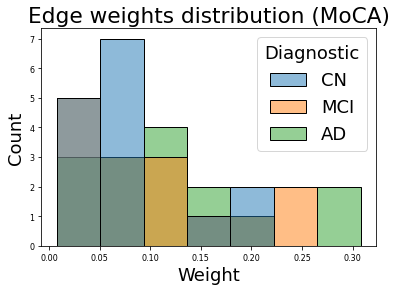

In [388]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(list(nx.get_edge_attributes(MOCA_CN_graph,'weight').values()), columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(list(nx.get_edge_attributes(MOCA_MCI_graph,'weight').values()), columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(list(nx.get_edge_attributes(MOCA_AD_graph,'weight').values()), columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution (MoCA)")
plt.savefig("./Results_domains/Figures/Weights/MOCA_weights.svg", format="svg")
plt.show()

### NEUROBAT

#### 6.1 Compute graph

In [389]:
import networkx as nx

#convert adjacency matrix into graph
NEUROBAT_CN_graph = cognitive_network(NEUROBAT_CN_mx, threshold=None)
NEUROBAT_MCI_graph = cognitive_network(NEUROBAT_MCI_mx, threshold=None)
NEUROBAT_AD_graph = cognitive_network(NEUROBAT_AD_mx, threshold=None)

In [390]:
#count nodes and edges
print("CN-------------------------")
print("- Number of nodes: ", NEUROBAT_CN_graph.number_of_nodes())
print("- Number of edges: ", NEUROBAT_CN_graph.number_of_edges())
print()
print("MCI-------------------------")
print("- Number of nodes: ", NEUROBAT_MCI_graph.number_of_nodes())
print("- Number of edges: ", NEUROBAT_MCI_graph.number_of_edges())
print()
print("AD-------------------------")
print("- Number of nodes: ", NEUROBAT_AD_graph.number_of_nodes())
print("- Number of edges: ", NEUROBAT_AD_graph.number_of_edges())

CN-------------------------
- Number of nodes:  4
- Number of edges:  6

MCI-------------------------
- Number of nodes:  4
- Number of edges:  6

AD-------------------------
- Number of nodes:  4
- Number of edges:  6


#### 6.2. Add node attributes

As the nodes represent different tests they are going to have the following attributes:

- ADNI column: name of the test in the ADNI database
- Test description
- Cognitive domain

In [391]:
metadata_path = "./NC_Tests/NEUROBAT_Metadata.csv"
graphs_ls = [NEUROBAT_CN_graph, NEUROBAT_MCI_graph, NEUROBAT_AD_graph]
X_ls = [X_NEUROBAT_CN, X_NEUROBAT_MCI, X_NEUROBAT_AD]

node_attributes(graphs_ls, X_ls, metadata_path)

#### 6.3. Draw graph

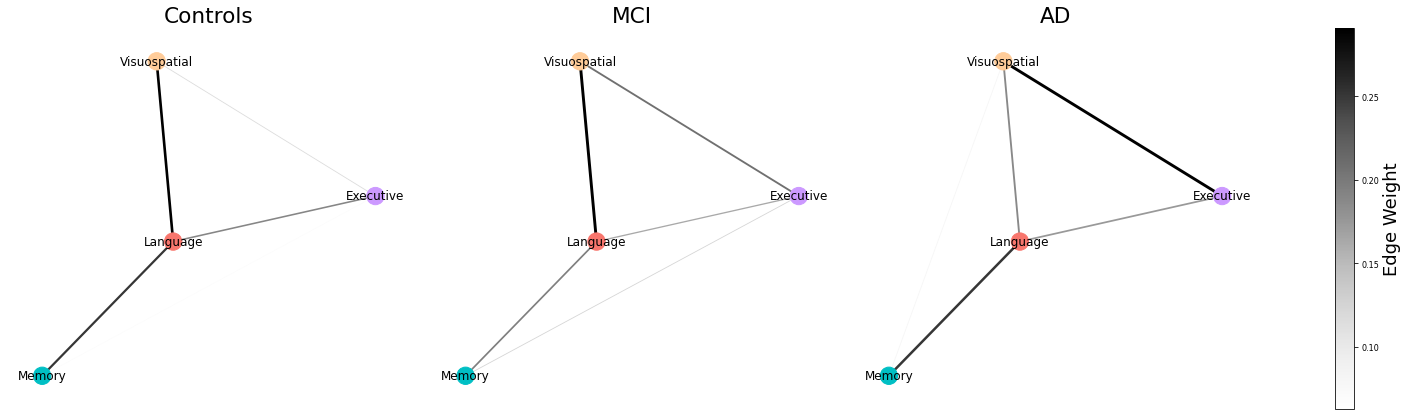

In [392]:
#Node labels
NEUROBAT_labels = {} #create empty dictionary

for i in range(NEUROBAT_CN_mx.shape[1]):
    NEUROBAT_labels[i] = NEUROBAT_CN_mx.columns[i]


#fix position
pos_NEUROBAT=nx.spring_layout(NEUROBAT_CN_graph, weight='weight', seed=0)

draw_graph(graphs_ls, NEUROBAT_labels, pos_NEUROBAT, 'NEUROBAT')

#### Edges weights

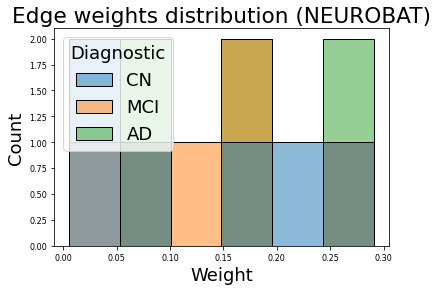

In [393]:
#Create dataframe with weights
weights_df_CN = pd.DataFrame(list(nx.get_edge_attributes(NEUROBAT_CN_graph,'weight').values()), columns=["Weight"])
weights_df_CN['Diagnostic'] = "CN"
weights_df_MCI = pd.DataFrame(list(nx.get_edge_attributes(NEUROBAT_MCI_graph,'weight').values()), columns=["Weight"])
weights_df_MCI['Diagnostic'] = "MCI"
weights_df_AD = pd.DataFrame(list(nx.get_edge_attributes(NEUROBAT_AD_graph,'weight').values()), columns=["Weight"])
weights_df_AD['Diagnostic'] = "AD"

#merge all
weights_df = pd.concat([weights_df_CN, weights_df_MCI, weights_df_AD], ignore_index=True)

#plot histogram
sns.histplot(data=weights_df, x="Weight", hue="Diagnostic")
plt.title("Edge weights distribution (NEUROBAT)")
plt.savefig("./Results_domains/Figures/Weights/NEUROBAT_weights.svg", format="svg")
plt.show()

## 7. NETWORK ANALYSIS

#### 1. CENTRALITY MEASURES

#### Degree Centrality

In network analysis, measures of the importance of nodes are referred to as **centrality** measures. **Degree** is the simplest and the most common way of finding important nodes. A node’s degree is the sum of its edges between all the possible connections. This is the centrality measure used in the epilepsy paper. 

#### Other centrality measures

- **Closeness centrality**: is a way of detecting nodes that are able to spread information very efficiently through a graph. The closeness centrality of a node measures its average farness (inverse distance) to all other nodes. 
- **Eigenvector centrality**: is a kind of extension of degree—it looks at a combination of a node’s edges and the edges of that node’s neighbors. Eigenvector centrality cares if you are a hub, but it also cares how many hubs you are connected to. It’s calculated as a value from 0 to 1: the closer to one, the greater the centrality. Eigenvector centrality is useful for understanding which nodes can get information to many other nodes quickly. 
- **Betweenness centrality**: t doesn’t care about the number of edges any one node or set of nodes has. Betweenness centrality looks at all the shortest paths that pass through a particular node (see above). Betweenness centrality, which is also expressed on a scale of 0 to 1, is fairly good at finding nodes that connect two otherwise disparate parts of a network.

In [361]:
def centrality(graph,columns):
    
    """Function to compute a table with the different centrality measures for each node."""
    
    #compute edges distances based on weights
    g_distance_dict = {(e1, e2): 1/weight for e1, e2, weight in graph.edges(data='weight')}
    nx.set_edge_attributes(graph, g_distance_dict, 'distance')
    
    #DC = nx.degree_centrality(graph) #degree centrality
    #CC = nx.closeness_centrality(graph) #closeness centrality     
    DC = [graph.degree(n, weight='weight') for n in graph.nodes()] #degree centrality
    CC = nx.closeness_centrality(graph, distance='distance')
    EC = nx.eigenvector_centrality(graph, weight='weight') #eigenvector centrality
    BC = nx.betweenness_centrality(graph, weight='weight') #betweenness centrality
    
    
    centrality_df = pd.DataFrame() #create empty dataframe
    
    for node in BC:
        centrality_df.at[node, "Degree_Centrality"] = DC[node] / (len(DC) - 1)
        centrality_df.at[node, "Closeness_Centrality"] = CC[node] 
        centrality_df.at[node, "Eigenvector_Centrality"] = EC[node] 
        centrality_df.at[node, "Betweenness_Centrality"] = BC[node] 
    
    centrality_df.index = columns
        
    return centrality_df

In [362]:
def plot_centrality(graph_CN, graph_MCI, graph_AD, columns, centrality_metric, battery_name):
    #Compute centrality measures
    df_CN = centrality(graph_CN, columns)
    df_MCI = centrality(graph_MCI, columns)
    df_AD = centrality(graph_AD, columns)
    
    #Order dataframe by centrality
    df_CN = df_CN.sort_values(by=[centrality_metric],ascending = False)
    df_MCI = df_MCI.sort_values(by=[centrality_metric],ascending = False)
    df_AD = df_AD.sort_values(by=[centrality_metric],ascending = False)
    
    
    #Plot 
    fig, ax = plt.subplots(1,3, figsize=(24,10))
    
    sns.barplot(ax=ax[0], x=centrality_metric, y=df_CN.index, data=df_CN, palette=['#1f77b4']) 
    sns.barplot(ax=ax[1], x=centrality_metric, y=df_MCI.index, data=df_MCI, palette=['#ff7f0e']) 
    sns.barplot(ax=ax[2], x=centrality_metric, y=df_AD.index, data=df_AD, palette=['#2ca02c']) 
    
    for i in range(3):
        ax[i].set_ylabel("Domain")
    
    #add title to subfigures
    ax[0].title.set_text("Controls")
    ax[1].title.set_text("MCI")
    ax[2].title.set_text("AD")
        
    filename = "./Results_domains/Figures/Metrics/" + centrality_metric + "_" + battery_name + ".svg"
    plt.savefig(filename, format="svg")
    
    plt.show()

#### 2. GLOBAL METRICS

#### Average clustering coefficient

In graph theory, a **clustering coefficient** is a measure of the degree to which nodes in a graph tend to cluster together. Two versions of this measure exist: the global and the local. The global version was designed to give an overall indication of the clustering in the network, whereas the local gives an indication of the embeddedness of single nodes. In this work we are computing **global measures**.

The clustering coefficient for the graph is the average,

$$
    C = \frac{1}{n}\sum_{v \in G}c_v
$$

where $n$ is the number of nodes in the graph $G$.

#### Global efficiency

The **efficiency** of a pair of nodes in a graph is the multiplicative inverse of the shortest path distance between the nodes. The average global efficiency of a graph is the average efficiency of all pairs of nodes. Edge weights are ignored when computing the shortest path distances.

Note than in the epilepsy paper they computed *normalized global efficiencies*.

#### Global measures summary

The following global metrics are going to be computed:

- **Number of nodes ($V$)**: number of entities
- **Number of edges ($E$)**: pairs of connected entities
- **Diameter**: the diameter of a graph is definded as the largest shortest path distance in the graph. It is the maximum value of $d(u,v)$ overf all $u,v$ pairs, where $d(u,v)$ denotes the shortest path distance from vertex $u$ to vertex $v$.
- **Density**: it is the ratio of actual edges in the network to all possible connections between the entities of the network. Network density gives you a quick sense of how closely knit your network is. It is also know as the *sparsity* of the graph and ranges between 0 and 1. Low values would indicate a network with a few specific conexions, whereas high values are indicative of a low specificity. 

$$ \frac{2·\sum_{v \in V, u \in V, u\neq v} weight(u,v)}{|V|-|V-1|} $$

- **Average degree**: The average degree of an undirected graph is used to measure the number of edges compared to the number of nodes. To do this we simply divide the summation of all nodes' degree by the total number of nodes. 

- **Transitivity**: it is the ratio of all triangles over all possible triangles. So transitivity, like density, expresses how interconnected a graph is in terms of a ratio of actual over possible connections. 
- **Average clustering coefficient**: In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. The global clustering coefficient is based on triplets of nodes. The global clustering coefficient is the number of closed triplets (or 3 x triangles) over the total number of triplets (both open and closed). 
- **Glogbal Efficiency**: In network science, the efficiency of a network is a measure of how efficiently it exchanges information and it is also called *communication efficiency*. The global efficiency is the average inverse shortest path length in the network. https://stackoverflow.com/questions/56554132/how-can-i-calculate-global-efficiency-more-efficiently 

$$E_{global(G)} = \frac{1}{n(n-1)}\sum_{i \neq j} \in (u_i, v_j)$$ 

where $\in_{i,j}=\frac{1}{d(i,j)}$

In [363]:
from itertools import permutations

def global_efficiency_weighted(G):
    """Function to compute global efficiency in a weighted graph"""
    n = len(G)
    denom = n * (n - 1)
    if denom != 0:
        shortest_paths = dict(nx.all_pairs_dijkstra(G, weight = 'weight'))
        g_eff = sum(1./shortest_paths[u][0][v] if shortest_paths[u][0][v] !=0 else 0 for u, v in permutations(G, 2)) / denom
    else:
        g_eff = 0
    return g_eff

In [364]:
def global_metrics(graphs_ls):
    
    """Function to compute a table with some global metrics of the graphs. 
    It returns a pandas DataFrame object."""
    
    columns = ['NNodes', 'NEdges', 'Diameter', 'Density', 'AvDegree', 'Transitivity','AvCC', 'AvGE']
    index = ['CN', 'MCI', 'AD']
    
    df = pd.DataFrame(columns = columns,
                     index = index) #empty dataframe
    
    #GLOBAL METRICS
    
    for i in range(len(index)): 
        graph = graphs_ls[i]
        dx = index[i]
        
        df.loc[dx,'NNodes'] = graph.number_of_nodes() #number of nodes
        df.loc[dx,'NEdges'] = graph.number_of_edges() #number of edges
        shortest = nx.shortest_path_length(graph, weight="weight") #matrix of shortest paths
        ecc = nx.eccentricity(graph, sp=dict(shortest))
        df.loc[dx,'Diameter'] = nx.diameter(graph, e=ecc) #diameter of graph
        #df.loc[dx,'Density'] = nx.density(graph) #density of graph
        nPossibleEdges = (graph.number_of_nodes()*(graph.number_of_nodes()-1))/2
        df.loc[dx, 'Density'] = graph.size(weight='weight')/ nPossibleEdges
        df.loc[dx,'AvDegree'] = sum(dict(graph.degree(weight='weight')).values())/graph.number_of_nodes() #average degree
        df.loc[dx,'Transitivity'] = nx.transitivity(graph) #transitivity of graph
        df.loc[dx,'AvCC'] = nx.average_clustering(graph,weight='weight') #average clustering coefficient
        #df.loc[dx,'AvGE'] = nx.global_efficiency(graph) #average global efficiency (shortest path)
        df.loc[dx,'AvGE'] = global_efficiency_weighted(graph)
    
    return df

In [365]:
def plot_global_metrics(gm, battery_name):
    """Function to plot global metrics."""

    fig, ax = plt.subplots(2, 3, figsize=(22,13))

    sns.barplot(ax=ax[0,0], x="index", y="NEdges", data=gm) 
    sns.barplot(ax=ax[0,1], x="index", y="Diameter", data=gm)
    sns.barplot(ax=ax[0,2], x="index", y="Density", data=ADAS_gm) 
    sns.barplot(ax=ax[1,0], x="index", y="AvDegree", data=gm) 
    sns.barplot(ax=ax[1,1], x="index", y="AvCC", data=gm)
    sns.barplot(ax=ax[1,2], x="index", y="AvGE",  data=gm)

    fig.suptitle("Global metrics (" + battery_name +")", fontsize=20)

    rows, cols = 2, 3
    for i in range(rows):
        for j in range(cols):
            ax[i, j].set_xlabel('Diagnostic group')
    
    filename = "./Results_domains/Figures/Metrics/GlobalMetrics_"+ battery_name + ".svg"
    plt.savefig(filename, format="svg")

    plt.show()

### 7.1. ADAS-Cog

#### 7.1.1. CENTRALITY MEASURES

In [366]:
ADAS_columns = list(X_ADAS.columns)

In [367]:
print("Controls----------------------------------")
CM_ADAS_CN = centrality(ADAS_CN_graph, ADAS_columns)
CM_ADAS_CN.to_csv("./Results/ADAS/CM_CN.csv", sep=";")
display(CM_ADAS_CN)
print("MCI----------------------------------")
CM_ADAS_MCI = centrality(ADAS_MCI_graph, ADAS_columns)
CM_ADAS_MCI.to_csv("./Results/ADAS/CM_MCI.csv", sep=";")
display(CM_ADAS_MCI)
print("AD----------------------------------")
CM_ADAS_AD = centrality(ADAS_AD_graph, ADAS_columns)
CM_ADAS_AD.to_csv("./Results/ADAS/CM_AD.csv", sep=";")
display(CM_ADAS_AD)

Controls----------------------------------


,Degree_Centrality,Closeness_Centrality,Eigenvector_Centrality,Betweenness_Centrality
Attention,0.056222,0.062327,0.333623,0.333333
Language,0.078509,0.077590,0.464012,0.000000
Memory,0.124416,0.117528,0.610492,0.000000
Orientation,0.060829,0.072618,0.369865,0.000000
Visuospatial,0.062739,0.073105,0.404831,0.166667


MCI----------------------------------


,Degree_Centrality,Closeness_Centrality,Eigenvector_Centrality,Betweenness_Centrality
Attention,0.060096,0.066069,0.219215,0.500000
Language,0.089920,0.106112,0.469209,0.833333
Memory,0.198896,0.141350,0.671633,0.000000
Orientation,0.090080,0.106479,0.415255,0.000000
Visuospatial,0.080299,0.117518,0.329030,0.000000


AD----------------------------------


,Degree_Centrality,Closeness_Centrality,Eigenvector_Centrality,Betweenness_Centrality
Attention,0.141733,0.128804,0.409888,0.333333
Language,0.164462,0.157988,0.474909,0.166667
Memory,0.182538,0.143327,0.484195,0.166667
Orientation,0.119418,0.159894,0.348970,0.333333
Visuospatial,0.199689,0.182786,0.500228,0.000000


#### Plot centrality metrics

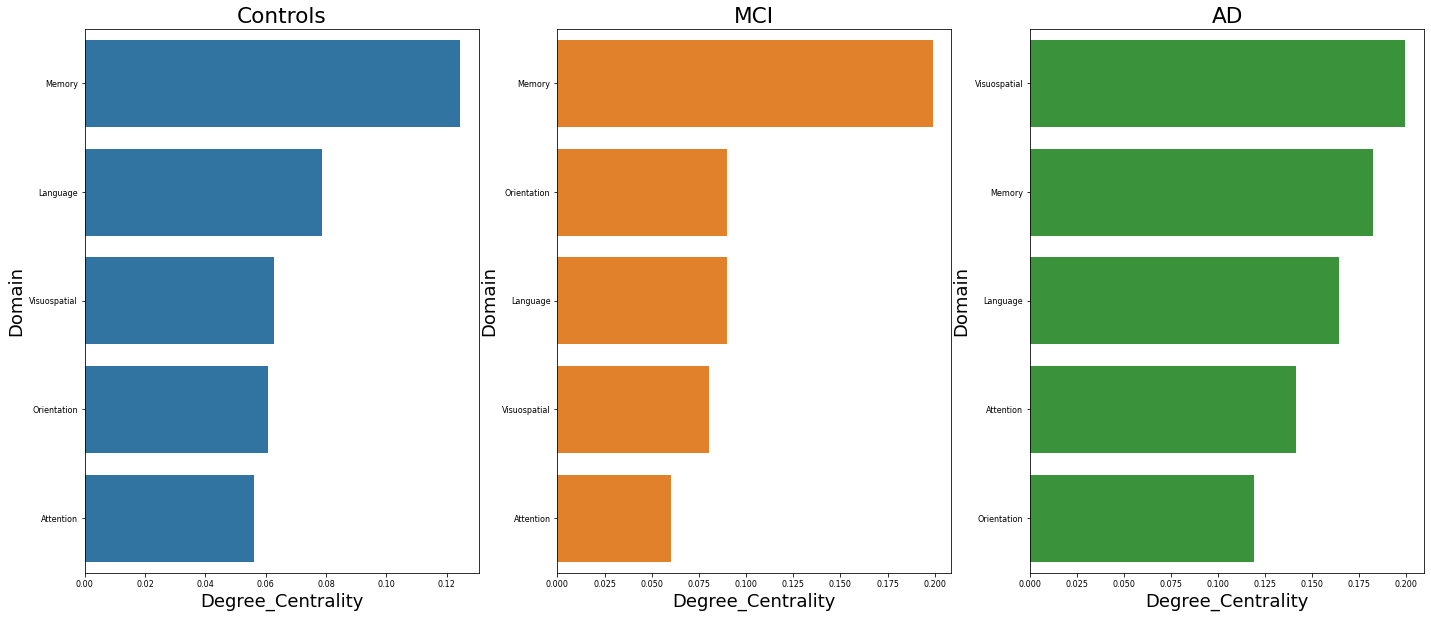

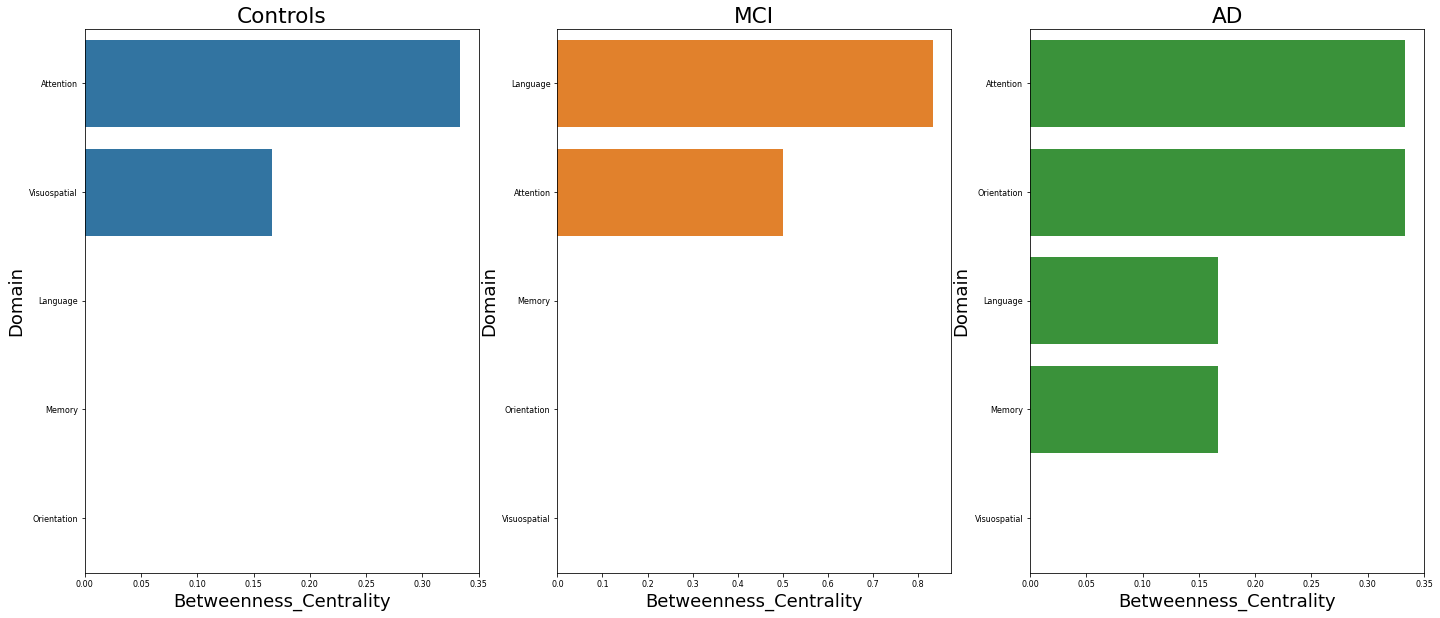

In [368]:
plot_centrality(ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph, ADAS_columns, "Degree_Centrality", 'ADAS')
plot_centrality(ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph, ADAS_columns, "Betweenness_Centrality", 'ADAS')

#### Relation between node degree and betweenness centrality

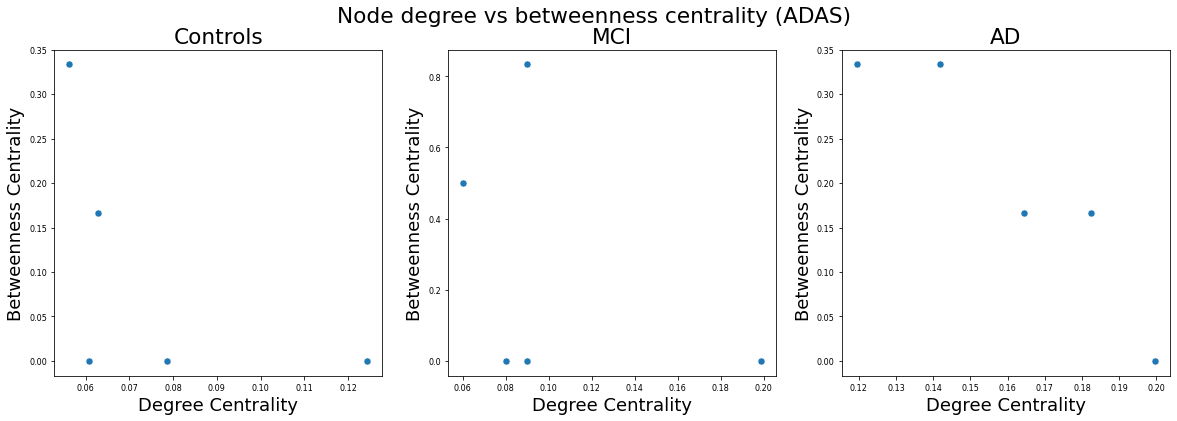

In [369]:
#Get centrality metrics table
ADAS_CN_centrality = centrality(ADAS_CN_graph, ADAS_columns)
ADAS_MCI_centrality = centrality(ADAS_MCI_graph, ADAS_columns)
ADAS_AD_centrality = centrality(ADAS_AD_graph, ADAS_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=ADAS_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=ADAS_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=ADAS_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality (ADAS)')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.savefig("./Results_domains/Figures/Metrics/BCvsDG_ADAS.svg", format="svg")
plt.show()

#### 7.1.2. GLOBAL METRICS

In [370]:
ADAS_gm = global_metrics([ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph])
ADAS_gm.reset_index(inplace=True)
ADAS_gm

,index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE
0,CN,5,10,0.143313,0.076543,0.306172,1.0,0.451303,20.905119
1,MCI,5,10,0.086749,0.103858,0.415433,1.0,0.205199,59.394777
2,AD,5,10,0.170275,0.161568,0.646272,1.0,0.290701,106.775406


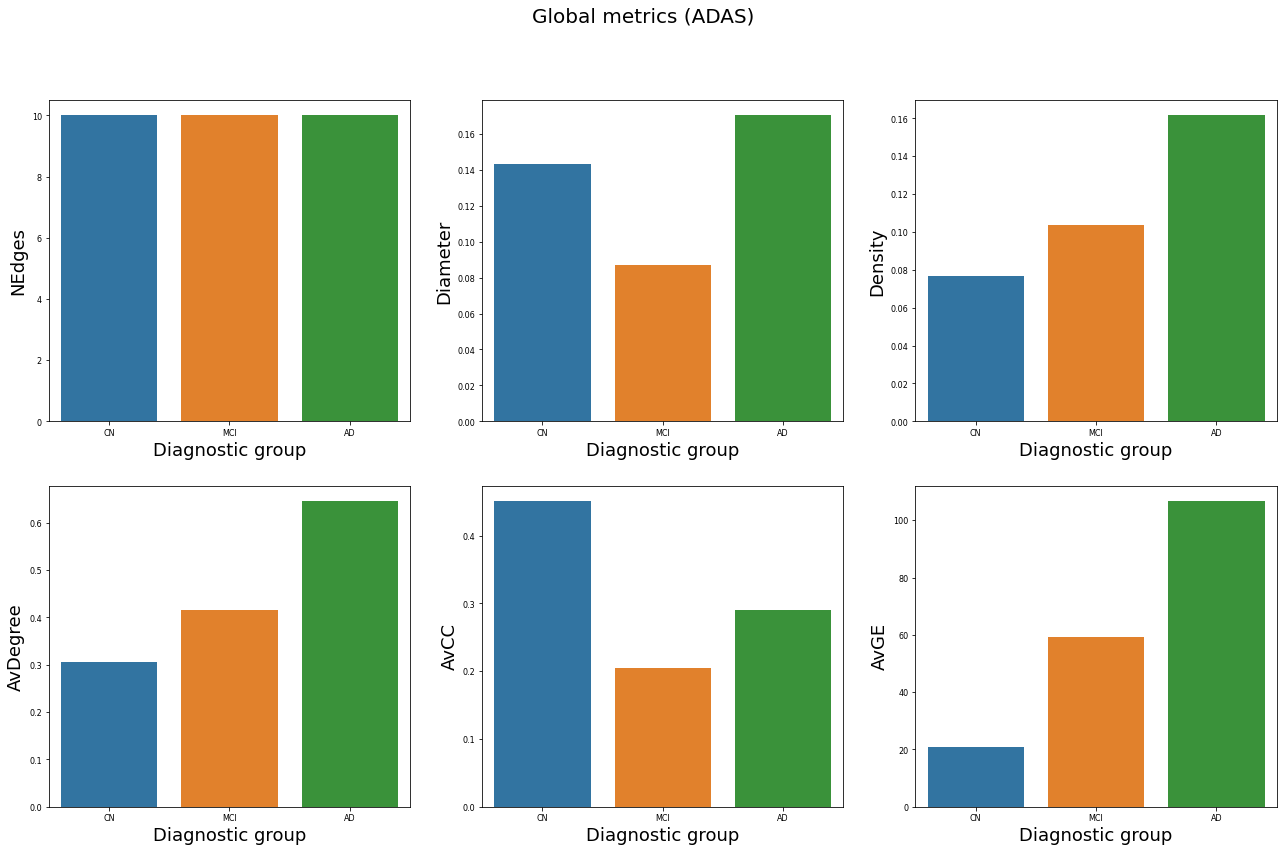

In [371]:
plot_global_metrics(ADAS_gm, 'ADAS')

### 7.2. MMSE

#### 7.2.1. CENTRALITY MEASURES

In [372]:
MMSE_columns = list(X_MMSE.columns)

In [373]:
print("Controls----------------------------------")
CM_MMSE_CN = centrality(MMSE_CN_graph, MMSE_columns)
CM_MMSE_CN.to_csv("./Results/MMSE/CM_CN.csv", sep=";")
display(CM_MMSE_CN)
print("MCI----------------------------------")
CM_MMSE_MCI = centrality(MMSE_MCI_graph, MMSE_columns)
CM_MMSE_MCI.to_csv("./Results/MMSE/CM_MCI.csv", sep=";")
display(CM_MMSE_MCI)
print("AD----------------------------------")
CM_MMSE_AD = centrality(MMSE_AD_graph, MMSE_columns)
CM_MMSE_AD.to_csv("./Results/MMSE/CM_AD.csv", sep=";")
display(CM_MMSE_AD)

Controls----------------------------------


,Degree_Centrality,Closeness_Centrality,Eigenvector_Centrality,Betweenness_Centrality
Attention,0.077184,0.067637,0.564378,0.0
Language,0.041305,0.045582,0.333896,0.5
Memory,0.032209,0.041423,0.239617,0.5
Orientation,0.066839,0.066143,0.538380,0.0
Visuospatial,0.064112,0.064890,0.471933,0.0


MCI----------------------------------


,Degree_Centrality,Closeness_Centrality,Eigenvector_Centrality,Betweenness_Centrality
Attention,0.072110,0.077521,0.496542,0.333333
Language,0.055695,0.060566,0.366323,0.000000
Memory,0.050530,0.062808,0.356817,0.500000
Orientation,0.094578,0.090621,0.563499,0.000000
Visuospatial,0.062210,0.063854,0.417617,0.333333


AD----------------------------------


,Degree_Centrality,Closeness_Centrality,Eigenvector_Centrality,Betweenness_Centrality
Attention,0.092434,0.090803,0.432576,0.000000
Language,0.113958,0.094087,0.546683,0.000000
Memory,0.094859,0.101307,0.434456,0.000000
Orientation,0.102570,0.085429,0.521946,0.333333
Visuospatial,0.048079,0.056843,0.229863,0.500000


#### Plot centrality metrics

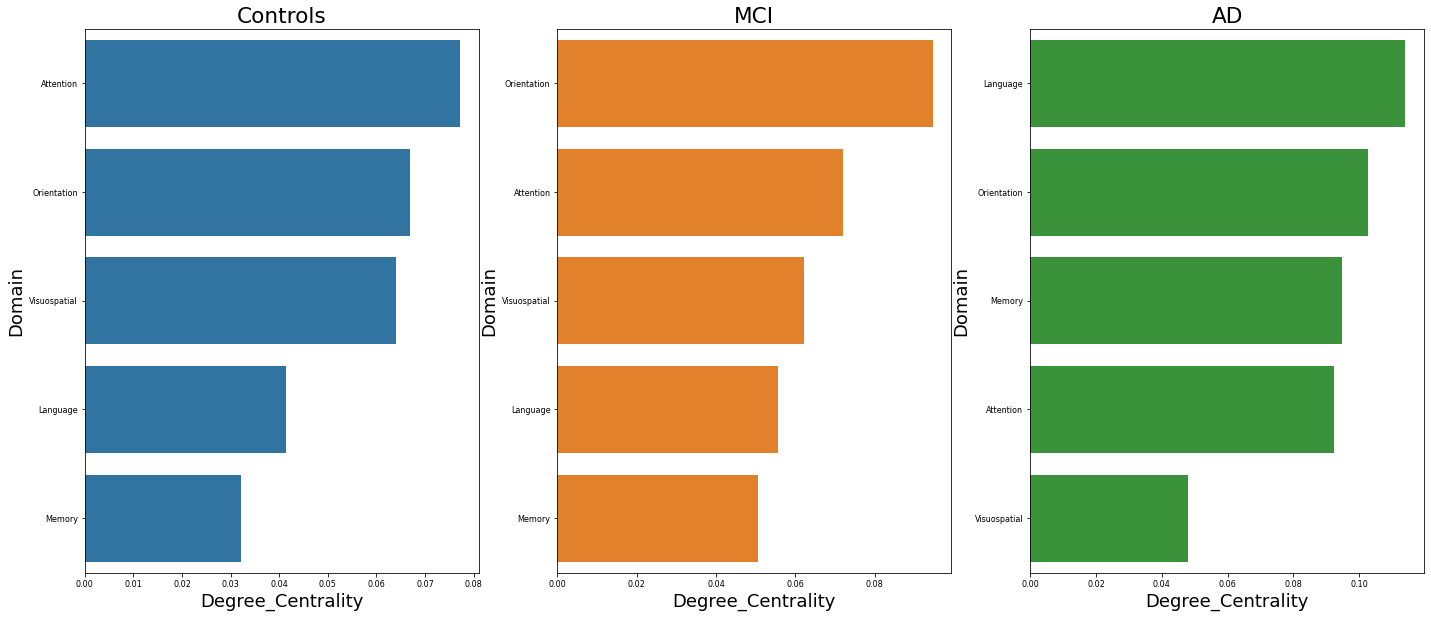

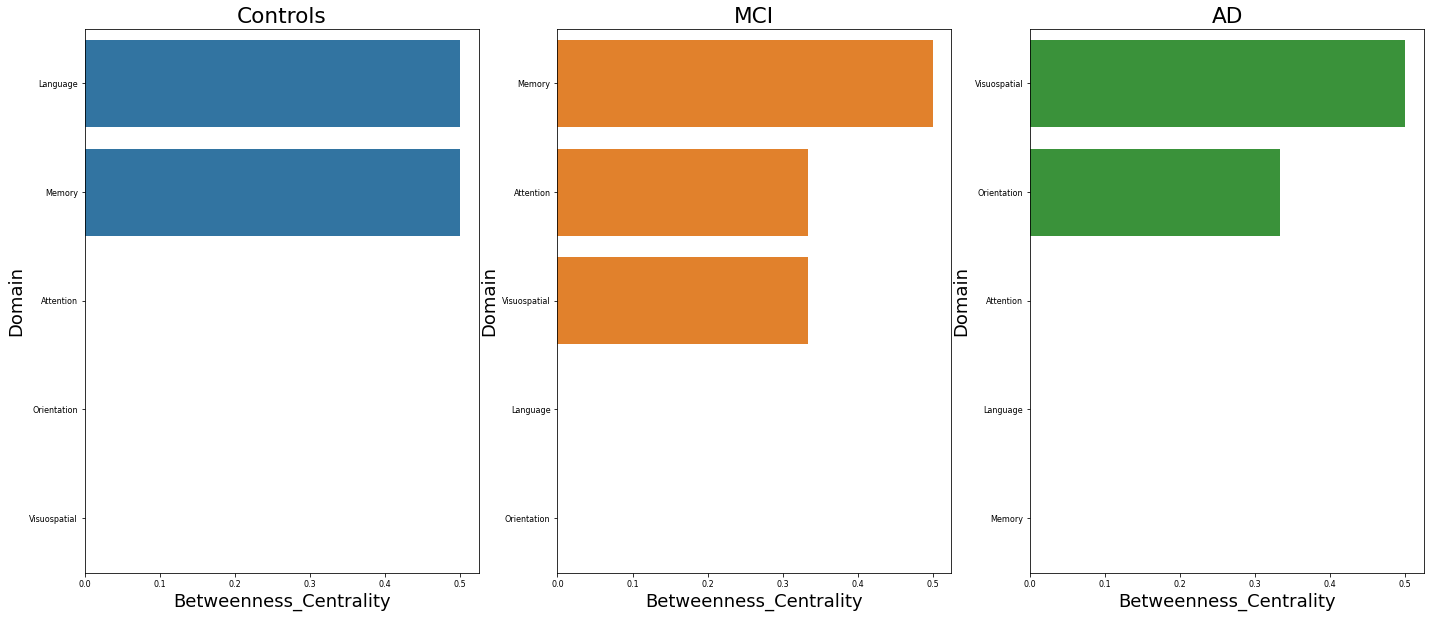

In [145]:
plot_centrality(MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph, MMSE_columns, "Degree_Centrality", 'MMSE')
plot_centrality(MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph, MMSE_columns, "Betweenness_Centrality", 'MMSE')

#### Relation between node degree and betweenness centrality

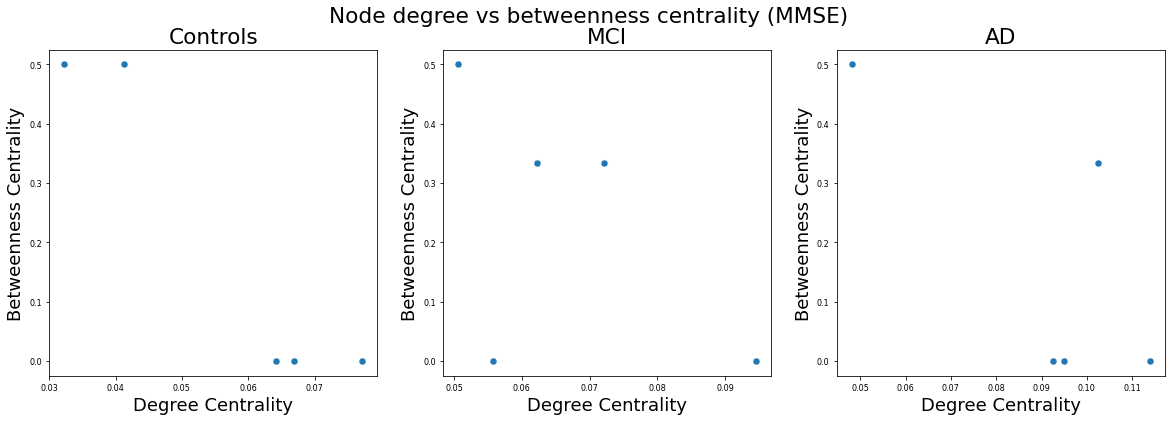

In [146]:
#Get centrality metrics table
MMSE_CN_centrality = centrality(MMSE_CN_graph, MMSE_columns)
MMSE_MCI_centrality = centrality(MMSE_MCI_graph, MMSE_columns)
MMSE_AD_centrality = centrality(MMSE_AD_graph, MMSE_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=MMSE_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=MMSE_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=MMSE_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality (MMSE)')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.savefig("./Results_domains/Figures/Metrics/BCvsDG_MMSE.svg", format="svg")
plt.show()

#### 7.1.2. GLOBAL METRICS

In [147]:
MMSE_gm = global_metrics([MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph])
MMSE_gm.reset_index(inplace=True)
MMSE_gm

,index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE
0,CN,5,10,0.056152,0.05633,0.225319,1.0,0.336327,50.932634
1,MCI,5,10,0.075968,0.067024,0.268098,1.0,0.384713,49.883446
2,AD,5,10,0.113222,0.09038,0.36152,1.0,0.336282,25.101965


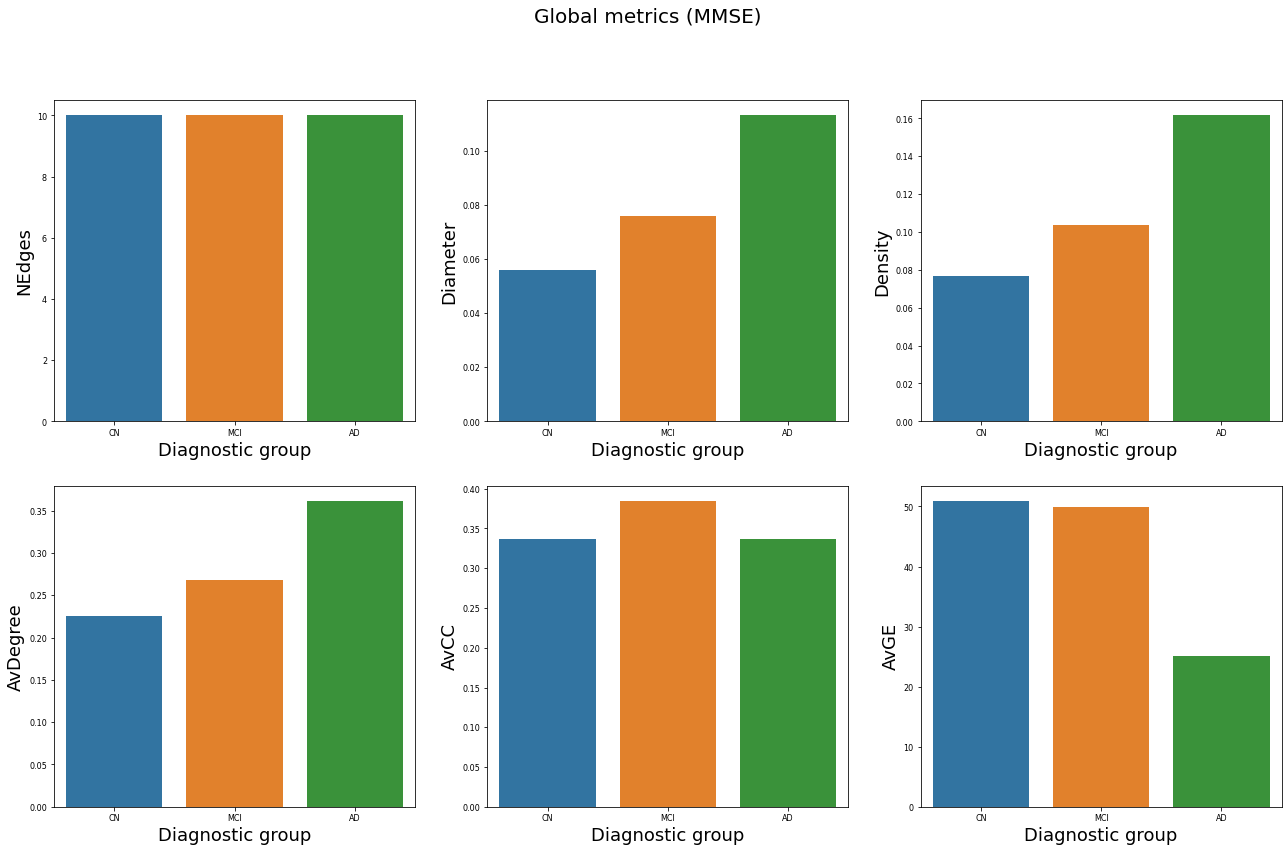

In [148]:
plot_global_metrics(MMSE_gm, 'MMSE')

### 7.3. MoCA

#### 7.1.1. CENTRALITY MEASURES

In [149]:
MOCA_columns = list(X_MOCA.columns)

In [150]:
print("Controls----------------------------------")
CM_MOCA_CN = centrality(MOCA_CN_graph, MOCA_columns)
CM_MOCA_CN.to_csv("./Results/MOCA/CM_CN.csv", sep=";")
display(CM_MOCA_CN)
print("MCI----------------------------------")
CM_MOCA_MCI = centrality(MOCA_MCI_graph, MOCA_columns)
CM_MOCA_MCI.to_csv("./Results/MOCA/CM_MCI.csv", sep=";")
display(CM_MOCA_MCI)
print("AD----------------------------------")
CM_MOCA_AD = centrality(MOCA_AD_graph, MOCA_columns)
CM_MOCA_AD.to_csv("./Results/MOCA/CM_AD.csv", sep=";")
display(CM_MOCA_AD)

Controls----------------------------------


,Degree_Centrality,Closeness_Centrality,Eigenvector_Centrality,Betweenness_Centrality
Attention,0.040856,0.045296,0.202445,0.7
Executive,0.119631,0.089534,0.569538,0.0
Language,0.111091,0.084207,0.540866,0.0
Memory,0.040998,0.045159,0.233196,0.0
Orientation,0.058673,0.065811,0.292407,0.0
Visuospatial,0.078500,0.069131,0.449693,0.3


MCI----------------------------------


,Degree_Centrality,Closeness_Centrality,Eigenvector_Centrality,Betweenness_Centrality
Attention,0.121187,0.105167,0.481685,0.4
Executive,0.100704,0.091517,0.402449,0.0
Language,0.104794,0.110712,0.397121,0.0
Memory,0.123698,0.118943,0.468187,0.0
Orientation,0.043448,0.052753,0.177505,0.8
Visuospatial,0.110841,0.098856,0.444524,0.4


AD----------------------------------


,Degree_Centrality,Closeness_Centrality,Eigenvector_Centrality,Betweenness_Centrality
Attention,0.089117,0.103050,0.293998,0.2
Executive,0.159932,0.129520,0.486100,0.0
Language,0.145007,0.133068,0.472878,0.0
Memory,0.153358,0.143535,0.467190,0.0
Orientation,0.081459,0.083190,0.270564,0.3
Visuospatial,0.126774,0.116219,0.402724,0.3


#### Plot centrality metrics

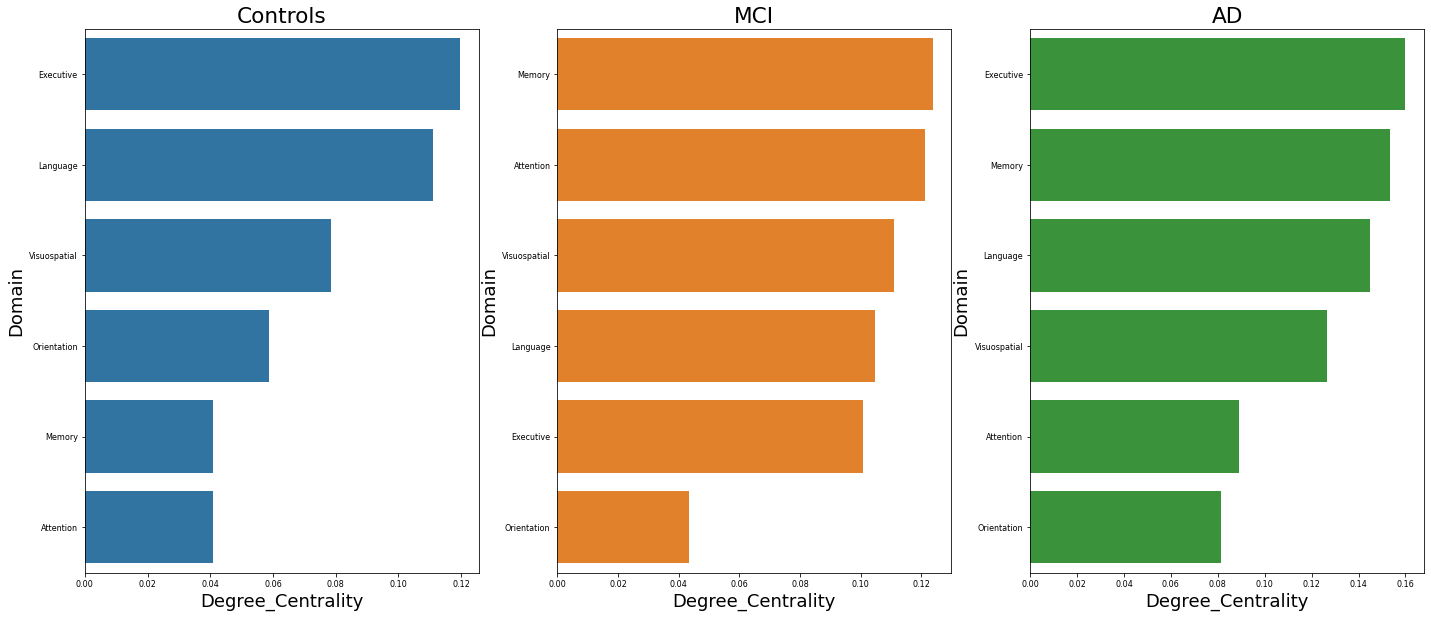

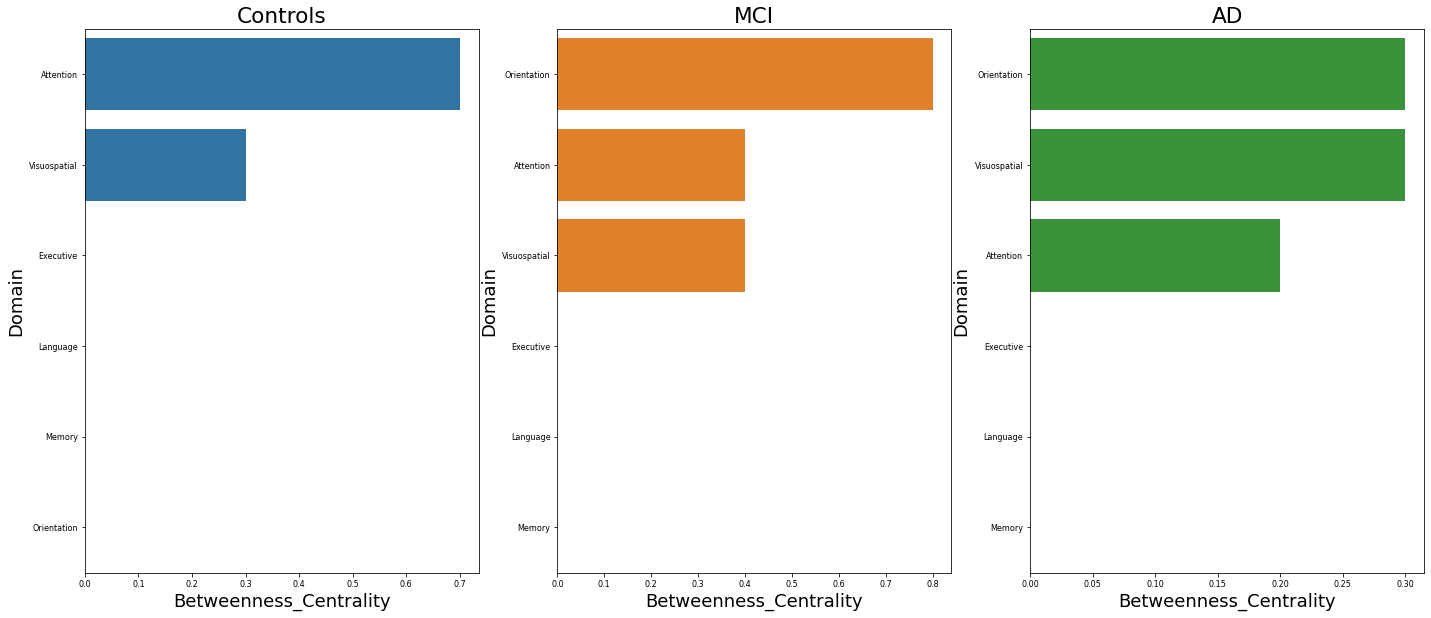

In [151]:
plot_centrality(MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph, MOCA_columns, "Degree_Centrality",'MOCA')
plot_centrality(MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph, MOCA_columns, "Betweenness_Centrality", 'MOCA')

#### Relation between node degree and betweenness centrality

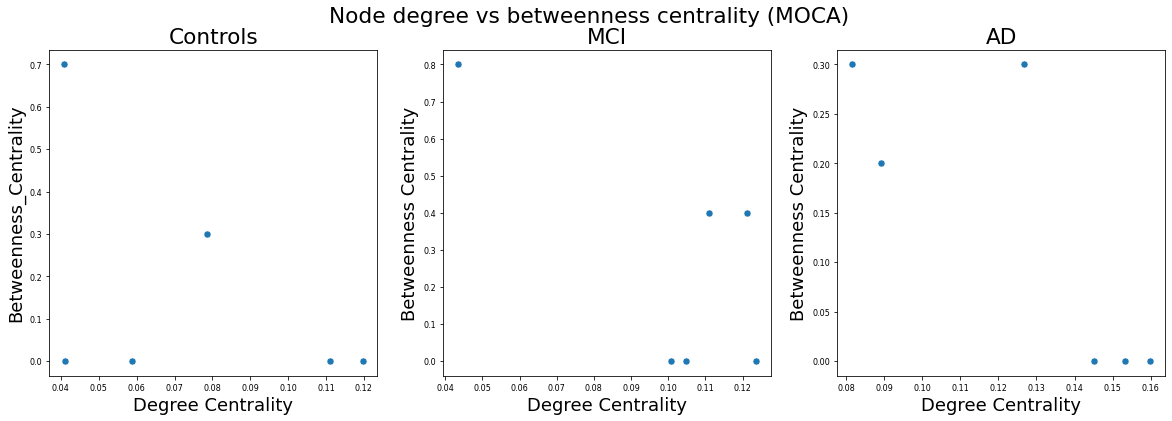

In [152]:
#Get centrality metrics table
MOCA_CN_centrality = centrality(MOCA_CN_graph, MOCA_columns)
MOCA_MCI_centrality = centrality(MOCA_MCI_graph, MOCA_columns)
MOCA_AD_centrality = centrality(MOCA_AD_graph, MOCA_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=MOCA_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=MOCA_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=MOCA_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality (MOCA)')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.savefig("./Results_domains/Figures/Metrics/BCvsDG_MOCA.svg", format="svg")
plt.show()

#### 7.1.2. GLOBAL METRICS

In [153]:
MOCA_gm = global_metrics([MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph])
MOCA_gm.reset_index(inplace=True)
MOCA_gm

,index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE
0,CN,6,15,0.100678,0.074958,0.37479,1.0,0.285216,42.126159
1,MCI,6,15,0.082708,0.100779,0.503894,1.0,0.298448,33.617108
2,AD,6,15,0.161029,0.125941,0.629704,1.0,0.350212,13.9112


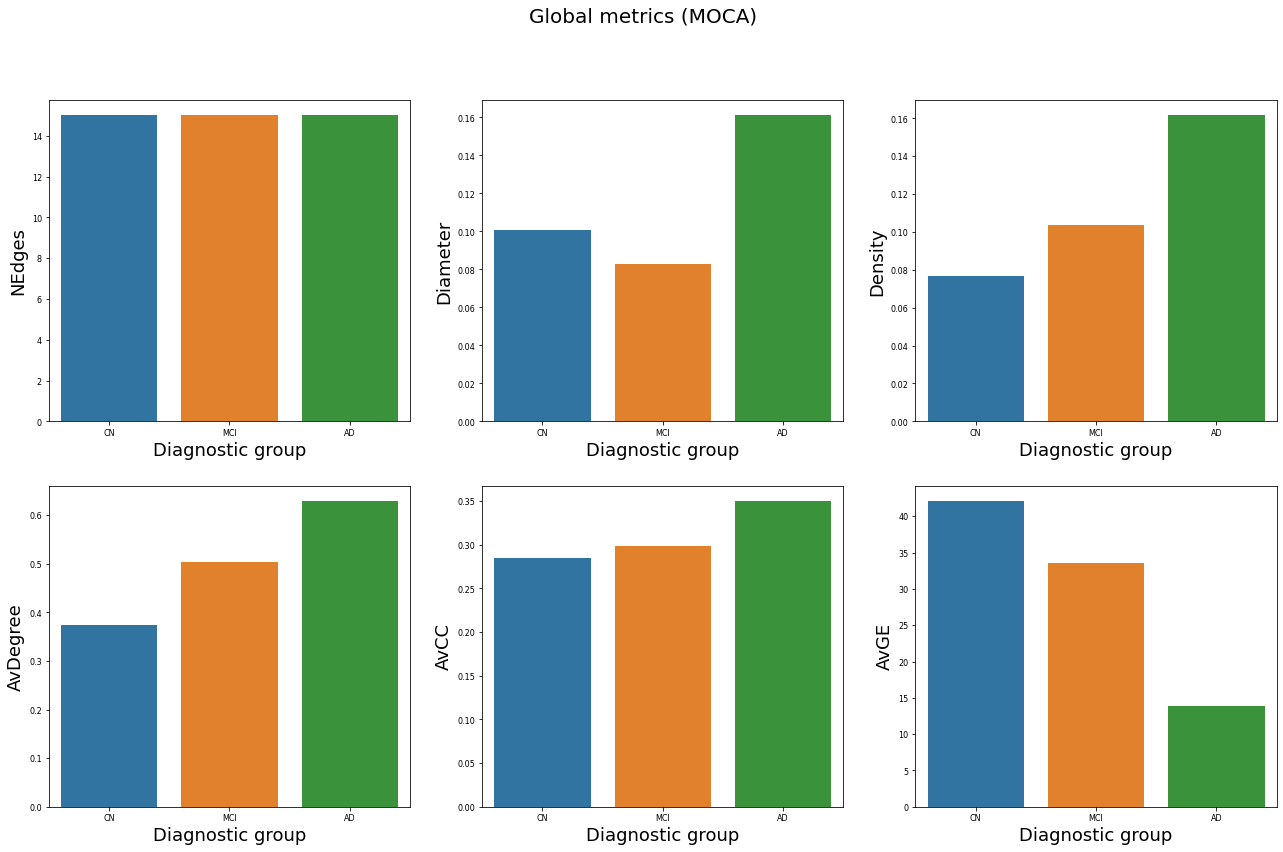

In [154]:
plot_global_metrics(MOCA_gm, 'MOCA')

### 7.6. NEUROBAT

#### 7.6.1. CENTRALITY MEASURES

In [155]:
NEUROBAT_columns = list(X_NEUROBAT.columns)

In [156]:
print("Controls----------------------------------")
CM_NEUROBAT_CN = centrality(NEUROBAT_CN_graph, NEUROBAT_columns)
CM_NEUROBAT_CN.to_csv("./Results/NEUROBAT/CM_CN.csv", sep=";")
display(CM_NEUROBAT_CN)
print("MCI----------------------------------")
CM_NEUROBAT_MCI = centrality(NEUROBAT_MCI_graph, NEUROBAT_columns)
CM_NEUROBAT_MCI.to_csv("./Results/NEUROBAT/CM_MCI.csv", sep=";")
display(CM_NEUROBAT_MCI)
print("AD----------------------------------")
CM_NEUROBAT_AD = centrality(NEUROBAT_AD_graph, NEUROBAT_columns)
CM_NEUROBAT_AD.to_csv("./Results/NEUROBAT/CM_AD.csv", sep=";")
display(CM_NEUROBAT_AD)

Controls----------------------------------


,Degree_Centrality,Closeness_Centrality,Eigenvector_Centrality,Betweenness_Centrality
Executive,0.092405,0.110425,0.376480,0.666667
Language,0.215312,0.205907,0.662155,0.000000
Memory,0.094909,0.127410,0.406327,0.666667
Visuospatial,0.123931,0.135533,0.504690,0.000000


MCI----------------------------------


,Degree_Centrality,Closeness_Centrality,Eigenvector_Centrality,Betweenness_Centrality
Executive,0.132897,0.118813,0.458093,0.000000
Language,0.197345,0.177127,0.605790,0.000000
Memory,0.085891,0.109401,0.312252,0.666667
Visuospatial,0.160659,0.165454,0.570674,0.000000


AD----------------------------------


,Degree_Centrality,Closeness_Centrality,Eigenvector_Centrality,Betweenness_Centrality
Executive,0.176169,0.159115,0.515018,0.333333
Language,0.204474,0.199523,0.542908,0.000000
Memory,0.131437,0.130436,0.396716,0.333333
Visuospatial,0.186136,0.165775,0.531624,0.000000


#### Plot centrality metrics

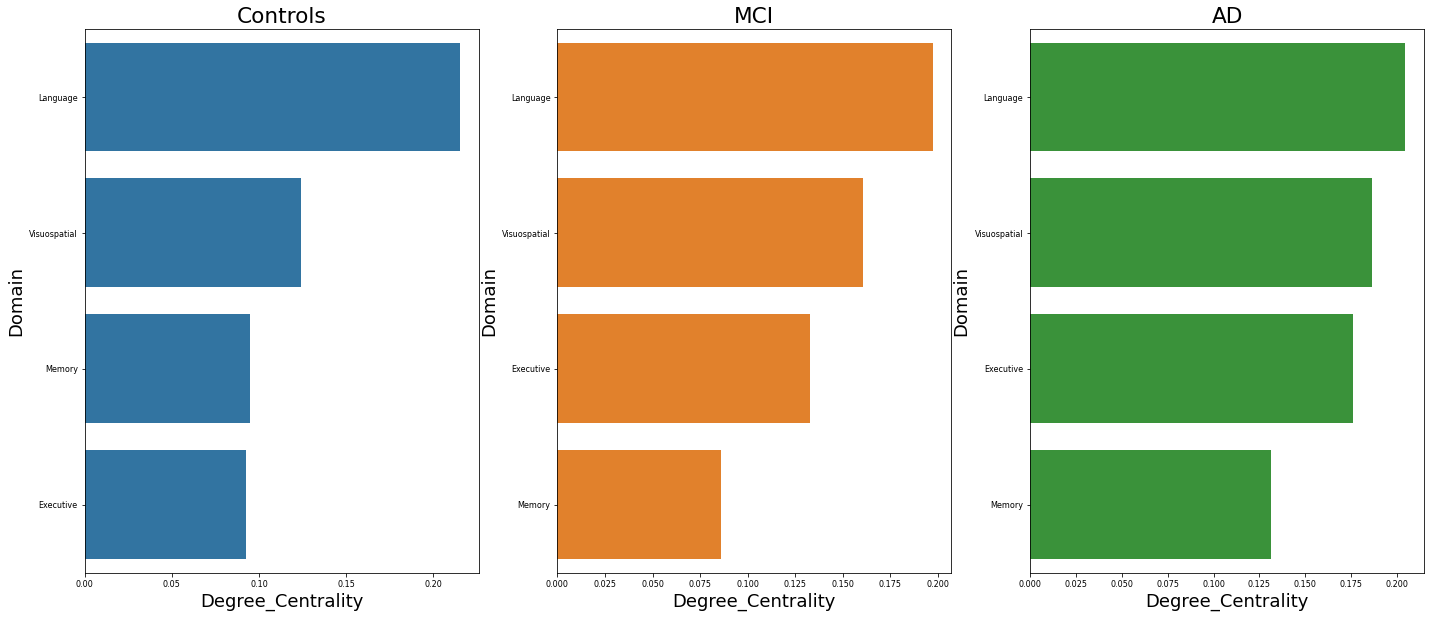

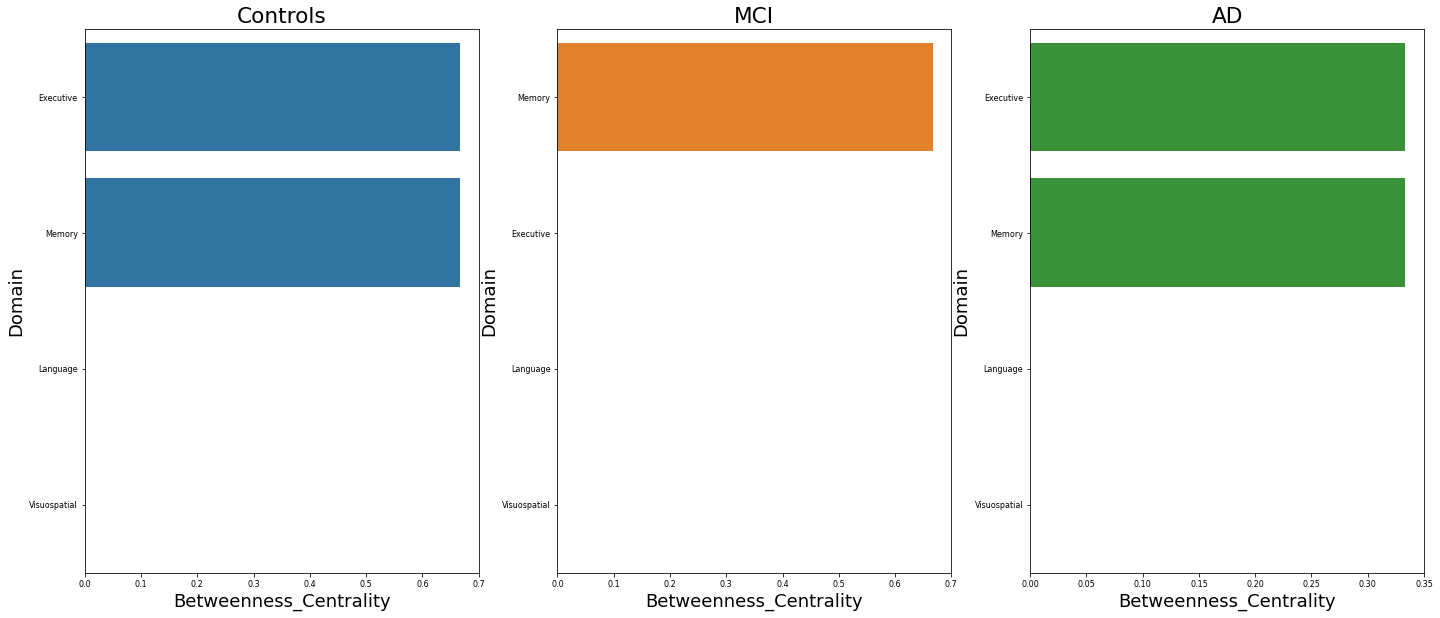

In [157]:
plot_centrality(NEUROBAT_CN_graph, NEUROBAT_MCI_graph, NEUROBAT_AD_graph, NEUROBAT_columns, "Degree_Centrality", 'NEUROBAT')
plot_centrality(NEUROBAT_CN_graph, NEUROBAT_MCI_graph, NEUROBAT_AD_graph, NEUROBAT_columns, "Betweenness_Centrality", 'NEUROBAT')

#### Relation between node degree and betweenness centrality

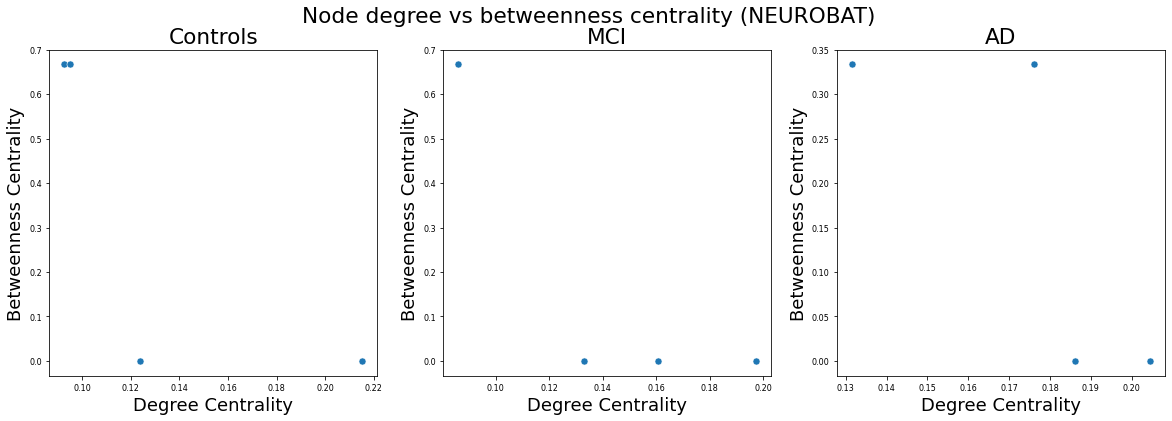

In [158]:
#Get centrality metrics table
NEUROBAT_CN_centrality = centrality(NEUROBAT_CN_graph, NEUROBAT_columns)
NEUROBAT_MCI_centrality = centrality(NEUROBAT_MCI_graph, NEUROBAT_columns)
NEUROBAT_AD_centrality = centrality(NEUROBAT_AD_graph, NEUROBAT_columns)

#Plot
fig, axes = plt.subplots(1,3, figsize=(20,6))


sns.scatterplot(ax=axes[0],data=NEUROBAT_CN_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[1],data=NEUROBAT_MCI_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)
sns.scatterplot(ax=axes[2],data=NEUROBAT_AD_centrality, x="Degree_Centrality", y="Betweenness_Centrality", s=50)

#labels
axes[0].set_ylabel("Betweenness Centrality")
axes[1].set_ylabel("Betweenness Centrality")
axes[2].set_ylabel("Betweenness Centrality")
axes[0].set_xlabel("Degree Centrality")
axes[1].set_xlabel("Degree Centrality")
axes[2].set_xlabel("Degree Centrality")

#add title
fig.suptitle('Node degree vs betweenness centrality (NEUROBAT)')

#add title to subfigures
axes[0].title.set_text("Controls")
axes[1].title.set_text("MCI")
axes[2].title.set_text("AD")

plt.savefig("./Results_domains/Figures/Metrics/BCvsDG_NEUROBAT.svg", format="svg")
plt.show()

#### 7.1.2. GLOBAL METRICS

In [159]:
NEUROBAT_gm = global_metrics([NEUROBAT_CN_graph, NEUROBAT_MCI_graph, NEUROBAT_AD_graph])
NEUROBAT_gm.reset_index(inplace=True)
NEUROBAT_gm

,index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE
0,CN,4,6,0.220676,0.131639,0.394918,1.0,0.393994,16.47045
1,MCI,4,6,0.175999,0.144198,0.432594,1.0,0.364277,37.009591
2,AD,4,6,0.23778,0.174554,0.523662,1.0,0.534611,8.434105


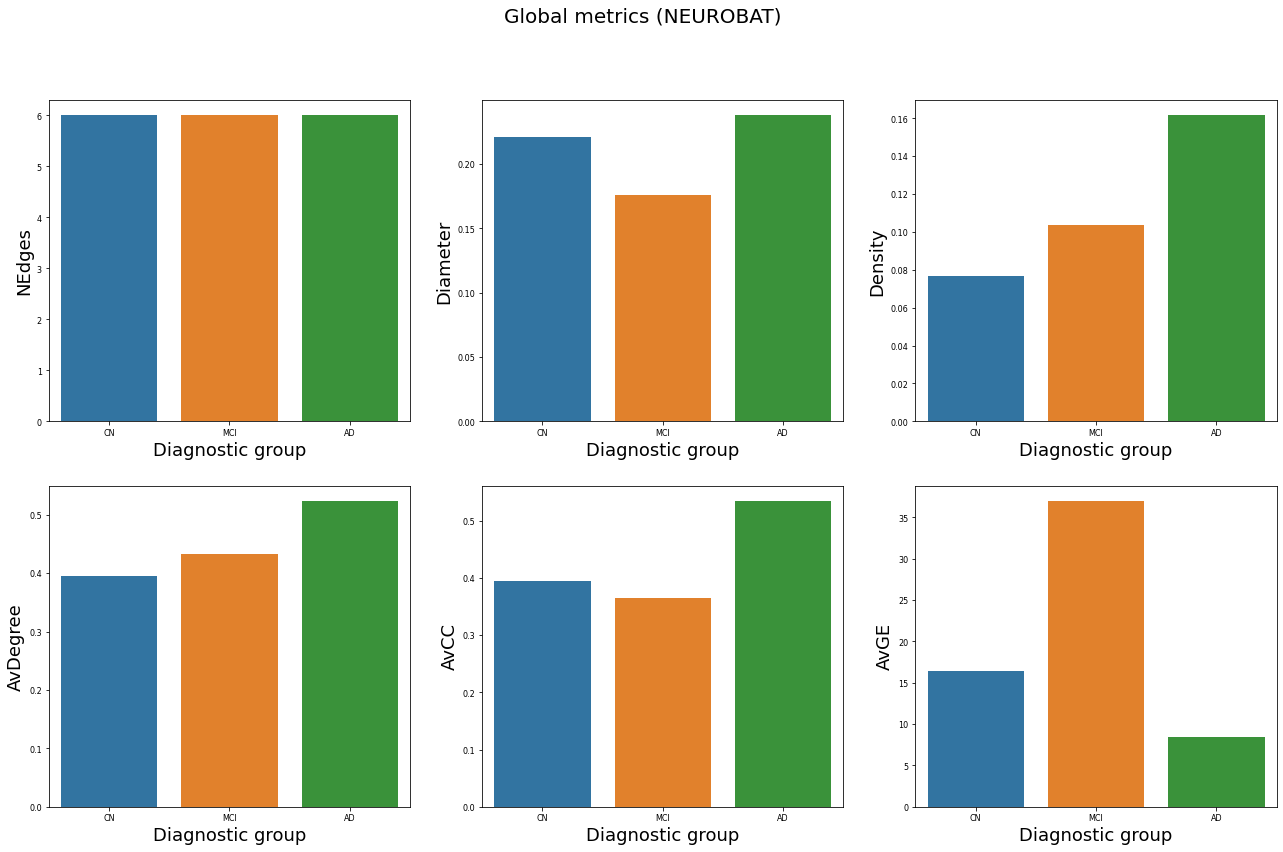

In [160]:
plot_global_metrics(NEUROBAT_gm, 'NEUROBAT')

## 8. COMMUNITY DETECTION

In [161]:
import networkx.algorithms.community as nx_comm

#### 1. PARTITIONS

#### 1.1. Louvain algorithm:

**Louvain Community Detection Algorithm** is a simple method to extract the community structure of a network. This is a heuristic method based on modularity optimization. 

The community structure of a network indexes the sub-division of such a network into segregated communities ormodules that contribute to the same processes while alsoallowing for a visual inspection of the network

Note that the order in which the nodes are considered can affect the final output. In the algorithm the ordering happens using a random shuffle. 

- In the epilepsy paper they calculated modularity 1,000 times for each group, and the highest proportion was chosen as the number of modules in that group. 

- Furthermore, in order to be certain regarding the module assignment for each node, they created a script that calculated the proportion of module assignment for each node in order to have each node assigned to the module with the highest probability. 

#### 1.2. Greedy modularity algorithm

This function uses **Clauset-Newman-Moore greedy modularity maximization** to find the community partition with the largest modularity.

Greedy modularity maximization begins with each node in its own community and repeatedly joins the pair of communities that lead to the largest modularity until no further increase in modularity is possible (a maximum).

#### 1.3. Kernighan-Lin bisection algorithm

This function uses **Kernighan-Lin bipartition algorithm** to partition a graph into two blocks.

This algorithm partitions a network into two sets by iteratively swapping pairs of nodes to reduce the edge cut between the two sets. The pairs are chosen according to a modified form of Kernighan-Lin, which moves node individually, alternating between sides to keep the bisection balanced.

#### 1.4. Asynchronous label propagation algorithm

This function uses the **asynchronous label propagation algorithm** which is probabilistic and the found communities may vary on different executions.

The algorithm proceeds as follows. After initializing each node with a unique label, the algorithm repeatedly sets the label of a node to be the label that appears most frequently among that nodes neighbors. The algorithm halts when each node has the label that appears most frequently among its neighbors. The algorithm is asynchronous because each node is updated without waiting for updates on the remaining nodes.

In [162]:
def community_detection(graphs_ls, algorithm):
    
    print("--------------------------------")
    print(algorithm, "algorithm")
    print("--------------------------------")
      
    partition_ls = []
    dx_ls = ['CN', 'MCI', 'AD']
    
    for i in range(len(graphs_ls)):
        if algorithm == "Louvain": 
            partition = nx_comm.louvain_communities(graphs_ls[i], weight='weight',seed=0)
            
        elif algorithm == "Greedy":
            partition = nx_comm.greedy_modularity_communities(graphs_ls[i], weight='weight')
        
        elif algorithm == "Bisection":
            partition = nx_comm.kernighan_lin_bisection(graphs_ls[i], weight='weight', seed=0)
            
        elif algorithm == "Label Propagation":
            partition = list(nx_comm.asyn_lpa_communities(graphs_ls[i], weight='weight', seed=0))
        
        else:
            print("This algorithm is not implemented. Please, try again.")
            break
            
        partition_ls.append(partition) #partitions
        print(dx_ls[i], ": ", partition)
        
        MI = nx_comm.modularity(graphs_ls[i], partition, weight='weight') #modularity index  
        print("Modularity Index: ", MI, "\n")
    
    return partition_ls

#### 2. DRAW GRAPH BY COMMUNITIES

In [163]:
def color_communities(graph, partition):
    
    colors = {} #create empty node dictionary
    
    #Convert set of partitions into node dictionary
    for i in range(len(partition)): #iterate for each group
        for node in partition[i]:
            colors[node] = i
            
    #Sort dictionary by keys
    node_list = list(colors.keys())
    node_list.sort()
    sorted_colors = {i: colors[i] for i in node_list}
            
    return list(sorted_colors.values())

In [164]:
def draw_graph_communities(graphs_ls, partition_ls, test_labels, pos, battery_name, algorithm):

    #Plot
    fig, axes = plt.subplots(1,3, figsize=(20,6))
    
    for i in range(len(graphs_ls)):
        
        graph = graphs_ls[i]
        partition = partition_ls[i]
        
        #node colors
        colors = color_communities(graph, partition)

        #get edges weights
        weights = list(nx.get_edge_attributes(graph,'weight').values())
        
        if test_labels is not None: 
            nx.draw(ax=axes[i], G=graph, pos=pos, labels=test_labels, with_labels=True, node_color=colors, cmap= plt.cm.Spectral,
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
        
        else:
            nx.draw(ax=axes[i], G=graph, pos=pos, with_labels=True, node_color=colors, cmap= plt.cm.Spectral,
                   edge_color=weights, edge_cmap=plt.cm.Greys, width=[ x*10 for x in weights])
    

    #add title to subfigures
    fig.suptitle(algorithm + " (" + battery_name +")", fontsize=20)
    axes[0].title.set_text("Controls")
    axes[1].title.set_text("MCI")
    axes[2].title.set_text("AD")
    
    figure_path = "./Results_domains/Figures/Modularity/"+ battery_name + "/"+ algorithm +".svg"

    plt.savefig(figure_path, format="svg")
    plt.show()

#### 3. COMMUNITY SUBGRAPH METRICS

Each community detected by an algorithm is going to be considered as a subgraph. 

In [165]:
def metrics(graph):
    """Function to create a dictionary with all the metrics computed for a community"""
    
    metrics_dict = {}
    
    #GLOBAL METRICS
    #Compute the number of nodes 
    metrics_dict['NNodes'] = graph.number_of_nodes()
    #Compute the number of edges 
    metrics_dict['NEdges'] = graph.number_of_edges()
    #Compute the diameter of the graph
    shortest = nx.shortest_path_length(graph, weight="weight")
    ecc = nx.eccentricity(graph, sp=dict(shortest))
    metrics_dict['Diameter'] = nx.diameter(graph, e=ecc)
    #Compute the density of the graph
    metrics_dict['Density'] = nx.density(graph)
    #Compute the average degree of the network  
    metrics_dict['AvDegree'] = sum(dict(graph.degree(weight='weight')).values())/graph.number_of_nodes()
    #Compute the transitivity of the graph
    metrics_dict['Transitivity'] = nx.transitivity(graph)
    #Compute the average clustering coefficient
    metrics_dict['AvCC'] = nx.average_clustering(graph,weight='weight')
    #Compute the average global efficiency (shortest path)
    #metrics_dict['AvGE'] = nx.global_efficiency(graph)
    metrics_dict['AvGE'] = global_efficiency_weighted(graph)
    
    #TESTS BELONGING TO THE COMMUNITY
    metrics_dict['Domains'] = list(dict(graph.nodes(data="Cognitive Domain")).values())
    
    return metrics_dict

In [166]:
def community_metrics(graph, partition):
    
    """Function to create a dataframe with all the metrics computed for each of the communities"""
    
    domains_list = list(dict(graph.nodes(data="Cognitive Domain")).values())
    domains = [*set(domains_list)] #unique list of domains
    
    df = pd.DataFrame(columns = ['Index','NNodes', 'NEdges', 'Diameter', 'Density', 'AvDegree', 
                                 'Transitivity','AvCC', 'AvGE', 'Domains'] + domains) #empty dataframe
    
    for i in range(len(partition)): #iterate for each community
        #create subgraph for this community
        subgraph = graph.subgraph(partition[i]) 
        #compute metrics for the subgraph 
        metrics_dict = metrics(subgraph)
        
        #community index
        metrics_dict['Index'] = i
        
        #representation of each neurocognitive domain
        domains_list_community = list(dict(subgraph.nodes(data="Cognitive Domain")).values())
        
        for domain in domains: 
            #domain_count_total = domains_list.count(domain)
            domain_count_community = domains_list_community.count(domain)
            domain_count_total = len(domains_list_community)
            metrics_dict[domain] = domain_count_community/domain_count_total #percentage of representation 
        
        #introduce metrics in new row
        df = df.append(metrics_dict, ignore_index=True)
        
    return df

### 8.1. ADAS-Cog

In [167]:
graphs_ls = [ADAS_CN_graph, ADAS_MCI_graph, ADAS_AD_graph]

#### 8.1.1. LOUVAIN ALGORITHM

In [168]:
ADAS_Louvain_partitions = community_detection(graphs_ls, "Louvain")

--------------------------------
Louvain algorithm
--------------------------------
CN :  [{0, 1, 2, 3, 4}]
Modularity Index:  2.220446049250313e-16 

MCI :  [{1, 2, 3}, {0, 4}]
Modularity Index:  0.05198246508008224 

AD :  [{1, 2}, {0, 3, 4}]
Modularity Index:  0.10898063348680315 



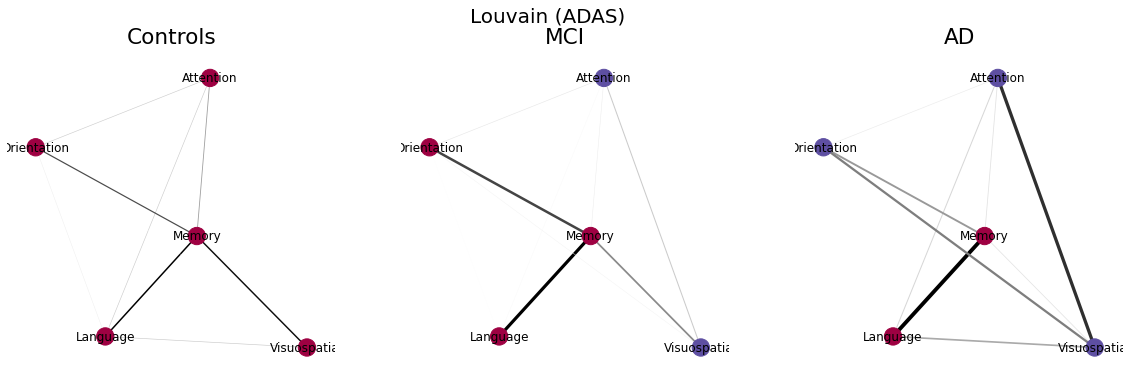

In [169]:
draw_graph_communities(graphs_ls, ADAS_Louvain_partitions, ADAS_labels, pos_ADAS, 'ADAS', 'Louvain')

#### Subgraph metrics

In [170]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(ADAS_Louvain_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], ADAS_Louvain_partitions[i]))

CN ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,5,10,0.143313,1.0,0.306172,1.0,0.451303,20.905119,"[Attention, Language, Memory, Orientation, Vis...",0.2,0.2,0.2,0.2,0.2


MCI ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,3,3,0.260672,1.0,0.386606,1.0,0.279769,40.214455,"[Language, Memory, Orientation]",0.0,0.333333,0.333333,0.0,0.333333
1,1,2,1,0.102909,1.0,0.102909,0,0.0,9.71736,"[Attention, Visuospatial]",0.5,0.0,0.0,0.5,0.0


AD ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,2,1,0.386141,1.0,0.386141,0,0.0,2.58973,"[Language, Memory]",0.0,0.0,0.5,0.0,0.5
1,1,3,3,0.286714,1.0,0.409213,1.0,0.50377,8.149036,"[Attention, Orientation, Visuospatial]",0.333333,0.333333,0.0,0.333333,0.0


#### 8.1.2. GREEDY ALGORITHM

In [171]:
ADAS_Greedy_partitions = community_detection(graphs_ls, "Greedy")

--------------------------------
Greedy algorithm
--------------------------------
CN :  [frozenset({0, 1, 2, 3, 4})]
Modularity Index:  2.220446049250313e-16 

MCI :  [frozenset({1, 2, 3}), frozenset({0, 4})]
Modularity Index:  0.05198246508008224 

AD :  [frozenset({0, 3, 4}), frozenset({1, 2})]
Modularity Index:  0.10898063348680315 



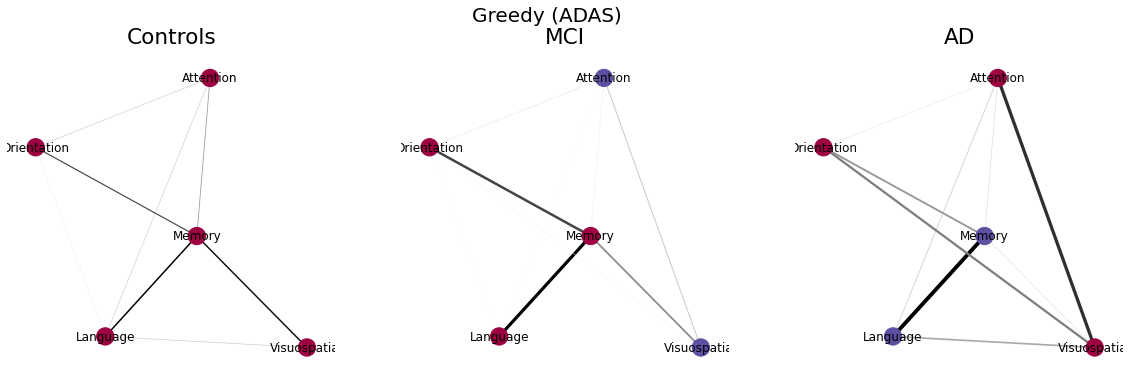

In [172]:
draw_graph_communities(graphs_ls, ADAS_Greedy_partitions, ADAS_labels, pos_ADAS, 'ADAS', 'Greedy')

#### Subgraph metrics

In [173]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(ADAS_Greedy_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], ADAS_Greedy_partitions[i]))

CN ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,5,10,0.143313,1.0,0.306172,1.0,0.451303,20.905119,"[Attention, Language, Memory, Orientation, Vis...",0.2,0.2,0.2,0.2,0.2


MCI ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,3,3,0.260672,1.0,0.386606,1.0,0.279769,40.214455,"[Language, Memory, Orientation]",0.0,0.333333,0.333333,0.0,0.333333
1,1,2,1,0.102909,1.0,0.102909,0,0.0,9.71736,"[Attention, Visuospatial]",0.5,0.0,0.0,0.5,0.0


AD ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,3,3,0.286714,1.0,0.409213,1.0,0.50377,8.149036,"[Attention, Orientation, Visuospatial]",0.333333,0.333333,0.0,0.333333,0.0
1,1,2,1,0.386141,1.0,0.386141,0,0.0,2.58973,"[Language, Memory]",0.0,0.0,0.5,0.0,0.5


#### 8.1.3. BISECTION ALGORITHM

In [174]:
ADAS_Bisection_partitions = community_detection(graphs_ls, "Bisection")

--------------------------------
Bisection algorithm
--------------------------------
CN :  ({0, 3}, {1, 2, 4})
Modularity Index:  -0.02957603033928219 

MCI :  ({0, 4}, {1, 2, 3})
Modularity Index:  0.05198246508008224 

AD :  ({1, 2}, {0, 3, 4})
Modularity Index:  0.10898063348680315 



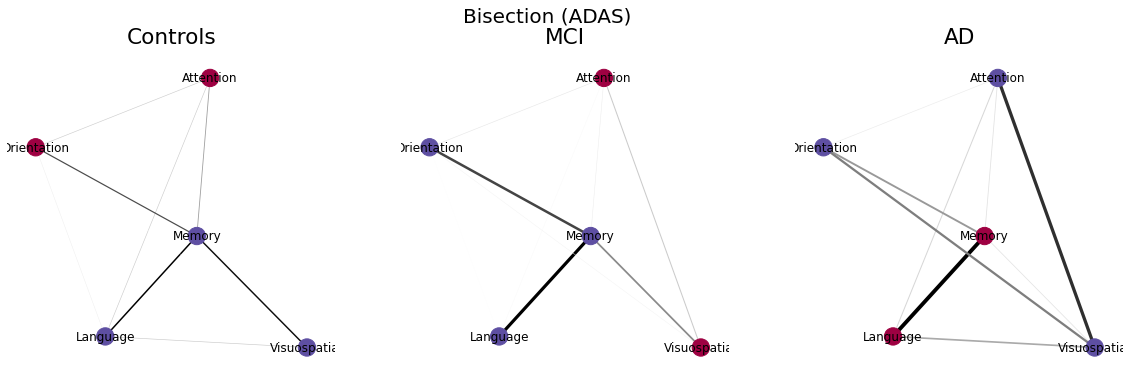

In [175]:
draw_graph_communities(graphs_ls, ADAS_Bisection_partitions, ADAS_labels, pos_ADAS, 'ADAS', 'Bisection')

#### Subgraph metrics

In [176]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(ADAS_Bisection_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], ADAS_Bisection_partitions[i]))

CN ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,2,1,0.06028,1.0,0.06028,0,0.0,16.589139,"[Attention, Orientation]",0.5,0.5,0.0,0.0,0.0
1,1,3,3,0.150113,1.0,0.238335,1.0,0.737582,9.865994,"[Language, Memory, Visuospatial]",0.0,0.0,0.333333,0.333333,0.333333


MCI ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,2,1,0.102909,1.0,0.102909,0,0.0,9.71736,"[Attention, Visuospatial]",0.5,0.0,0.0,0.5,0.0
1,1,3,3,0.260672,1.0,0.386606,1.0,0.279769,40.214455,"[Language, Memory, Orientation]",0.0,0.333333,0.333333,0.0,0.333333


AD ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,2,1,0.386141,1.0,0.386141,0,0.0,2.58973,"[Language, Memory]",0.0,0.0,0.5,0.0,0.5
1,1,3,3,0.286714,1.0,0.409213,1.0,0.50377,8.149036,"[Attention, Orientation, Visuospatial]",0.333333,0.333333,0.0,0.333333,0.0


#### 8.1.4. LABEL PROPAGATION ALGORITHM

In [177]:
ADAS_Label_partitions = community_detection(graphs_ls, "Label Propagation")

--------------------------------
Label Propagation algorithm
--------------------------------
CN :  [{0, 1, 2, 3, 4}]
Modularity Index:  2.220446049250313e-16 

MCI :  [{0, 1, 2, 3, 4}]
Modularity Index:  0.0 

AD :  [{0, 3, 4}, {1, 2}]
Modularity Index:  0.10898063348680315 



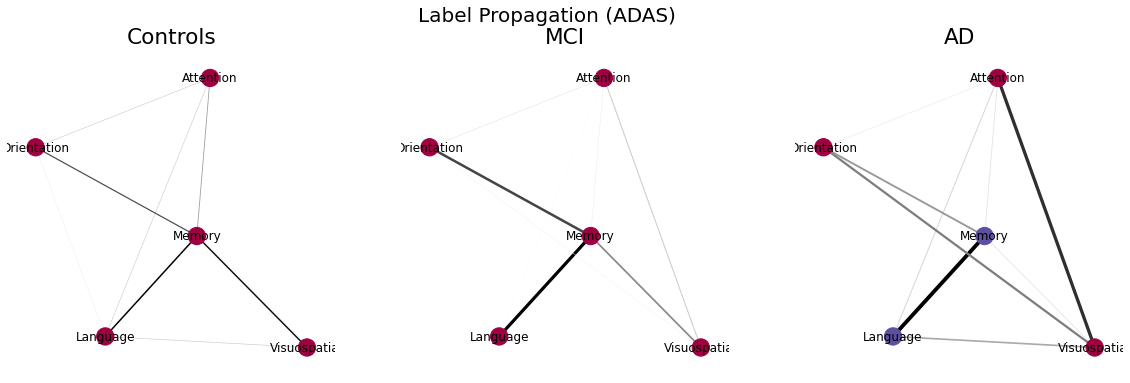

In [178]:
draw_graph_communities(graphs_ls, ADAS_Label_partitions, ADAS_labels, pos_ADAS, 'ADAS', 'Label Propagation')

#### Subgraph metrics

In [179]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(ADAS_Label_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], ADAS_Label_partitions[i]))

CN ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,5,10,0.143313,1.0,0.306172,1.0,0.451303,20.905119,"[Attention, Language, Memory, Orientation, Vis...",0.2,0.2,0.2,0.2,0.2


MCI ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,5,10,0.086749,1.0,0.415433,1.0,0.205199,59.394777,"[Attention, Language, Memory, Orientation, Vis...",0.2,0.2,0.2,0.2,0.2


AD ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,3,3,0.286714,1.0,0.409213,1.0,0.50377,8.149036,"[Attention, Orientation, Visuospatial]",0.333333,0.333333,0.0,0.333333,0.0
1,1,2,1,0.386141,1.0,0.386141,0,0.0,2.58973,"[Language, Memory]",0.0,0.0,0.5,0.0,0.5


### 8.2. MMSE

In [180]:
graphs_ls = [MMSE_CN_graph, MMSE_MCI_graph, MMSE_AD_graph]

#### 8.2.1. LOUVAIN ALGORITHM

In [181]:
MMSE_Louvain_partitions = community_detection(graphs_ls, "Louvain")

--------------------------------
Louvain algorithm
--------------------------------
CN :  [{0, 1, 3}, {2, 4}]
Modularity Index:  0.035036845268457184 

MCI :  [{1, 2, 3}, {0, 4}]
Modularity Index:  0.05640184757813735 

AD :  [{0, 2, 4}, {1, 3}]
Modularity Index:  0.031302112681658445 



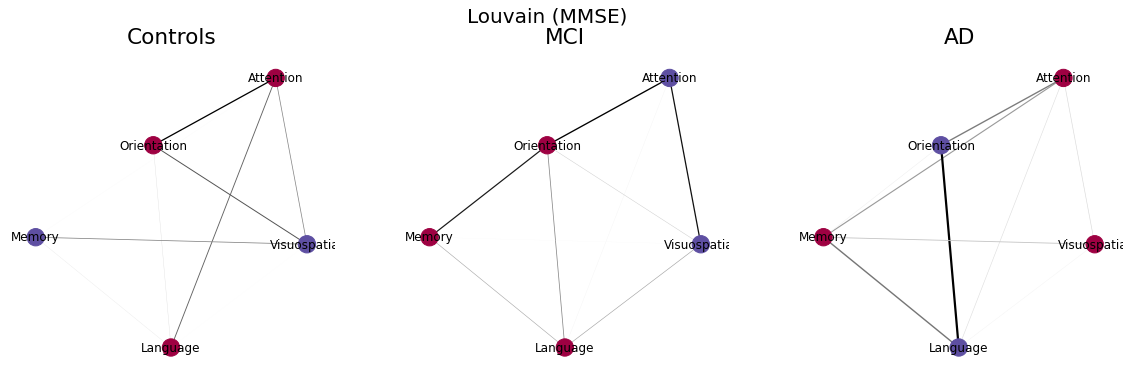

In [182]:
test_labels = None

draw_graph_communities(graphs_ls, MMSE_Louvain_partitions, MMSE_labels, pos_MMSE, 'MMSE', 'Louvain')

#### Subgraph metrics

In [183]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MMSE_Louvain_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MMSE_Louvain_partitions[i]))

CN ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,3,3,0.125425,1.0,0.169176,1.0,0.578143,15.792845,"[Attention, Language, Orientation]",0.333333,0.333333,0.333333,0.0,0.0
1,1,2,1,0.07575,1.0,0.07575,0,0.0,13.201364,"[Memory, Visuospatial]",0.0,0.0,0.0,0.5,0.5


MCI ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,3,3,0.122568,1.0,0.173027,1.0,0.675687,12.571449,"[Language, Memory, Orientation]",0.0,0.333333,0.333333,0.0,0.333333
1,1,2,1,0.126574,1.0,0.126574,0,0.0,7.900518,"[Attention, Visuospatial]",0.5,0.0,0.0,0.5,0.0


AD ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,3,3,0.113222,1.0,0.172888,1.0,0.741441,12.265234,"[Attention, Memory, Visuospatial]",0.333333,0.0,0.0,0.333333,0.333333
1,1,2,1,0.221645,1.0,0.221645,0,0.0,4.511711,"[Language, Orientation]",0.0,0.5,0.5,0.0,0.0


#### 8.2.2. GREEDY ALGORITHM

In [184]:
MMSE_Greedy_partitions = community_detection(graphs_ls, "Greedy")

--------------------------------
Greedy algorithm
--------------------------------
CN :  [frozenset({0, 1, 3}), frozenset({2, 4})]
Modularity Index:  0.035036845268457184 

MCI :  [frozenset({1, 2, 3}), frozenset({0, 4})]
Modularity Index:  0.05640184757813735 

AD :  [frozenset({0, 2, 4}), frozenset({1, 3})]
Modularity Index:  0.031302112681658445 



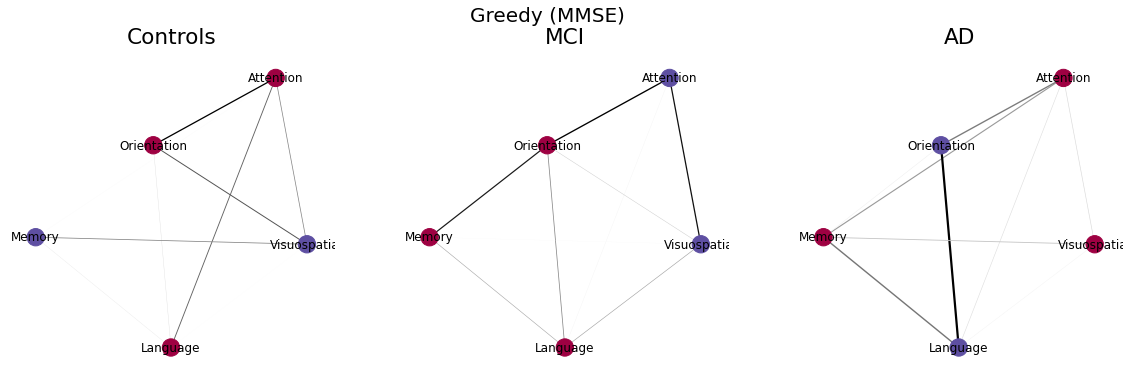

In [185]:
draw_graph_communities(graphs_ls, MMSE_Greedy_partitions, MMSE_labels, pos_MMSE, 'MMSE', 'Greedy')

#### Subgraph metrics

In [186]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MMSE_Greedy_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MMSE_Greedy_partitions[i]))

CN ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,3,3,0.125425,1.0,0.169176,1.0,0.578143,15.792845,"[Attention, Language, Orientation]",0.333333,0.333333,0.333333,0.0,0.0
1,1,2,1,0.07575,1.0,0.07575,0,0.0,13.201364,"[Memory, Visuospatial]",0.0,0.0,0.0,0.5,0.5


MCI ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,3,3,0.122568,1.0,0.173027,1.0,0.675687,12.571449,"[Language, Memory, Orientation]",0.0,0.333333,0.333333,0.0,0.333333
1,1,2,1,0.126574,1.0,0.126574,0,0.0,7.900518,"[Attention, Visuospatial]",0.5,0.0,0.0,0.5,0.0


AD ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,3,3,0.113222,1.0,0.172888,1.0,0.741441,12.265234,"[Attention, Memory, Visuospatial]",0.333333,0.0,0.0,0.333333,0.333333
1,1,2,1,0.221645,1.0,0.221645,0,0.0,4.511711,"[Language, Orientation]",0.0,0.5,0.5,0.0,0.0


#### 8.2.3. BISECTION ALGORITHM

In [187]:
MMSE_Bisection_partitions = community_detection(graphs_ls, "Bisection")

--------------------------------
Bisection algorithm
--------------------------------
CN :  ({1, 2}, {0, 3, 4})
Modularity Index:  -0.02912387279784348 

MCI :  ({1, 2}, {0, 3, 4})
Modularity Index:  -0.018905238575019342 

AD :  ({2, 4}, {0, 1, 3})
Modularity Index:  -0.015016984093338126 



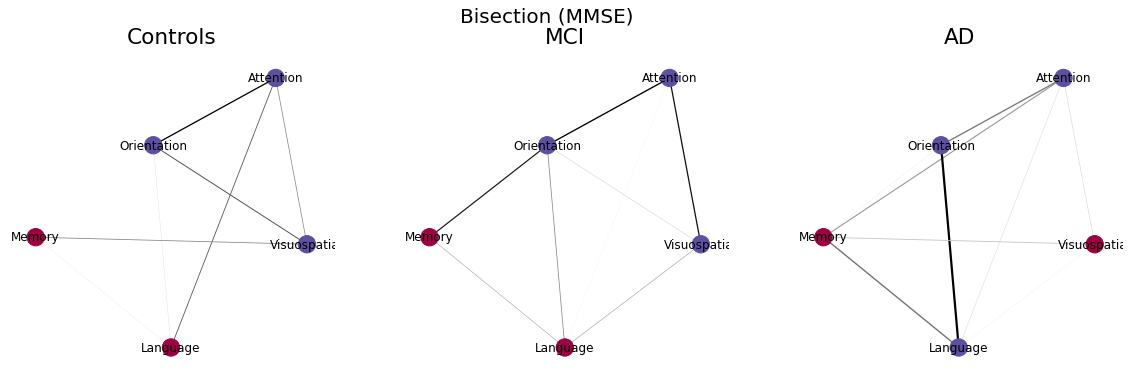

In [188]:
draw_graph_communities(graphs_ls, MMSE_Bisection_partitions, MMSE_labels, pos_MMSE, 'MMSE', 'Bisection')

#### Subgraph metrics

In [189]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MMSE_Bisection_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MMSE_Bisection_partitions[i]))

CN ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,2,1,0.030174,1.0,0.030174,0,0.0,33.141117,"[Language, Memory]",0.0,0.0,0.5,0.0,0.5
1,1,3,3,0.128339,1.0,0.19961,1.0,0.758313,10.536954,"[Attention, Orientation, Visuospatial]",0.333333,0.333333,0.0,0.333333,0.0


MCI ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,2,1,0.061005,1.0,0.061005,0,0.0,16.392106,"[Language, Memory]",0.0,0.0,0.5,0.0,0.5
1,1,3,3,0.134072,1.0,0.204234,1.0,0.685296,12.412821,"[Attention, Orientation, Visuospatial]",0.333333,0.333333,0.0,0.333333,0.0


AD ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,2,1,0.083638,1.0,0.083638,0,0.0,11.956355,"[Memory, Visuospatial]",0.0,0.0,0.0,0.5,0.5
1,1,3,3,0.194041,1.0,0.277124,1.0,0.543556,9.916127,"[Attention, Language, Orientation]",0.333333,0.333333,0.333333,0.0,0.0


#### 8.2.4. LABEL PROPAGATION ALGORITHM

In [190]:
MMSE_Label_partitions = community_detection(graphs_ls, "Label Propagation")

--------------------------------
Label Propagation algorithm
--------------------------------
CN :  [{0, 1, 2, 3, 4}]
Modularity Index:  2.220446049250313e-16 

MCI :  [{0, 1, 2, 3, 4}]
Modularity Index:  1.1102230246251565e-16 

AD :  [{0, 1, 2, 3, 4}]
Modularity Index:  0.0 



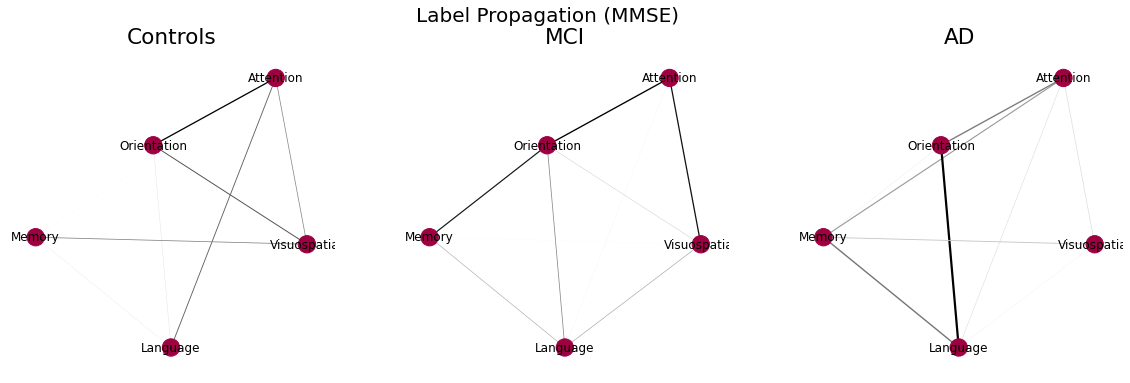

In [191]:
draw_graph_communities(graphs_ls, MMSE_Label_partitions, MMSE_labels, pos_MMSE, 'MMSE', 'Label Propagation')

#### Subgraph metrics

In [192]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MMSE_Label_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MMSE_Label_partitions[i]))

CN ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,5,10,0.056152,1.0,0.225319,1.0,0.336327,50.932634,"[Attention, Language, Memory, Orientation, Vis...",0.2,0.2,0.2,0.2,0.2


MCI ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,5,10,0.075968,1.0,0.268098,1.0,0.384713,49.883446,"[Attention, Language, Memory, Orientation, Vis...",0.2,0.2,0.2,0.2,0.2


AD ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Orientation,Language,Visuospatial,Memory
0,0,5,10,0.113222,1.0,0.36152,1.0,0.336282,25.101965,"[Attention, Language, Memory, Orientation, Vis...",0.2,0.2,0.2,0.2,0.2


### 8.3. MOCA

In [193]:
graphs_ls = [MOCA_CN_graph, MOCA_MCI_graph, MOCA_AD_graph]

#### 8.3.1. LOUVAIN ALGORITHM

In [194]:
MOCA_Louvain_partitions = community_detection(graphs_ls, "Louvain")

--------------------------------
Louvain algorithm
--------------------------------
CN :  [{0, 4}, {1, 2, 3, 5}]
Modularity Index:  0.051303186882459544 

MCI :  [{1, 2, 3, 4}, {0, 5}]
Modularity Index:  0.03416940843596661 

AD :  [{2, 3, 4}, {0, 1, 5}]
Modularity Index:  0.04706469172680827 



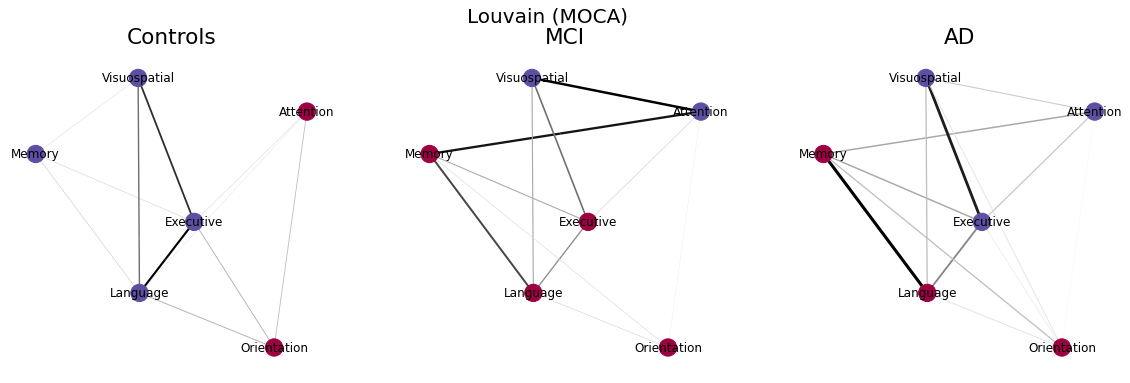

In [195]:
draw_graph_communities(graphs_ls, MOCA_Louvain_partitions, MOCA_labels, pos_MOCA, 'MOCA', 'Louvain')

#### Subgraph metrics

In [196]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MOCA_Louvain_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MOCA_Louvain_partitions[i]))

CN ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Executive,Orientation,Language,Memory,Visuospatial
0,0,2,1,0.083905,1.0,0.083905,0,0.0,11.918178,"[Attention, Orientation]",0.5,0.0,0.5,0.0,0.0,0.0
1,1,4,6,0.128483,1.0,0.355317,1.0,0.511649,12.562783,"[Executive, Language, Memory, Visuospatial]",0.0,0.25,0.0,0.25,0.25,0.25


MCI ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Executive,Orientation,Language,Memory,Visuospatial
0,0,4,6,0.133908,1.0,0.299977,1.0,0.449051,17.405721,"[Executive, Language, Memory, Orientation]",0.0,0.25,0.25,0.25,0.25,0.0
1,1,2,1,0.248415,1.0,0.248415,0,0.0,4.02553,"[Attention, Visuospatial]",0.5,0.0,0.0,0.0,0.0,0.5


AD ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Executive,Orientation,Language,Memory,Visuospatial
0,0,3,3,0.213525,1.0,0.347832,1.0,0.486314,8.075091,"[Language, Memory, Orientation]",0.0,0.0,0.333333,0.333333,0.333333,0.0
1,1,3,3,0.231488,1.0,0.341164,1.0,0.554312,7.207981,"[Attention, Executive, Visuospatial]",0.333333,0.333333,0.0,0.0,0.0,0.333333


#### 8.3.2. GREEDY ALGORITHM

In [197]:
MOCA_Greedy_partitions = community_detection(graphs_ls, "Greedy")

--------------------------------
Greedy algorithm
--------------------------------
CN :  [frozenset({1, 2, 3, 5}), frozenset({0, 4})]
Modularity Index:  0.051303186882459544 

MCI :  [frozenset({1, 2, 3, 4}), frozenset({0, 5})]
Modularity Index:  0.03416940843596661 

AD :  [frozenset({2, 3, 4}), frozenset({0, 1, 5})]
Modularity Index:  0.04706469172680827 



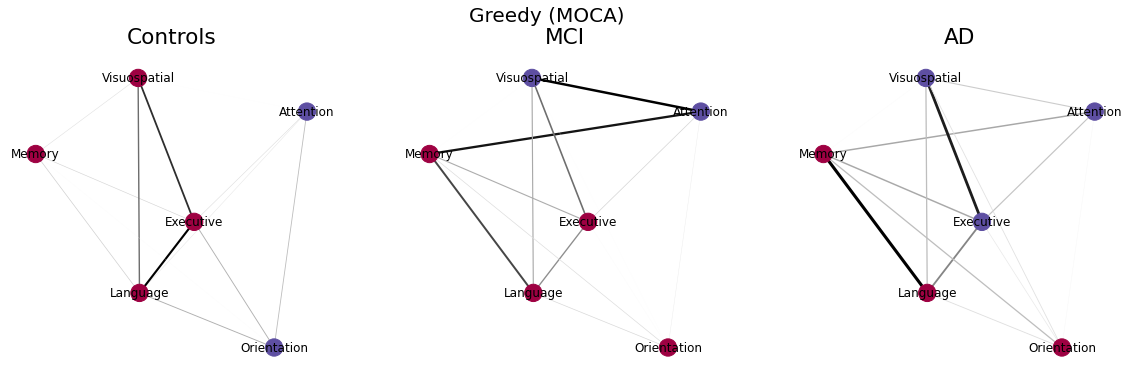

In [198]:
draw_graph_communities(graphs_ls, MOCA_Greedy_partitions, MOCA_labels, pos_MOCA, 'MOCA', 'Greedy')

#### Subgraph metrics

In [199]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MOCA_Greedy_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MOCA_Greedy_partitions[i]))

CN ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Executive,Orientation,Language,Memory,Visuospatial
0,0,4,6,0.128483,1.0,0.355317,1.0,0.511649,12.562783,"[Executive, Language, Memory, Visuospatial]",0.0,0.25,0.0,0.25,0.25,0.25
1,1,2,1,0.083905,1.0,0.083905,0,0.0,11.918178,"[Attention, Orientation]",0.5,0.0,0.5,0.0,0.0,0.0


MCI ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Executive,Orientation,Language,Memory,Visuospatial
0,0,4,6,0.133908,1.0,0.299977,1.0,0.449051,17.405721,"[Executive, Language, Memory, Orientation]",0.0,0.25,0.25,0.25,0.25,0.0
1,1,2,1,0.248415,1.0,0.248415,0,0.0,4.02553,"[Attention, Visuospatial]",0.5,0.0,0.0,0.0,0.0,0.5


AD ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Executive,Orientation,Language,Memory,Visuospatial
0,0,3,3,0.213525,1.0,0.347832,1.0,0.486314,8.075091,"[Language, Memory, Orientation]",0.0,0.0,0.333333,0.333333,0.333333,0.0
1,1,3,3,0.231488,1.0,0.341164,1.0,0.554312,7.207981,"[Attention, Executive, Visuospatial]",0.333333,0.333333,0.0,0.0,0.0,0.333333


#### 8.3.3. BISECTION ALGORITHM

In [200]:
MOCA_Bisection_partitions = community_detection(graphs_ls, "Bisection")

--------------------------------
Bisection algorithm
--------------------------------
CN :  ({1, 2, 5}, {0, 3, 4})
Modularity Index:  -0.002561633947339062 

MCI :  ({2, 3, 4}, {0, 1, 5})
Modularity Index:  0.03300737542143589 

AD :  ({0, 1, 5}, {2, 3, 4})
Modularity Index:  0.04706469172680827 



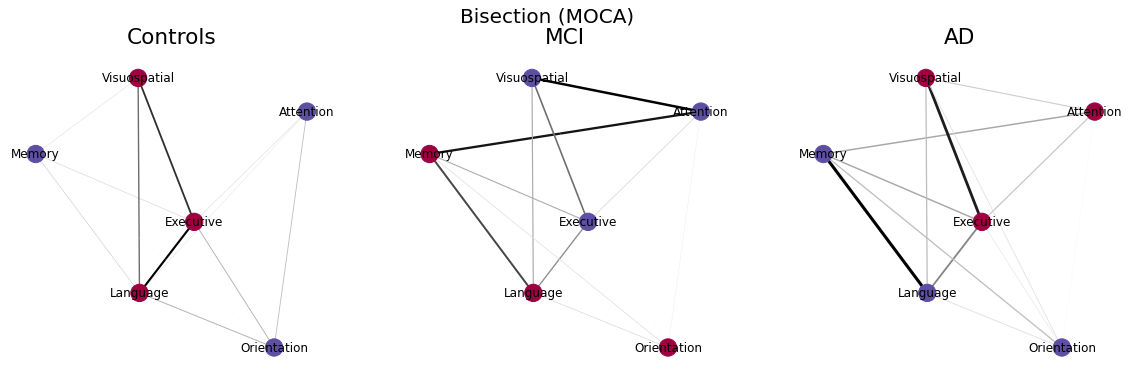

In [201]:
draw_graph_communities(graphs_ls, MOCA_Bisection_partitions, MOCA_labels, pos_MOCA, 'MOCA', 'Bisection')

#### Subgraph metrics

In [202]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MOCA_Bisection_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MOCA_Bisection_partitions[i]))

CN ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Executive,Orientation,Language,Memory,Visuospatial
0,0,3,3,0.210797,1.0,0.353379,1.0,0.826254,5.82719,"[Executive, Language, Visuospatial]",0.0,0.333333,0.0,0.333333,0.0,0.333333
1,1,3,3,0.024425,1.0,0.072221,1.0,0.261372,78.414946,"[Attention, Memory, Orientation]",0.333333,0.0,0.333333,0.0,0.333333,0.0


MCI ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Executive,Orientation,Language,Memory,Visuospatial
0,0,3,3,0.133908,1.0,0.220466,1.0,0.487249,12.452936,"[Language, Memory, Orientation]",0.0,0.0,0.333333,0.333333,0.333333,0.0
1,1,3,3,0.234263,1.0,0.321785,1.0,0.573884,8.118003,"[Attention, Executive, Visuospatial]",0.333333,0.333333,0.0,0.0,0.0,0.333333


AD ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Executive,Orientation,Language,Memory,Visuospatial
0,0,3,3,0.231488,1.0,0.341164,1.0,0.554312,7.207981,"[Attention, Executive, Visuospatial]",0.333333,0.333333,0.0,0.0,0.0,0.333333
1,1,3,3,0.213525,1.0,0.347832,1.0,0.486314,8.075091,"[Language, Memory, Orientation]",0.0,0.0,0.333333,0.333333,0.333333,0.0


#### 8.3.4. LABEL PROPAGATION ALGORITHM

In [203]:
MOCA_Label_partitions = community_detection(graphs_ls, "Label Propagation")

--------------------------------
Label Propagation algorithm
--------------------------------
CN :  [{0, 1, 2, 3, 4, 5}]
Modularity Index:  -2.220446049250313e-16 

MCI :  [{0, 1, 2, 3, 4, 5}]
Modularity Index:  0.0 

AD :  [{0, 1, 2, 3, 4, 5}]
Modularity Index:  -1.1102230246251565e-16 



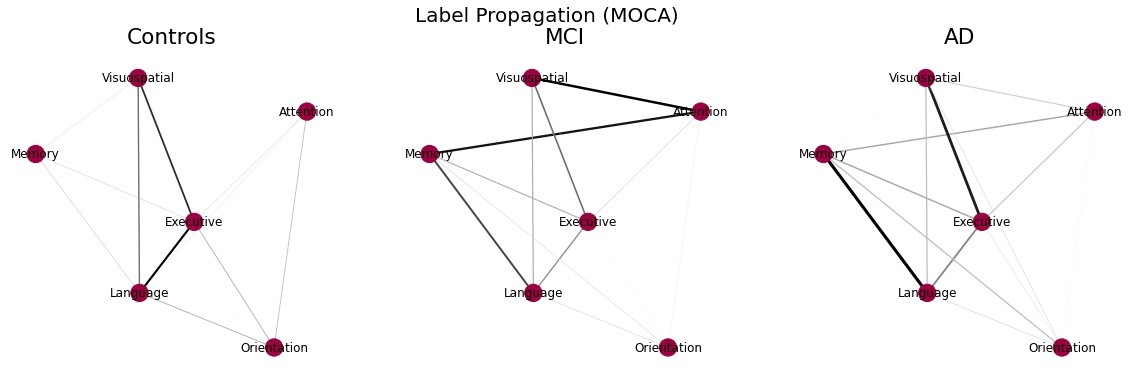

In [204]:
draw_graph_communities(graphs_ls, MOCA_Label_partitions, MOCA_labels, pos_MOCA, 'MOCA', 'Label Propagation')

#### Subgraph metrics

In [205]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(MOCA_Label_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], MOCA_Label_partitions[i]))

CN ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Executive,Orientation,Language,Memory,Visuospatial
0,0,6,15,0.100678,1.0,0.37479,1.0,0.285216,42.126159,"[Attention, Executive, Language, Memory, Orien...",0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


MCI ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Executive,Orientation,Language,Memory,Visuospatial
0,0,6,15,0.082708,1.0,0.503894,1.0,0.298448,33.617108,"[Attention, Executive, Language, Memory, Orien...",0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


AD ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Attention,Executive,Orientation,Language,Memory,Visuospatial
0,0,6,15,0.161029,1.0,0.629704,1.0,0.350212,13.9112,"[Attention, Executive, Language, Memory, Orien...",0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


### 8.6. NEUROBAT

In [206]:
graphs_ls = [NEUROBAT_CN_graph, NEUROBAT_MCI_graph, NEUROBAT_AD_graph]

#### 8.1.1. LOUVAIN ALGORITHM

In [207]:
NEUROBAT_Louvain_partitions = community_detection(graphs_ls, "Louvain")

--------------------------------
Louvain algorithm
--------------------------------
CN :  [{0, 1, 2, 3}]
Modularity Index:  0.0 

MCI :  [{0, 1, 2, 3}]
Modularity Index:  -1.1102230246251565e-16 

AD :  [{1, 2}, {0, 3}]
Modularity Index:  0.016662619619448593 



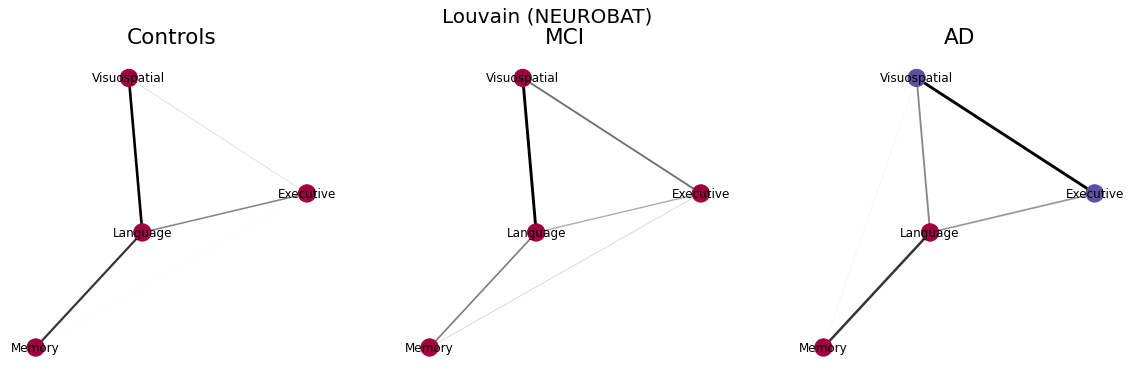

In [208]:
draw_graph_communities(graphs_ls, NEUROBAT_Louvain_partitions, NEUROBAT_labels, pos_NEUROBAT, 'NEUROBAT', 'Louvain')

#### Subgraph metrics

In [209]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(NEUROBAT_Louvain_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], NEUROBAT_Louvain_partitions[i]))

CN ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Visuospatial,Executive,Language,Memory
0,0,4,6,0.220676,1.0,0.394918,1.0,0.393994,16.47045,"[Executive, Language, Memory, Visuospatial]",0.25,0.25,0.25,0.25


MCI ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Visuospatial,Executive,Language,Memory
0,0,4,6,0.175999,1.0,0.432594,1.0,0.364277,37.009591,"[Executive, Language, Memory, Visuospatial]",0.25,0.25,0.25,0.25


AD ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Visuospatial,Executive,Language,Memory
0,0,2,1,0.251135,1.0,0.251135,0,0.0,3.981921,"[Language, Memory]",0.0,0.0,0.5,0.5
1,1,2,1,0.290727,1.0,0.290727,0,0.0,3.439658,"[Executive, Visuospatial]",0.5,0.5,0.0,0.0


#### 8.1.2. GREEDY ALGORITHM

In [210]:
NEUROBAT_Greedy_partitions = community_detection(graphs_ls, "Greedy")

--------------------------------
Greedy algorithm
--------------------------------
CN :  [frozenset({0, 1, 2, 3})]
Modularity Index:  0.0 

MCI :  [frozenset({0, 1, 2, 3})]
Modularity Index:  -1.1102230246251565e-16 

AD :  [frozenset({1, 2}), frozenset({0, 3})]
Modularity Index:  0.016662619619448593 



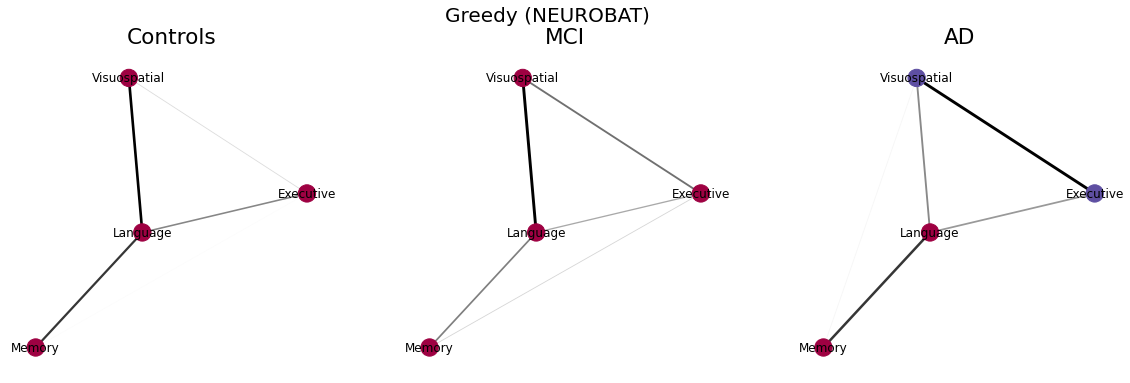

In [211]:
draw_graph_communities(graphs_ls, NEUROBAT_Greedy_partitions, NEUROBAT_labels, pos_NEUROBAT, 'NEUROBAT', 'Greedy')

#### Subgraph metrics

In [212]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(NEUROBAT_Greedy_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], NEUROBAT_Greedy_partitions[i]))

CN ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Visuospatial,Executive,Language,Memory
0,0,4,6,0.220676,1.0,0.394918,1.0,0.393994,16.47045,"[Executive, Language, Memory, Visuospatial]",0.25,0.25,0.25,0.25


MCI ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Visuospatial,Executive,Language,Memory
0,0,4,6,0.175999,1.0,0.432594,1.0,0.364277,37.009591,"[Executive, Language, Memory, Visuospatial]",0.25,0.25,0.25,0.25


AD ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Visuospatial,Executive,Language,Memory
0,0,2,1,0.251135,1.0,0.251135,0,0.0,3.981921,"[Language, Memory]",0.0,0.0,0.5,0.5
1,1,2,1,0.290727,1.0,0.290727,0,0.0,3.439658,"[Executive, Visuospatial]",0.5,0.5,0.0,0.0


#### 8.1.3. BISECTION ALGORITHM

In [213]:
NEUROBAT_Bisection_partitions = community_detection(graphs_ls, "Bisection")

--------------------------------
Bisection algorithm
--------------------------------
CN :  ({0, 3}, {1, 2})
Modularity Index:  -0.13000800911244648 

MCI :  ({0, 2}, {1, 3})
Modularity Index:  -0.0989650488839089 

AD :  ({0, 3}, {1, 2})
Modularity Index:  0.016662619619448593 



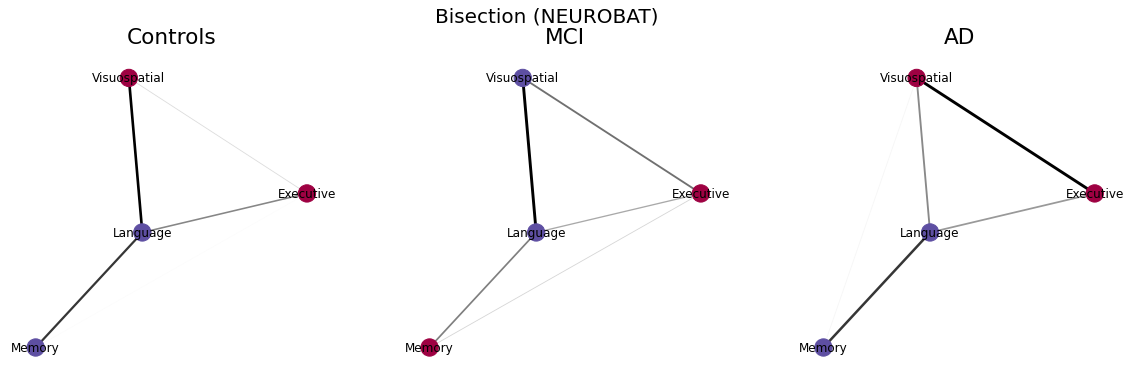

In [214]:
draw_graph_communities(graphs_ls, NEUROBAT_Bisection_partitions, NEUROBAT_labels, pos_NEUROBAT, 'NEUROBAT', 'Bisection')

#### Subgraph metrics

In [215]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(NEUROBAT_Bisection_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], NEUROBAT_Bisection_partitions[i]))

CN ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Visuospatial,Executive,Language,Memory
0,0,2,1,0.08198,1.0,0.08198,0,0.0,12.198151,"[Executive, Visuospatial]",0.5,0.5,0.0,0.0
1,1,2,1,0.222808,1.0,0.222808,0,0.0,4.488167,"[Language, Memory]",0.0,0.0,0.5,0.5


MCI ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Visuospatial,Executive,Language,Memory
0,0,2,1,0.081674,1.0,0.081674,0,0.0,12.243735,"[Executive, Memory]",0.0,0.5,0.0,0.5
1,1,2,1,0.290497,1.0,0.290497,0,0.0,3.442375,"[Language, Visuospatial]",0.5,0.0,0.5,0.0


AD ---------------------


C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)
C:\Users\anaso\AppData\Local\Temp\ipykernel_3704\1078227929.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(metrics_dict, ignore_index=True)


,Index,NNodes,NEdges,Diameter,Density,AvDegree,Transitivity,AvCC,AvGE,Domains,Visuospatial,Executive,Language,Memory
0,0,2,1,0.290727,1.0,0.290727,0,0.0,3.439658,"[Executive, Visuospatial]",0.5,0.5,0.0,0.0
1,1,2,1,0.251135,1.0,0.251135,0,0.0,3.981921,"[Language, Memory]",0.0,0.0,0.5,0.5


#### 8.1.4. LABEL PROPAGATION ALGORITHM

In [216]:
NEUROBAT_Label_partitions = community_detection(graphs_ls, "Label Propagation")

--------------------------------
Label Propagation algorithm
--------------------------------
CN :  [{0, 1, 2, 3}]
Modularity Index:  0.0 

MCI :  [{0, 1, 2, 3}]
Modularity Index:  -1.1102230246251565e-16 

AD :  [{0, 1, 2, 3}]
Modularity Index:  0.0 



ValueError: 'c' argument has 5 elements, which is inconsistent with 'x' and 'y' with size 4.

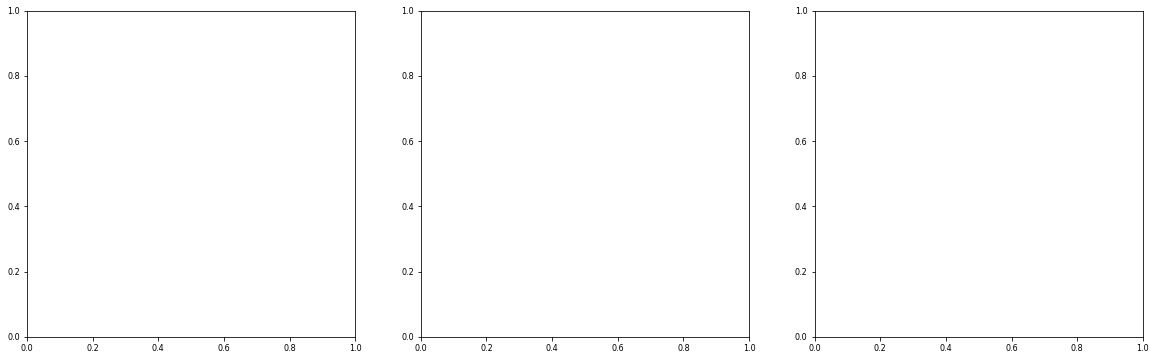

In [217]:
draw_graph_communities(graphs_ls, ADAS_Label_partitions, ADAS_labels, pos_ADAS, 'ADAS', 'Label Propagation')

#### Subgraph metrics

In [ ]:
dx_ls = ['CN', 'MCI', 'AD']
for i in range(len(NEUROBAT_Label_partitions)):
    print(dx_ls[i], "---------------------")
    display(community_metrics(graphs_ls[i], NEUROBAT_Label_partitions[i]))